## Your very-own Linear Regression CheatNoteBook

In [1]:
# What is normalizing?
# Search scalar in sklearn
# There are several methods inside and see which one to use

# Project 2: Linear Regression Price Predictor for Used Cars

In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

### Section 1: DataFrame Loading, Cleaning

In [3]:
# Returns you all the variables in the current environment

# dir()  

# Refer to this link: https://stackoverflow.com/questions/633127/viewing-all-defined-variables
# To find out out to view all defined variables in the current environment

In [4]:
# What is normalizing?
# Search scalar in sklearn: Done on your variables before fitting them into a Ridge/Lasso model
# Elastic net = combination of Ridge and Lasso.
# There are several methods inside and see which one to use

In [5]:
df_main = pd.read_csv('sgcarmart_used_cars_prices.csv',index_col=0)
df_main.sample(5)

LISTING_URL       BRAND    PRICE  \
2322  https://www.sgcarmart.com/used_cars/info.php?I...      Toyota  82800.0   
1137  https://www.sgcarmart.com/used_cars/info.php?I...  Mitsubishi  93800.0   
2856  https://www.sgcarmart.com/used_cars/info.php?I...       Honda  60800.0   
672   https://www.sgcarmart.com/used_cars/info.php?I...         Kia  32500.0   
3479  https://www.sgcarmart.com/used_cars/info.php?I...      Nissan  57800.0   

      DEPRE_VALUE_PER_YEAR     REG_DATE  MILEAGE_KM MANUFACTURED_YEAR  \
2322                9460.0  04-Jul-2017     57000.0              2017   
1137               12930.0  23-Jan-2007    160000.0              2006   
2856                6340.0  27-May-2009    116916.0              2008   
672                 9320.0  19-Jul-2012     82200.0              2012   
3479                7560.0  17-May-2016     44985.0              2015   

      ROAD_TAX_PER_YEAR TRANSMISSION  DEREG_VALUE_FROM_SCRAPE_DATE  \
2322              976.0         Auto                       51536.0   
1137             1452.0       Manual                       38204.0   
2856             1210.0         Auto                       37970.0   
672               738.0         Auto                       25975.0   
3479              742.0         Auto                       43662.0   

     SCRAPE_DATE      OMV      ARF  COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT  \
2322  23/10/2019  19955.0  19955.0               47501.0            2795.0   
1137  23/10/2019  26812.0  29494.0               52660.0            2615.0   
2856  23/10/2019  28518.0  28518.0               39563.0            3498.0   
672   23/10/2019  14005.0  14005.0               64201.0             975.0   
3479  23/10/2019  16283.0  16283.0               47889.0            2373.0   

      ENGINE_CAPACITY_CC  CURB_WEIGHT_KG  NO_OF_OWNERS     VEHICLE_TYPE  
2322                1798          1355.0           1.0              MPV  
1137                1997          1320.0           3.0       Sports Car  
2856                1998          1312.0           3.0  Mid-Sized Sedan  
672                 1591          1232.0           2.0       Sports Car  
3479                1598          1205.0           1.0  Mid-Sized Sedan

In [6]:
df_main.columns

Index(['LISTING_URL', 'BRAND', 'PRICE', 'DEPRE_VALUE_PER_YEAR', 'REG_DATE',
       'MILEAGE_KM', 'MANUFACTURED_YEAR', 'ROAD_TAX_PER_YEAR', 'TRANSMISSION',
       'DEREG_VALUE_FROM_SCRAPE_DATE', 'SCRAPE_DATE', 'OMV', 'ARF',
       'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'VEHICLE_TYPE'],
      dtype='object')

In [7]:
df_clean = df_main.drop(['LISTING_URL', 'SCRAPE_DATE'],axis=1)
df_clean

BRAND     PRICE  DEPRE_VALUE_PER_YEAR     REG_DATE  MILEAGE_KM  \
0             Honda   58800.0                5880.0  24-Oct-2009     81000.0   
1             Honda   62800.0                6270.0  10-Nov-2009    106087.0   
2            Austin   30000.0               16950.0  28-Sep-1972         NaN   
3              Audi   70800.0               16580.0  05-Dec-2011    140800.0   
4            Toyota   65800.0                6850.0  26-Jun-2009    117000.0   
...             ...       ...                   ...          ...         ...   
3982         Toyota  104500.0               16550.0  02-Jun-2014     47638.0   
3983  Mercedes-Benz  115000.0               15260.0  11-Mar-2015     51500.0   
3984           MINI  119800.0               13150.0  07-Jun-2017     16000.0   
3985         Nissan   81800.0                9900.0  05-Aug-2016     53339.0   
3986          Lexus  113668.0               16140.0  25-May-2015     16687.0   

     MANUFACTURED_YEAR  ROAD_TAX_PER_YEAR TRANSMISSION  \
0                 2008              978.0         Auto   
1                 2009             1628.0         Auto   
2                 1972                NaN       Manual   
3                 2011             2380.0         Auto   
4                 2009              974.0         Auto   
...                ...                ...          ...   
3982              2014             3100.0         Auto   
3983              2012              974.0         Auto   
3984              2017             1210.0         Auto   
3985              2015             1786.0         Auto   
3986              2015                NaN         Auto   

      DEREG_VALUE_FROM_SCRAPE_DATE      OMV      ARF  COE_FROM_SCRAPE_DATE  \
0                              NaN  28040.0  28040.0                   NaN   
1                              NaN  33532.0  33532.0                   NaN   
2                            834.0      NaN      NaN                4711.0   
3                          58899.0  71379.0  71379.0               75889.0   
4                          38024.0  23465.0  23465.0               39563.0   
...                            ...      ...      ...                   ...   
3982                       78422.0  45977.0  56368.0               84504.0   
3983                       85824.0  52051.0  65692.0               67901.0   
3984                       69888.0  33570.0  38998.0               53300.0   
3985                       60983.0  26629.0  29281.0               57501.0   
3986                       78749.0  49907.0  46870.0               78004.0   

      DAYS_OF_COE_LEFT  ENGINE_CAPACITY_CC  CURB_WEIGHT_KG  NO_OF_OWNERS  \
0                  0.0                1799          1219.0           1.0   
1                  0.0                2354          1680.0           3.0   
2                642.0                 998             NaN           NaN   
3                761.0                2995          2250.0           3.0   
4               3503.0                1797          1350.0           2.0   
...                ...                 ...             ...           ...   
3982            1679.0                3456          2030.0           2.0   
3983            1950.0                1796          1600.0           2.0   
3984            2769.0                1998          1390.0           1.0   
3985            2462.0                2488          1510.0           1.0   
3986            2036.0                2494          1635.0           1.0   

         VEHICLE_TYPE  
0     Mid-Sized Sedan  
1                 MPV  
2              Others  
3                 SUV  
4                 MPV  
...               ...  
3982              MPV  
3983       Sports Car  
3984       Sports Car  
3985     Luxury Sedan  
3986     Luxury Sedan  

[3987 rows x 17 columns]

In [8]:
# We see that we have NA entries in this dataset. We want to drop these NA values or they will pose problems for us later

# The null values can be attributed to the fact that some data is not keyed in the listing itself, 
# or formatting issues due to the varying ways of which people organize the information of the car in a single listing

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3987 entries, 0 to 3986
Data columns (total 17 columns):
BRAND                           3987 non-null object
PRICE                           3962 non-null float64
DEPRE_VALUE_PER_YEAR            3876 non-null float64
REG_DATE                        3987 non-null object
MILEAGE_KM                      3338 non-null float64
MANUFACTURED_YEAR               3987 non-null object
ROAD_TAX_PER_YEAR               3833 non-null float64
TRANSMISSION                    3987 non-null object
DEREG_VALUE_FROM_SCRAPE_DATE    3221 non-null float64
OMV                             3963 non-null float64
ARF                             3957 non-null float64
COE_FROM_SCRAPE_DATE            3236 non-null float64
DAYS_OF_COE_LEFT                3963 non-null float64
ENGINE_CAPACITY_CC              3987 non-null int64
CURB_WEIGHT_KG                  3859 non-null float64
NO_OF_OWNERS                    3925 non-null float64
VEHICLE_TYPE                    398

In [9]:
# We now have 2584 rows of data after dropping null values

df_clean.dropna(inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 3 to 3985
Data columns (total 17 columns):
BRAND                           2584 non-null object
PRICE                           2584 non-null float64
DEPRE_VALUE_PER_YEAR            2584 non-null float64
REG_DATE                        2584 non-null object
MILEAGE_KM                      2584 non-null float64
MANUFACTURED_YEAR               2584 non-null object
ROAD_TAX_PER_YEAR               2584 non-null float64
TRANSMISSION                    2584 non-null object
DEREG_VALUE_FROM_SCRAPE_DATE    2584 non-null float64
OMV                             2584 non-null float64
ARF                             2584 non-null float64
COE_FROM_SCRAPE_DATE            2584 non-null float64
DAYS_OF_COE_LEFT                2584 non-null float64
ENGINE_CAPACITY_CC              2584 non-null int64
CURB_WEIGHT_KG                  2584 non-null float64
NO_OF_OWNERS                    2584 non-null float64
VEHICLE_TYPE                    258

In [10]:
# Taking a look at our data

df_clean.sample(5)

BRAND     PRICE  DEPRE_VALUE_PER_YEAR     REG_DATE  MILEAGE_KM  \
3955         Toyota   65800.0                9550.0  07-Oct-2015     63000.0   
1889         Subaru   88800.0               11150.0  27-Oct-2016     38787.0   
901             Kia   66800.0                7200.0  17-Apr-2018     32000.0   
2279  Mercedes-Benz  126800.0               13060.0  09-Feb-2018     16989.0   
2273         Toyota   44800.0                9300.0  17-Aug-2009     83000.0   

     MANUFACTURED_YEAR  ROAD_TAX_PER_YEAR TRANSMISSION  \
3955              2015              742.0         Auto   
1889              2016             1210.0         Auto   
901               2017              738.0         Auto   
2279              2017              740.0         Auto   
2273              2009              974.0         Auto   

      DEREG_VALUE_FROM_SCRAPE_DATE      OMV      ARF  COE_FROM_SCRAPE_DATE  \
3955                       47372.0  17804.0  17804.0               57089.0   
1889                       55837.0  20817.0  21144.0               57002.0   
901                        40801.0  11397.0  11397.0               38000.0   
2279                       60732.0  32007.0  36810.0               39903.0   
2273                       19246.0  21622.0  21622.0               19968.0   

      DAYS_OF_COE_LEFT  ENGINE_CAPACITY_CC  CURB_WEIGHT_KG  NO_OF_OWNERS  \
3955            1858.0                1598          1205.0           1.0   
1889            2558.0                1998          1682.0           1.0   
901             3074.0                1591          1295.0           1.0   
2279            3016.0                1595          1430.0           1.0   
2273            1734.0                1797          1340.0           2.0   

         VEHICLE_TYPE  
3955  Mid-Sized Sedan  
1889              SUV  
901   Mid-Sized Sedan  
2279     Luxury Sedan  
2273              MPV

In [11]:
print(df_clean.columns,'\n',len(df_clean.columns))

# We have 17 features in our columns

Index(['BRAND', 'PRICE', 'DEPRE_VALUE_PER_YEAR', 'REG_DATE', 'MILEAGE_KM',
       'MANUFACTURED_YEAR', 'ROAD_TAX_PER_YEAR', 'TRANSMISSION',
       'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'ARF', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'VEHICLE_TYPE'],
      dtype='object') 
 17


### Section 2: Data Categorizing

#### Section 2.1: One-hot encoding TRANSMISSION Column

In [12]:
# Here, we see that there only two options for transmission - Auto or Manual (i.e., Auto or not). 
# Therefore, we can do 1-hot encoding for this

df_clean['TRANSMISSION'].value_counts()

Auto      2547
Manual      37
Name: TRANSMISSION, dtype: int64

In [13]:
# Transmission conversion -> 1 for auto, 0 for manual (just 1 column only)

df_clean['TRANSMISSION_CONVERT'] = df_clean['TRANSMISSION'].apply(lambda x: 1 if x == 'Auto' else 0)
df_clean.drop('TRANSMISSION',axis=1,inplace=True)
df_clean.rename(columns={'TRANSMISSION_CONVERT':"TRANSMISSION"}, inplace=True)  # Renaming column back
df_clean.sample(5)

BRAND     PRICE  DEPRE_VALUE_PER_YEAR     REG_DATE  MILEAGE_KM  \
1229           Audi  210000.0               83100.0  28-Feb-2011     65000.0   
1644     Volkswagen   48800.0                9190.0  31-Oct-2014     59110.0   
1033         Toyota   69500.0                7890.0  13-Aug-2008    131800.0   
2695  Mercedes-Benz  143800.0               14010.0  26-Jun-2018     19400.0   
2909          Mazda   59800.0                7250.0  12-Jul-2017     24390.0   

     MANUFACTURED_YEAR  ROAD_TAX_PER_YEAR  DEREG_VALUE_FROM_SCRAPE_DATE  \
1229              2010             5834.0                      113686.0   
1644              2014              624.0                       35073.0   
1033              2008             3410.0                       30830.0   
2695              2018              740.0                       66771.0   
2909              2017              682.0                       38825.0   

           OMV       ARF  COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT  \
1229  195527.0  195527.0               45501.0             489.0   
1644   20210.0    5294.0               61899.0            1832.0   
1033   37137.0   31952.0               34991.0            3190.0   
2695   37480.0   44472.0               38501.0            3162.0   
2909   17707.0    7707.0               42801.0            2803.0   

      ENGINE_CAPACITY_CC  CURB_WEIGHT_KG  NO_OF_OWNERS  VEHICLE_TYPE  \
1229                5204          1625.0           5.0    Sports Car   
1644                1395          1249.0           1.0     Hatchback   
1033                3456          1800.0           4.0           MPV   
2695                1595          1425.0           1.0  Luxury Sedan   
2909                1496          1068.0           1.0     Hatchback   

      TRANSMISSION  
1229             1  
1644             1  
1033             1  
2695             1  
2909             1

In [14]:
# Performing whitespace stripping prior to dtype manipulation
df_clean['VEHICLE_TYPE'].apply(str.strip)
df_clean['VEHICLE_TYPE'].apply(str.lstrip)


# Inspection of the type of Vehicles
df_clean['VEHICLE_TYPE'].value_counts()


# ***** QUESTION *****
# Why don't we manually assign numbers to these instead? 
# i.e. df_clean.replace(to_replace=[{'Luxury Sedan':0},{'SUV':1}])

Luxury Sedan       557
SUV                555
Mid-Sized Sedan    497
Hatchback          389
MPV                278
Sports Car         261
Stationwagon        47
Name: VEHICLE_TYPE, dtype: int64

In [15]:
df_clean.head()

BRAND    PRICE  DEPRE_VALUE_PER_YEAR     REG_DATE  MILEAGE_KM  \
3           Audi  70800.0               16580.0  05-Dec-2011    140800.0   
4         Toyota  65800.0                6850.0  26-Jun-2009    117000.0   
5  Mercedes-Benz  45000.0               18550.0  21-Sep-2010    126000.0   
7            BMW  70800.0               12680.0  23-Apr-2014     41000.0   
9           Audi  89500.0               11910.0  25-Nov-2015     57784.0   

  MANUFACTURED_YEAR  ROAD_TAX_PER_YEAR  DEREG_VALUE_FROM_SCRAPE_DATE      OMV  \
3              2011             2380.0                       58899.0  71379.0   
4              2009              974.0                       38024.0  23465.0   
5              2010              974.0                       31818.0  56154.0   
7              2013              742.0                       54685.0  32459.0   
9              2015              624.0                       62640.0  29913.0   

       ARF  COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT  ENGINE_CAPACITY_CC  \
3  71379.0               75889.0             761.0                2995   
4  23465.0               39563.0            3503.0                1797   
5  56154.0               41006.0               8.0                1796   
7  27443.0               78810.0            1610.0                1598   
9  33879.0               61103.0            2221.0                1395   

   CURB_WEIGHT_KG  NO_OF_OWNERS  VEHICLE_TYPE  TRANSMISSION  
3          2250.0           3.0           SUV             1  
4          1350.0           2.0           MPV             1  
5          1650.0           4.0  Luxury Sedan             1  
7          1405.0           2.0  Luxury Sedan             1  
9          1480.0           2.0           SUV             1

#### This part may not be necessary due to dummy-variable matching

In [16]:
# The code below doesn't work.

# df_clean['VEHICLE_TYPE_VALUE_REPLACEMENT'] = df_clean['VEHICLE_TYPE'].apply(lambda x: 1 if x == "Luxury Sedan")
# df_clean['VEHICLE_TYPE_VALUE_REPLACEMENT'] = df_clean['VEHICLE_TYPE'].apply(lambda x: 2 if x == 'SUV')
# df_clean['VEHICLE_TYPE_VALUE_REPLACEMENT'] = df_clean['VEHICLE_TYPE'].apply(lambda x: 3 if x == 'Mid-Sized Sedan')
# df_clean['VEHICLE_TYPE_VALUE_REPLACEMENT'] = df_clean['VEHICLE_TYPE'].apply(lambda x: 4 if x == 'Hatchback Sedan')
# df_clean['VEHICLE_TYPE_VALUE_REPLACEMENT'] = df_clean['VEHICLE_TYPE'].apply(lambda x: 5 if x == 'MPV')
# df_clean['VEHICLE_TYPE_VALUE_REPLACEMENT'] = df_clean['VEHICLE_TYPE'].apply(lambda x: 6 if x == 'Sports Car')
# df_clean['VEHICLE_TYPE_VALUE_REPLACEMENT'] = df_clean['VEHICLE_TYPE'].apply(lambda x: 7 if x == 'Stationwagon')
# df_clean['VEHICLE_TYPE_VALUE_REPLACEMENT']

# tried using `else pass` and `else continue`, it still doesn't work


# # Alternative method:
# df_clean.loc[df_clean['VEHICLE_TYPE'] == 'Luxury Sedan','VEHICLE_TYPE_VALUE_REPLACEMENT'] = 1
# df_clean.loc[df_clean['VEHICLE_TYPE'] == 'SUV','VEHICLE_TYPE_VALUE_REPLACEMENT'] = 2
# df_clean.loc[df_clean['VEHICLE_TYPE'] == 'Mid-Sized Sedan','VEHICLE_TYPE_VALUE_REPLACEMENT'] = 3
# df_clean.loc[df_clean['VEHICLE_TYPE'] == 'Hatchback Sedan','VEHICLE_TYPE_VALUE_REPLACEMENT'] = 4
# df_clean.loc[df_clean['VEHICLE_TYPE'] == 'MPV','VEHICLE_TYPE_VALUE_REPLACEMENT'] = 5
# df_clean.loc[df_clean['VEHICLE_TYPE'] == 'Sports Car','VEHICLE_TYPE_VALUE_REPLACEMENT'] = 6
# df_clean.loc[df_clean['VEHICLE_TYPE'] == 'Stationwagon','VEHICLE_TYPE_VALUE_REPLACEMENT'] = 7
# df_clean

In [17]:
df_clean.sample(7)

BRAND    PRICE  DEPRE_VALUE_PER_YEAR     REG_DATE  MILEAGE_KM  \
2535  Volkswagen  72800.0                8800.0  17-Oct-2016     69000.0   
2656       Honda  82800.0                9000.0  28-Nov-2017     50000.0   
597       Toyota  49888.0                7450.0  04-Mar-2016     54000.0   
1974      Toyota  25800.0                6720.0  25-Aug-2008    112300.0   
1390      Toyota  97800.0               10910.0  15-Mar-2017     28000.0   
272      Hyundai  55777.0                7810.0  16-Feb-2016     44891.0   
968       Toyota  82800.0                8050.0  19-Nov-2018     12000.0   

     MANUFACTURED_YEAR  ROAD_TAX_PER_YEAR  DEREG_VALUE_FROM_SCRAPE_DATE  \
2535              2015              620.0                       52968.0   
2656              2017              742.0                       49549.0   
597               2015              682.0                       31117.0   
1974              2008              816.0                       13126.0   
1390              2016             1792.0                       63107.0   
272               2015              738.0                       39090.0   
968               2018              682.0                       40235.0   

          OMV      ARF  COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT  \
2535  21889.0  22645.0               51507.0            2223.0   
2656  19726.0  19726.0               42900.0            2954.0   
597   14350.0   5000.0               43000.0            2318.0   
1974  16777.0  16777.0               17099.0            1096.0   
1390  30167.0  34234.0               50621.0            2684.0   
272   12806.0  12806.0               46651.0            2283.0   
968   19509.0  19509.0               28199.0            3291.0   

      ENGINE_CAPACITY_CC  CURB_WEIGHT_KG  NO_OF_OWNERS     VEHICLE_TYPE  \
2535                1390          1417.0           1.0  Mid-Sized Sedan   
2656                1597          1249.0           2.0  Mid-Sized Sedan   
597                 1496          1090.0           3.0  Mid-Sized Sedan   
1974                1598          1195.0           2.0  Mid-Sized Sedan   
1390                2494          1475.0           1.0     Luxury Sedan   
272                 1591          1292.0           1.0  Mid-Sized Sedan   
968                 1496          1350.0           1.0              MPV   

      TRANSMISSION  
2535             1  
2656             1  
597              1  
1974             1  
1390             1  
272              1  
968              1

#### Section 2.2: Datetime conversion

In [18]:
# Converting reg_date to datetime, and Manufactured year to int

df_clean['REG_DATE'] = pd.to_datetime(df_clean['REG_DATE'])
df_clean['MANUFACTURED_YEAR'] = df_clean['MANUFACTURED_YEAR'].astype(int)
df_clean[['REG_DATE','MANUFACTURED_YEAR']].dtypes

REG_DATE             datetime64[ns]
MANUFACTURED_YEAR             int32
dtype: object

In [19]:
df_clean.dtypes

BRAND                                   object
PRICE                                  float64
DEPRE_VALUE_PER_YEAR                   float64
REG_DATE                        datetime64[ns]
MILEAGE_KM                             float64
MANUFACTURED_YEAR                        int32
ROAD_TAX_PER_YEAR                      float64
DEREG_VALUE_FROM_SCRAPE_DATE           float64
OMV                                    float64
ARF                                    float64
COE_FROM_SCRAPE_DATE                   float64
DAYS_OF_COE_LEFT                       float64
ENGINE_CAPACITY_CC                       int64
CURB_WEIGHT_KG                         float64
NO_OF_OWNERS                           float64
VEHICLE_TYPE                            object
TRANSMISSION                             int64
dtype: object

In [20]:
# ONLY RUN THIS CELL ONCE!
df_main['SCRAPE_DATE'] = pd.to_datetime(df_main['SCRAPE_DATE']).dt.year # Convert scrape date to integer to perform operations

In [21]:
df_main['SCRAPE_DATE']

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
3982    2019
3983    2019
3984    2019
3985    2019
3986    2019
Name: SCRAPE_DATE, Length: 3987, dtype: int64

In [22]:
# Converting current scrape date from main dataframe to datetime object using pandas
from datetime import date

# Obtaining number of years from year of manufacture to current year (metric for how new the car is)
df_clean['CAR_AGE'] = df_main['SCRAPE_DATE'] - df_clean['MANUFACTURED_YEAR'] # Obtaining values for age of car
df_clean['CAR_AGE'].astype(int)

3        8
4       10
5        9
7        6
9        4
        ..
3981     3
3982     5
3983     7
3984     2
3985     4
Name: CAR_AGE, Length: 2584, dtype: int32

In [23]:
# Rearranging Columns 
df_clean = df_clean[['BRAND', 'PRICE', 'DEPRE_VALUE_PER_YEAR', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 
                    'REG_DATE', 'MANUFACTURED_YEAR', 'CAR_AGE', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'ARF', 
                    'ENGINE_CAPACITY_CC', 'ROAD_TAX_PER_YEAR', 'CURB_WEIGHT_KG',
                    'NO_OF_OWNERS', 'VEHICLE_TYPE', 'TRANSMISSION']]
df_clean.head()

BRAND    PRICE  DEPRE_VALUE_PER_YEAR  MILEAGE_KM  \
3           Audi  70800.0               16580.0    140800.0   
4         Toyota  65800.0                6850.0    117000.0   
5  Mercedes-Benz  45000.0               18550.0    126000.0   
7            BMW  70800.0               12680.0     41000.0   
9           Audi  89500.0               11910.0     57784.0   

   COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT   REG_DATE  MANUFACTURED_YEAR  \
3               75889.0             761.0 2011-12-05               2011   
4               39563.0            3503.0 2009-06-26               2009   
5               41006.0               8.0 2010-09-21               2010   
7               78810.0            1610.0 2014-04-23               2013   
9               61103.0            2221.0 2015-11-25               2015   

   CAR_AGE  DEREG_VALUE_FROM_SCRAPE_DATE      OMV      ARF  \
3      8.0                       58899.0  71379.0  71379.0   
4     10.0                       38024.0  23465.0  23465.0   
5      9.0                       31818.0  56154.0  56154.0   
7      6.0                       54685.0  32459.0  27443.0   
9      4.0                       62640.0  29913.0  33879.0   

   ENGINE_CAPACITY_CC  ROAD_TAX_PER_YEAR  CURB_WEIGHT_KG  NO_OF_OWNERS  \
3                2995             2380.0          2250.0           3.0   
4                1797              974.0          1350.0           2.0   
5                1796              974.0          1650.0           4.0   
7                1598              742.0          1405.0           2.0   
9                1395              624.0          1480.0           2.0   

   VEHICLE_TYPE  TRANSMISSION  
3           SUV             1  
4           MPV             1  
5  Luxury Sedan             1  
7  Luxury Sedan             1  
9           SUV             1

#### Section 2.3: VEHICLE_TYPE To Dummy Variables

In [24]:
# Making Dummy Variables out of Vehicle Types:

x_vehtype_dummy = patsy.dmatrix('VEHICLE_TYPE',data=df_clean,return_type='dataframe')
x_vehtype_dummy.head()

# Do we drop the "Intercept" column?

Intercept  VEHICLE_TYPE[T.Luxury Sedan]  VEHICLE_TYPE[T.MPV]  \
3        1.0                           0.0                  0.0   
4        1.0                           0.0                  1.0   
5        1.0                           1.0                  0.0   
7        1.0                           1.0                  0.0   
9        1.0                           0.0                  0.0   

   VEHICLE_TYPE[T.Mid-Sized Sedan]  VEHICLE_TYPE[T.SUV]  \
3                              0.0                  1.0   
4                              0.0                  0.0   
5                              0.0                  0.0   
7                              0.0                  0.0   
9                              0.0                  1.0   

   VEHICLE_TYPE[T.Sports Car]  VEHICLE_TYPE[T.Stationwagon]  
3                         0.0                           0.0  
4                         0.0                           0.0  
5                         0.0                           0.0  
7                         0.0                           0.0  
9                         0.0                           0.0

In [25]:
df_clean2 = df_clean.join(x_vehtype_dummy)
df_clean2

BRAND     PRICE  DEPRE_VALUE_PER_YEAR  MILEAGE_KM  \
3              Audi   70800.0               16580.0    140800.0   
4            Toyota   65800.0                6850.0    117000.0   
5     Mercedes-Benz   45000.0               18550.0    126000.0   
7               BMW   70800.0               12680.0     41000.0   
9              Audi   89500.0               11910.0     57784.0   
...             ...       ...                   ...         ...   
3981  Mercedes-Benz  103800.0               13470.0     19000.0   
3982         Toyota  104500.0               16550.0     47638.0   
3983  Mercedes-Benz  115000.0               15260.0     51500.0   
3984           MINI  119800.0               13150.0     16000.0   
3985         Nissan   81800.0                9900.0     53339.0   

      COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT   REG_DATE  MANUFACTURED_YEAR  \
3                  75889.0             761.0 2011-12-05               2011   
4                  39563.0            3503.0 2009-06-26               2009   
5                  41006.0               8.0 2010-09-21               2010   
7                  78810.0            1610.0 2014-04-23               2013   
9                  61103.0            2221.0 2015-11-25               2015   
...                    ...               ...        ...                ...   
3981               53694.0            2434.0 2016-07-18               2016   
3982               84504.0            1679.0 2014-06-02               2014   
3983               67901.0            1950.0 2015-03-11               2012   
3984               53300.0            2769.0 2017-06-07               2017   
3985               57501.0            2462.0 2016-08-05               2015   

      CAR_AGE  DEREG_VALUE_FROM_SCRAPE_DATE  ...  NO_OF_OWNERS  VEHICLE_TYPE  \
3         8.0                       58899.0  ...           3.0           SUV   
4        10.0                       38024.0  ...           2.0           MPV   
5         9.0                       31818.0  ...           4.0  Luxury Sedan   
7         6.0                       54685.0  ...           2.0  Luxury Sedan   
9         4.0                       62640.0  ...           2.0           SUV   
...       ...                           ...  ...           ...           ...   
3981      3.0                       55704.0  ...           1.0  Luxury Sedan   
3982      5.0                       78422.0  ...           2.0           MPV   
3983      7.0                       85824.0  ...           2.0    Sports Car   
3984      2.0                       69888.0  ...           1.0    Sports Car   
3985      4.0                       60983.0  ...           1.0  Luxury Sedan   

      TRANSMISSION  Intercept  VEHICLE_TYPE[T.Luxury Sedan]  \
3                1        1.0                           0.0   
4                1        1.0                           0.0   
5                1        1.0                           1.0   
7                1        1.0                           1.0   
9                1        1.0                           0.0   
...            ...        ...                           ...   
3981             1        1.0                           1.0   
3982             1        1.0                           0.0   
3983             1        1.0                           0.0   
3984             1        1.0                           0.0   
3985             1        1.0                           1.0   

      VEHICLE_TYPE[T.MPV] VEHICLE_TYPE[T.Mid-Sized Sedan]  \
3                     0.0                             0.0   
4                     1.0                             0.0   
5                     0.0                             0.0   
7                     0.0                             0.0   
9                     0.0                             0.0   
...                   ...                             ...   
3981                  0.0                             0.0   
3982                  1.0                             0.0   
3983 

#### Section 2.4: Car Brand Categorization. Includes:
* Splitting them into Dummy Variables
* Indexing them into price range categories (perhaps better metric over vehicle types)
* Converting lesser-known brands into "others"

In [26]:
# Renaming Brand Names to their actual names

df_clean2.loc[df_clean2['BRAND'] == 'Aston','BRAND'] = 'Aston Martin'
df_clean2.loc[df_clean2['BRAND'] == 'Land','BRAND'] = 'Land Rover'
df_clean2.loc[df_clean2['BRAND'] == 'Alfa', 'BRAND'] = 'Alfa Romeo'

In [27]:
# Cleaning whitespaces from the values in "Brand" to prevent any messup later
df_clean2['BRAND'].apply(str.strip)

# Checking the number of brands in the dataset
print("# Of rows in DataFrame in Brands Column:\n", df_clean2.loc[:,'BRAND'])
print("\nValue Counts of Brands:\n", df_clean2.loc[:,'BRAND'].value_counts())
print("\n# of Brands:", len(df_clean2.loc[:,'BRAND'].value_counts()))

# New Column ATAS
# New Column Budget Cars
# Top 20 brands
# Am I comfortable with grouping uncommon cars into others?

# Of rows in DataFrame in Brands Column:
 3                Audi
4              Toyota
5       Mercedes-Benz
7                 BMW
9                Audi
            ...      
3981    Mercedes-Benz
3982           Toyota
3983    Mercedes-Benz
3984             MINI
3985           Nissan
Name: BRAND, Length: 2584, dtype: object

Value Counts of Brands:
 Toyota           405
Mercedes-Benz    374
Honda            309
BMW              286
Mazda            139
Nissan           127
Audi             127
Volkswagen       107
Kia               78
Hyundai           77
Volvo             63
Mitsubishi        58
Subaru            56
Porsche           51
Lexus             49
MINI              40
Suzuki            33
Citroen           22
Jaguar            22
Renault           19
Chevrolet         19
Maserati          18
Land Rover        16
Infiniti          14
Ford              14
Peugeot           13
Ferrari           11
Bentley            6
Lamborghini        6
McLaren            5
Opel               

## Section 3: Data Visualization
* EDA  
* Correlation Matrix  
* Pairplots  

In [34]:
# Engine CC and Curb weight might be related. Since you have a heavier car, you need to design a more powerful engine

# Road tax and Engine CC are definitely related

# Vehicle type is a very terrible way to categorize cars (searched online).
# From a quick google search, 
# There are 12 classes for Vehicle Type, namely Mid-Sized Sedan, 
# Luxury Sedan, Hatchback, MPV, SUV, Sports Car, Stationwagon, 
# All Commercial Vehicles, Van, Truck, Bus/Mini Bus, and Others. 
# Each vehicle is assigned only one Vehicle Type. 

# This classification is vague as premium and mass-market brands produce vehicles in all of these segments.
# Furthermore, a Toyota Camry, a BMW 520i and a Rolls-Royce Ghost are all classified under Luxury Sedan as per the 
# car portal's definition. 

# Vehicle Type is a poor way to segment the vehicles.
# Therefore, might want to drop this classification entirely and just focus on Brands, 
# especially since price is more affected by Brand perception.

# Make and Model (make_model): The make and model of a vehicle tells a lot about the level of prestige of a vehicle. 
# and therefore, the pricing.

# Just the make (brand) alone tells us a lot about the perceived desirability of a vehicle - 
# for instance when we learn that someone drives a BMW, the first thought the layman has is likely "that is a prestigious brand". 
# Therefore, decide to segment the vehicles according to their make.

### Section 3.1: Preliminary Correlation Exploration

### Section 3.1.1: Analysis without including Car Brands for Feature Dropping

In [36]:
df_price_no_brands = df_categorized_car_brands[['PRICE', 'DEPRE_VALUE_PER_YEAR', 'MILEAGE_KM',
       'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 'REG_DATE',
       'MANUFACTURED_YEAR', 'CAR_AGE', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV',
       'ARF', 'ENGINE_CAPACITY_CC', 'ROAD_TAX_PER_YEAR', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'VEHICLE_TYPE', 'TRANSMISSION']]
df_price_no_brands

PRICE  DEPRE_VALUE_PER_YEAR  MILEAGE_KM  COE_FROM_SCRAPE_DATE  \
3      70800.0               16580.0    140800.0               75889.0   
4      65800.0                6850.0    117000.0               39563.0   
5      45000.0               18550.0    126000.0               41006.0   
7      70800.0               12680.0     41000.0               78810.0   
9      89500.0               11910.0     57784.0               61103.0   
...        ...                   ...         ...                   ...   
3981  103800.0               13470.0     19000.0               53694.0   
3982  104500.0               16550.0     47638.0               84504.0   
3983  115000.0               15260.0     51500.0               67901.0   
3984  119800.0               13150.0     16000.0               53300.0   
3985   81800.0                9900.0     53339.0               57501.0   

      DAYS_OF_COE_LEFT   REG_DATE  MANUFACTURED_YEAR  CAR_AGE  \
3                761.0 2011-12-05               2011      8.0   
4               3503.0 2009-06-26               2009     10.0   
5                  8.0 2010-09-21               2010      9.0   
7               1610.0 2014-04-23               2013      6.0   
9               2221.0 2015-11-25               2015      4.0   
...                ...        ...                ...      ...   
3981            2434.0 2016-07-18               2016      3.0   
3982            1679.0 2014-06-02               2014      5.0   
3983            1950.0 2015-03-11               2012      7.0   
3984            2769.0 2017-06-07               2017      2.0   
3985            2462.0 2016-08-05               2015      4.0   

      DEREG_VALUE_FROM_SCRAPE_DATE      OMV      ARF  ENGINE_CAPACITY_CC  \
3                          58899.0  71379.0  71379.0                2995   
4                          38024.0  23465.0  23465.0                1797   
5                          31818.0  56154.0  56154.0                1796   
7                          54685.0  32459.0  27443.0                1598   
9                          62640.0  29913.0  33879.0                1395   
...                            ...      ...      ...                 ...   
3981                       55704.0  27886.0  26041.0                1595   
3982                       78422.0  45977.0  56368.0                3456   
3983                       85824.0  52051.0  65692.0                1796   
3984                       69888.0  33570.0  38998.0                1998   
3985                       60983.0  26629.0  29281.0                2488   

      ROAD_TAX_PER_YEAR  CURB_WEIGHT_KG  NO_OF_OWNERS  VEHICLE_TYPE  \
3                2380.0          2250.0           3.0           SUV   
4                 974.0          1350.0           2.0           MPV   
5                 974.0          1650.0           4.0  Luxury Sedan   
7                 742.0          1405.0           2.0  Luxury Sedan   
9                 624.0          1480.0           2.0           SUV   
...                 ...             ...           ...           ...   
3981              740.0          1430.0           1.0  Luxury Sedan   
3982             3100.0          2030.0           2.0           MPV   
3983              974.0          1600.0           2.0    Sports Car   
3984             1210.0          1390.0           1.0    Sports Car   
3985             1786.0          1510.0           1.0  Luxury Sedan   

      TRANSMISSION  
3                1  
4                1  
5                1  
7                1  
9                1  
...            ...  
3981             1  
3982             1  
3983             1  
3984             1  
3985             1  

[2584 rows x 17 columns]

In [37]:
# Corr Matrix
df_price_no_brands.corr()

PRICE  DEPRE_VALUE_PER_YEAR  MILEAGE_KM  \
PRICE                         1.000000              0.816275   -0.409517   
DEPRE_VALUE_PER_YEAR          0.816275              1.000000   -0.174560   
MILEAGE_KM                   -0.409517             -0.174560    1.000000   
COE_FROM_SCRAPE_DATE          0.182914              0.332787   -0.084824   
DAYS_OF_COE_LEFT              0.273379             -0.133003   -0.554330   
MANUFACTURED_YEAR             0.304888              0.031343   -0.809467   
CAR_AGE                      -0.304888             -0.031343    0.809467   
DEREG_VALUE_FROM_SCRAPE_DATE  0.924820              0.789711   -0.405090   
OMV                           0.801592              0.906446   -0.113452   
ARF                           0.879241              0.879452   -0.135532   
ENGINE_CAPACITY_CC            0.630484              0.718868   -0.007598   
ROAD_TAX_PER_YEAR             0.629361              0.724747   -0.005557   
CURB_WEIGHT_KG                0.505194              0.459895   -0.063299   
NO_OF_OWNERS                 -0.090614              0.100187    0.541356   
TRANSMISSION                  0.054688              0.042391   -0.141413   

                              COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT  \
PRICE                                     0.182914          0.273379   
DEPRE_VALUE_PER_YEAR                      0.332787         -0.133003   
MILEAGE_KM                               -0.084824         -0.554330   
COE_FROM_SCRAPE_DATE                      1.000000         -0.287075   
DAYS_OF_COE_LEFT                         -0.287075          1.000000   
MANUFACTURED_YEAR                         0.165645          0.558929   
CAR_AGE                                  -0.165645         -0.558929   
DEREG_VALUE_FROM_SCRAPE_DATE              0.413598          0.177268   
OMV                                       0.290350         -0.075169   
ARF                                       0.250242         -0.034700   
ENGINE_CAPACITY_CC                        0.290806         -0.110199   
ROAD_TAX_PER_YEAR                         0.277985         -0.098360   
CURB_WEIGHT_KG                            0.348192         -0.023202   
NO_OF_OWNERS                             -0.151817         -0.306966   
TRANSMISSION                              0.118870          0.045058   

                              MANUFACTURED_YEAR   CAR_AGE  \
PRICE                                  0.304888 -0.304888   
DEPRE_VALUE_PER_YEAR                   0.031343 -0.031343   
MILEAGE_KM                            -0.809467  0.809467   
COE_FROM_SCRAPE_DATE                   0.165645 -0.165645   
DAYS_OF_COE_LEFT                       0.558929 -0.558929   
MANUFACTURED_YEAR                      1.000000 -1.000000   
CAR_AGE                               -1.000000  1.000000   
DEREG_VALUE_FROM_SCRAPE_DATE           0.349454 -0.349454   
OMV                                   -0.071775  0.071775   
ARF                                   -0.034478  0.034478   
ENGINE_CAPACITY_CC                    -0.168698  0.168698   
ROAD_TAX_PER_YEAR                     -0.176001  0.176001   
CURB_WEIGHT_KG                         0.040341 -0.040341   
NO_OF_OWNERS                          -0.665596  0.665596   
TRANSMISSION                           0.206029 -0.206029   

                              DEREG_VALUE_FROM_SCRAPE_DATE       OMV  \
PRICE                                             0.924820  0.801592   
DEPRE_VALUE_PER_YEAR                              0.789711  0.906446   
MILEAGE_KM                                       -0.405090 -0.113452   
COE_FROM_SCRAPE_DATE                              0.413598  0.290350   
DAYS_OF_COE_LEFT                                  0.177268 -0.075169   
MANUFACTURED_YEAR                                 0.349454 -0.071775   
CAR_AGE                                          -0.349454  0.071775   
DEREG_VALUE_FROM_SCRAPE_DATE                      1.000000  0.767793   
OMV                                   

In [38]:
# How each feature relates to price
df_price_no_brands.corr()['PRICE'].sort_values(ascending=False)

PRICE                           1.000000
DEREG_VALUE_FROM_SCRAPE_DATE    0.924820
ARF                             0.879241
DEPRE_VALUE_PER_YEAR            0.816275
OMV                             0.801592
ENGINE_CAPACITY_CC              0.630484
ROAD_TAX_PER_YEAR               0.629361
CURB_WEIGHT_KG                  0.505194
MANUFACTURED_YEAR               0.304888
DAYS_OF_COE_LEFT                0.273379
COE_FROM_SCRAPE_DATE            0.182914
TRANSMISSION                    0.054688
NO_OF_OWNERS                   -0.090614
CAR_AGE                        -0.304888
MILEAGE_KM                     -0.409517
Name: PRICE, dtype: float64

(15.0, 0.0)

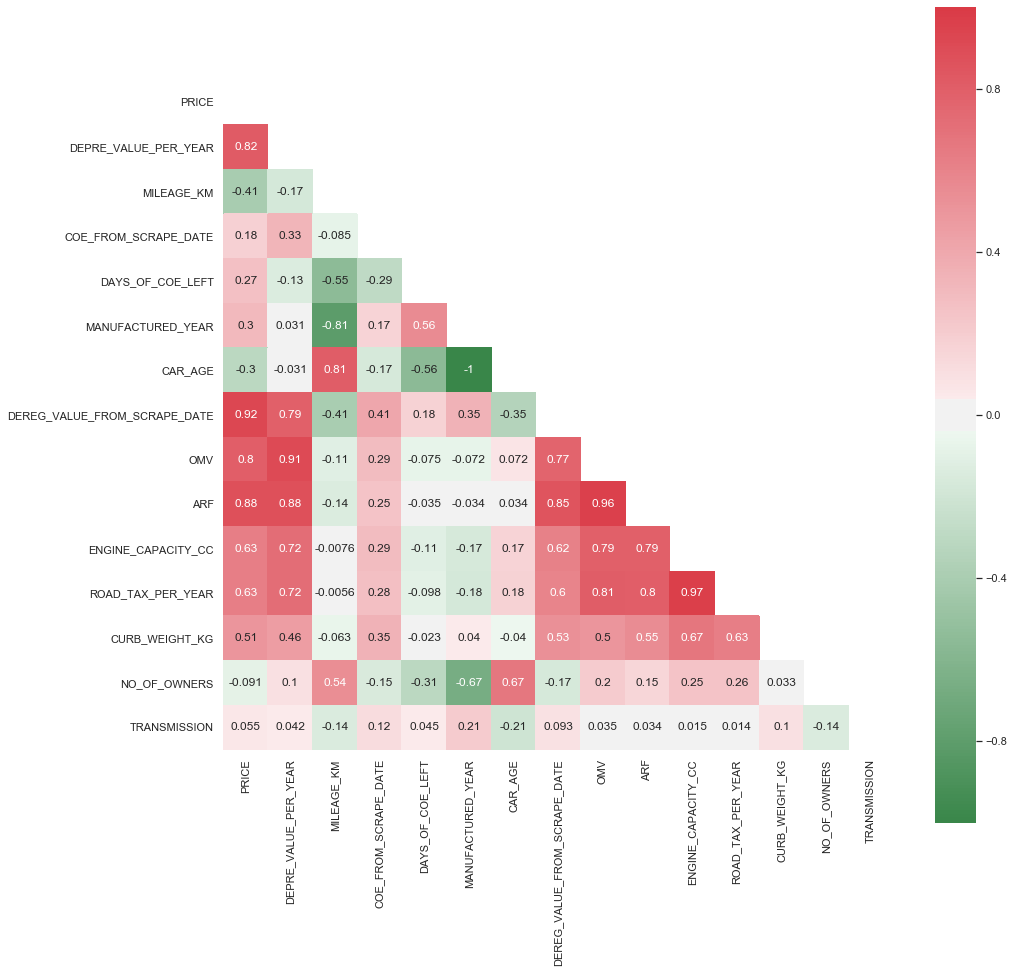

In [39]:
# Corr Matrix Heatmap Visualization

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df_price_no_brands.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(15,15))

# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
sns.heatmap(df_price_no_brands.corr(), mask=mask, annot=True, 
            square=True, cmap=cmap , vmin=-1, vmax=1,ax=ax);

# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### From the above Corr Matrix, we can observe that a few Independent Variables are highly correlated with each other. 
Interestingly, this makes sense due to how a few of the independent variables are calculated. Therefore, some of these features can be dropped.  
1. **OMV and ARF:** 
The Additional Registration Fee (ARF) is a tax imposed upon registration of a vehicle. It is calculated based on a percentage of the Open Market Value (OMV) of the vehicle. From the correlation matrix, they have a correlation of **0.96.** Therefore, we can just keep one of this. Therefore, **ARF** will be dropped.
   
   
2. **Engine CC and Road Tax:** 
Road tax increases as engine CC increases. Therefore, having Road Tax in it would be introducing multicolinearity into the model, since both explain the same thing anyway. From the correlation matrix, they have a correlation of **0.97**. Therefore, **road tax** column will be dropped.
   
   
3. **Manufactured Year and Car Age:** 
Obviously, manufactured year can be dropped, since Car Age is derived from year of manufacture. And since car age is more intuitive, **Manufactured Year** column will be dropped.  From the correlation matrix, they have a correlation of **-1**. 
  

  
4. **Dereg Value:**  
The deregistration value of a vehicle is amount one will get back from the government upon deregistering the vehicle for use in Singapore. It is the sum of the COE rebate and the PARF rebate.
The COE rebate is a percentage of the original COE value.
The PARF rebate is a percentage of the original OMV (Open Market Value).
Therefore, the **dereg value will be dropped**. From the corr matrix, OMV and dereg value have a correlation of **0.91.**
  
  
5. **Depreciation:** 
Annual depreciation is the amount the owner loses on the value of the vehicle per year based on the assumption that the vehicle is deregistered only at the end of its 10-yr COE life-span. The value of the car body has not been taken into account.  The formula used to derive the figure is as follows:  
Depreciation = (List Price - Minimum PARF value) ÷ remaining years of COE  
The minimum Preferential Additional Registration Fee (PARF) value is a sum of money that the vehicle owner gets for deregistering his vehicle at the end of its 10-yr COE. It is a function of the Open Market Value (OMV) or Additional Registration Fee (ARF). Commercial vehicles and cars with renewed COE have no minimum PARF value.  Depreciation and OMV have a correlation of **0.91**. **Depreciation** will be dropped.


### Section 3.1.2: Removing Independent Variables with High Correlation to each other

In [40]:
df_price_no_brands.drop(['DEPRE_VALUE_PER_YEAR','REG_DATE','MANUFACTURED_YEAR','DEREG_VALUE_FROM_SCRAPE_DATE',
                         'ARF','ROAD_TAX_PER_YEAR','VEHICLE_TYPE'],axis=1,inplace=True)
df_price_no_brands.columns

C:\Users\User\.conda\envs\metis\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['PRICE', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION'],
      dtype='object')

#### Section 3.1.2.1: Re-Visualizing New Correlation Matrix (with a few features dropped)

(10.0, 0.0)

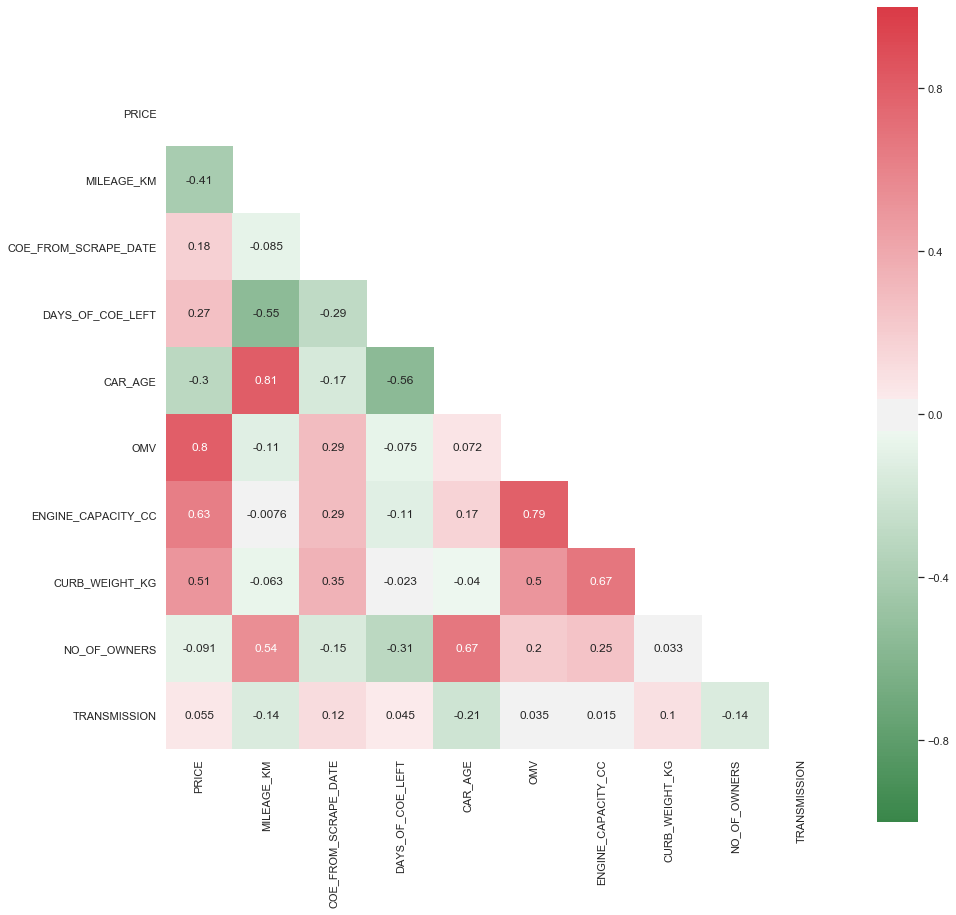

In [133]:
# Re-visualizing the correlation matrix

sns.set(style="white")

# Creating the data
data = df_price_no_brands.corr()


# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(15,15))

# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
sns.heatmap(data, mask=mask, annot=True, 
            square=True, cmap=cmap , vmin=-1, vmax=1,ax=ax);

# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [134]:
# Correlations of the independent variables (features) to dependent variable (target, price)
df_price_no_brands.corr()['PRICE'].sort_values(ascending=False)

PRICE                   1.000000
OMV                     0.801592
ENGINE_CAPACITY_CC      0.630484
CURB_WEIGHT_KG          0.505194
DAYS_OF_COE_LEFT        0.273379
COE_FROM_SCRAPE_DATE    0.182914
TRANSMISSION            0.054688
NO_OF_OWNERS           -0.090614
CAR_AGE                -0.304888
MILEAGE_KM             -0.409517
Name: PRICE, dtype: float64

#### Section 3.1.2.2: Pairplot after Feature Selection

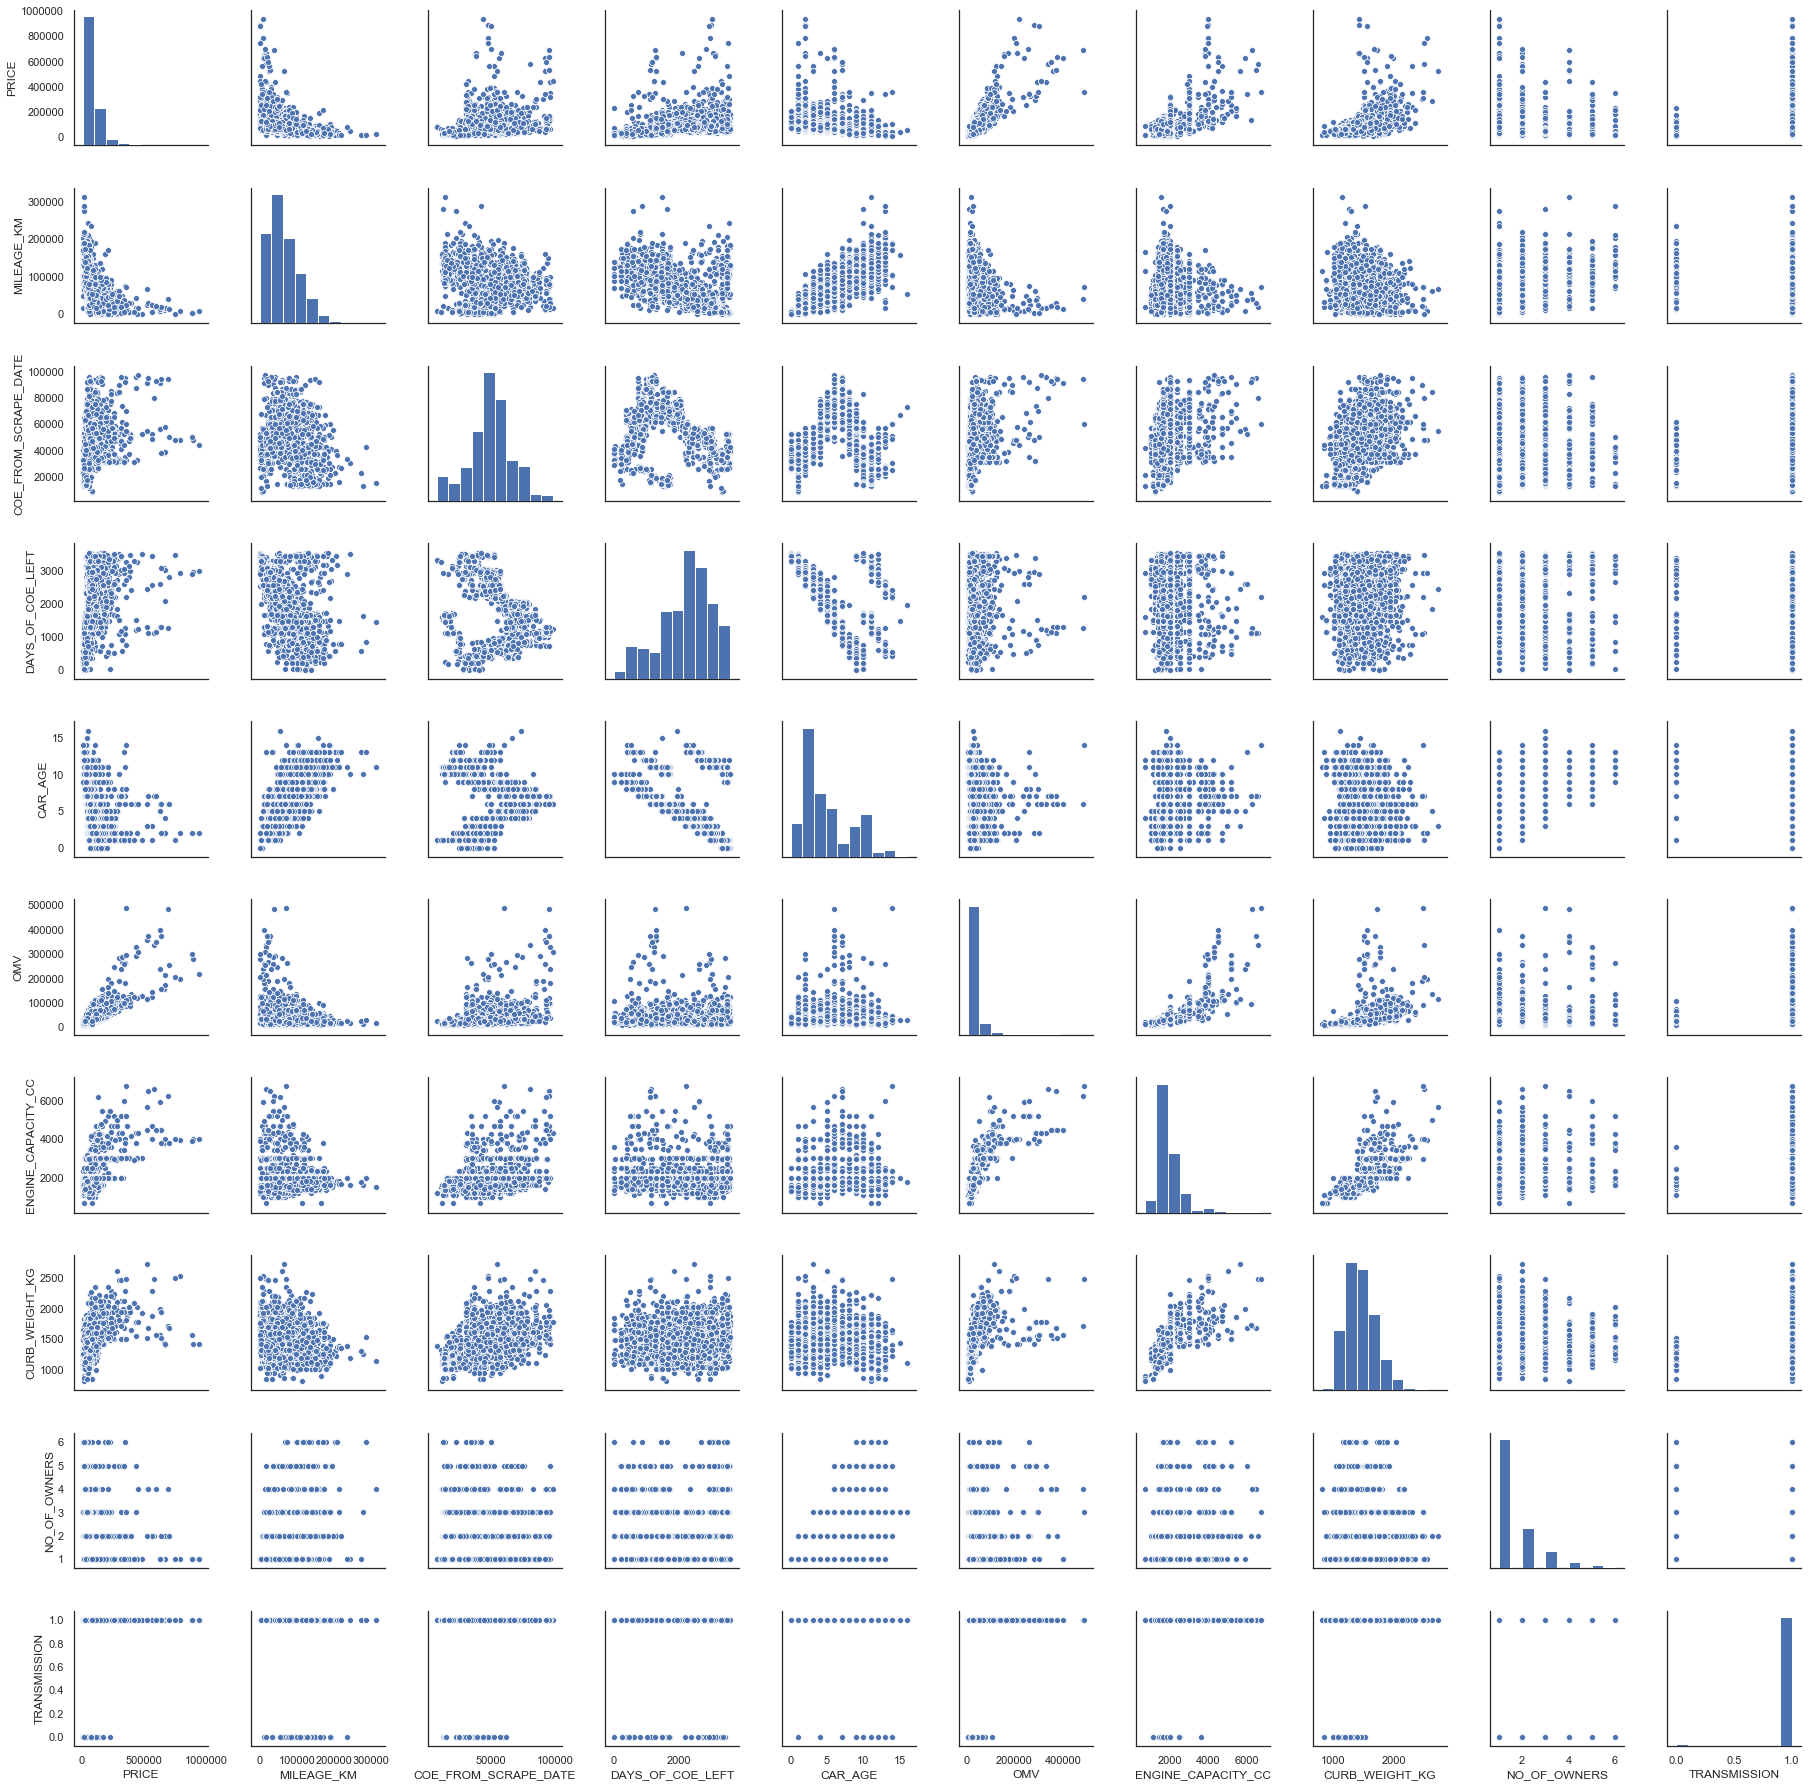

In [135]:
# Performing a pairplot to visualize the data trends of the variables

# We can see that price and mileage hold a negative linear relationship
# COE from the scrape date doesn't seem to have a very clear relatonship here
# Days of COE seems to have a slight linear r/s
# Car age doesn't seem to have a very distinct relationship here. But generally, the younger the car, the higher the price
# OMV has a clear increasing linear rs with price with price
# Engine capacity seems to also have a increasing linear r/s  with price, with a few outliers in the center
# Perhaps it's because a lot of the higher-priced cars (higher brands) are produced in that engine capacity range?
# Curb weight seems to have a linear r/s too.

sns.pairplot(df_price_no_brands);

In [136]:
df_price_no_brands.columns

Index(['PRICE', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION'],
      dtype='object')

### Section 3.2: Preliminary Model fitting to check R^2 Value and P>|t| values of Price and the leftover Independent Variables

In [137]:
# Slicing Data into Independent Variables (Features) and Dependent Variable (Target)
X = df_price_no_brands[ ['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION'] ].astype(float)
X = sm.add_constant(X)
y = df_price_no_brands['PRICE'].astype(float)



C:\Users\User\.conda\envs\metis\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [138]:
X.head()

const  MILEAGE_KM  COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT  CAR_AGE  \
3    1.0    140800.0               75889.0             761.0      8.0   
4    1.0    117000.0               39563.0            3503.0     10.0   
5    1.0    126000.0               41006.0               8.0      9.0   
7    1.0     41000.0               78810.0            1610.0      6.0   
9    1.0     57784.0               61103.0            2221.0      4.0   

       OMV  ENGINE_CAPACITY_CC  CURB_WEIGHT_KG  NO_OF_OWNERS  TRANSMISSION  
3  71379.0              2995.0          2250.0           3.0           1.0  
4  23465.0              1797.0          1350.0           2.0           1.0  
5  56154.0              1796.0          1650.0           4.0           1.0  
7  32459.0              1598.0          1405.0           2.0           1.0  
9  29913.0              1395.0          1480.0           2.0           1.0

In [139]:
y.head()

3    70800.0
4    65800.0
5    45000.0
7    70800.0
9    89500.0
Name: PRICE, dtype: float64

In [140]:
# model / fit / summarize
import statsmodels.api as sm

lsm = sm.OLS(y, X)
results = lsm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     1302.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:43:05   Log-Likelihood:                -30542.
No. Observations:                2584   AIC:                         6.110e+04
Df Residuals:                    2574   BIC:                         6.116e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.484e+04   8210.482      4.244      0.000    1.87e+04    5.09e+04
MILEAGE_KM               0.0137      0.029      0.474      0.636      -0.043       0.070
COE_FROM_SCRAPE_DATE    -0.5149      0.050    -10.225      0.000      -0.614      -0.416
DAYS_OF_COE_LEFT        13.5465      1.117     12.129      0.000      11.357      15.737
CAR_AGE              -6613.2165    441.423    -14.982      0.000   -7478.797   -5747.636
OMV                      1.6947      0.030     55.901      0.000       1.635       1.754
ENGINE_CAPACITY_CC       3.7436      1.944      1.926      0.054      -0.068       7.556
CURB_WEIGHT_KG          38.2517      3.685     10.381      0.000      31.026      45.477
NO_OF_OWNERS         -5312.6178    941.160     -5.645      0.000   -7158.125   -3467.110
TRANSMISSION          -2.83e+04   5624.584     -5.031      0.000   -3.93e+04   -1.73e+04
==============================================================================
Omnibus:                     2049.653   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           458170.330
Skew:                           2.828   Prob(JB):                         0.00
Kurtosis:                      67.988   Cond. No.                     1.36e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [141]:
# We can see that the above variables are good in explaining how price is affected. THerefore, will keep these variables

### Section 3.2.1: Optimizing R^2 Value

#### Section 3.2.1.1: Checking Distributions & Pairplots of all Variables

##### Pairplot of Price vs Independent Variables

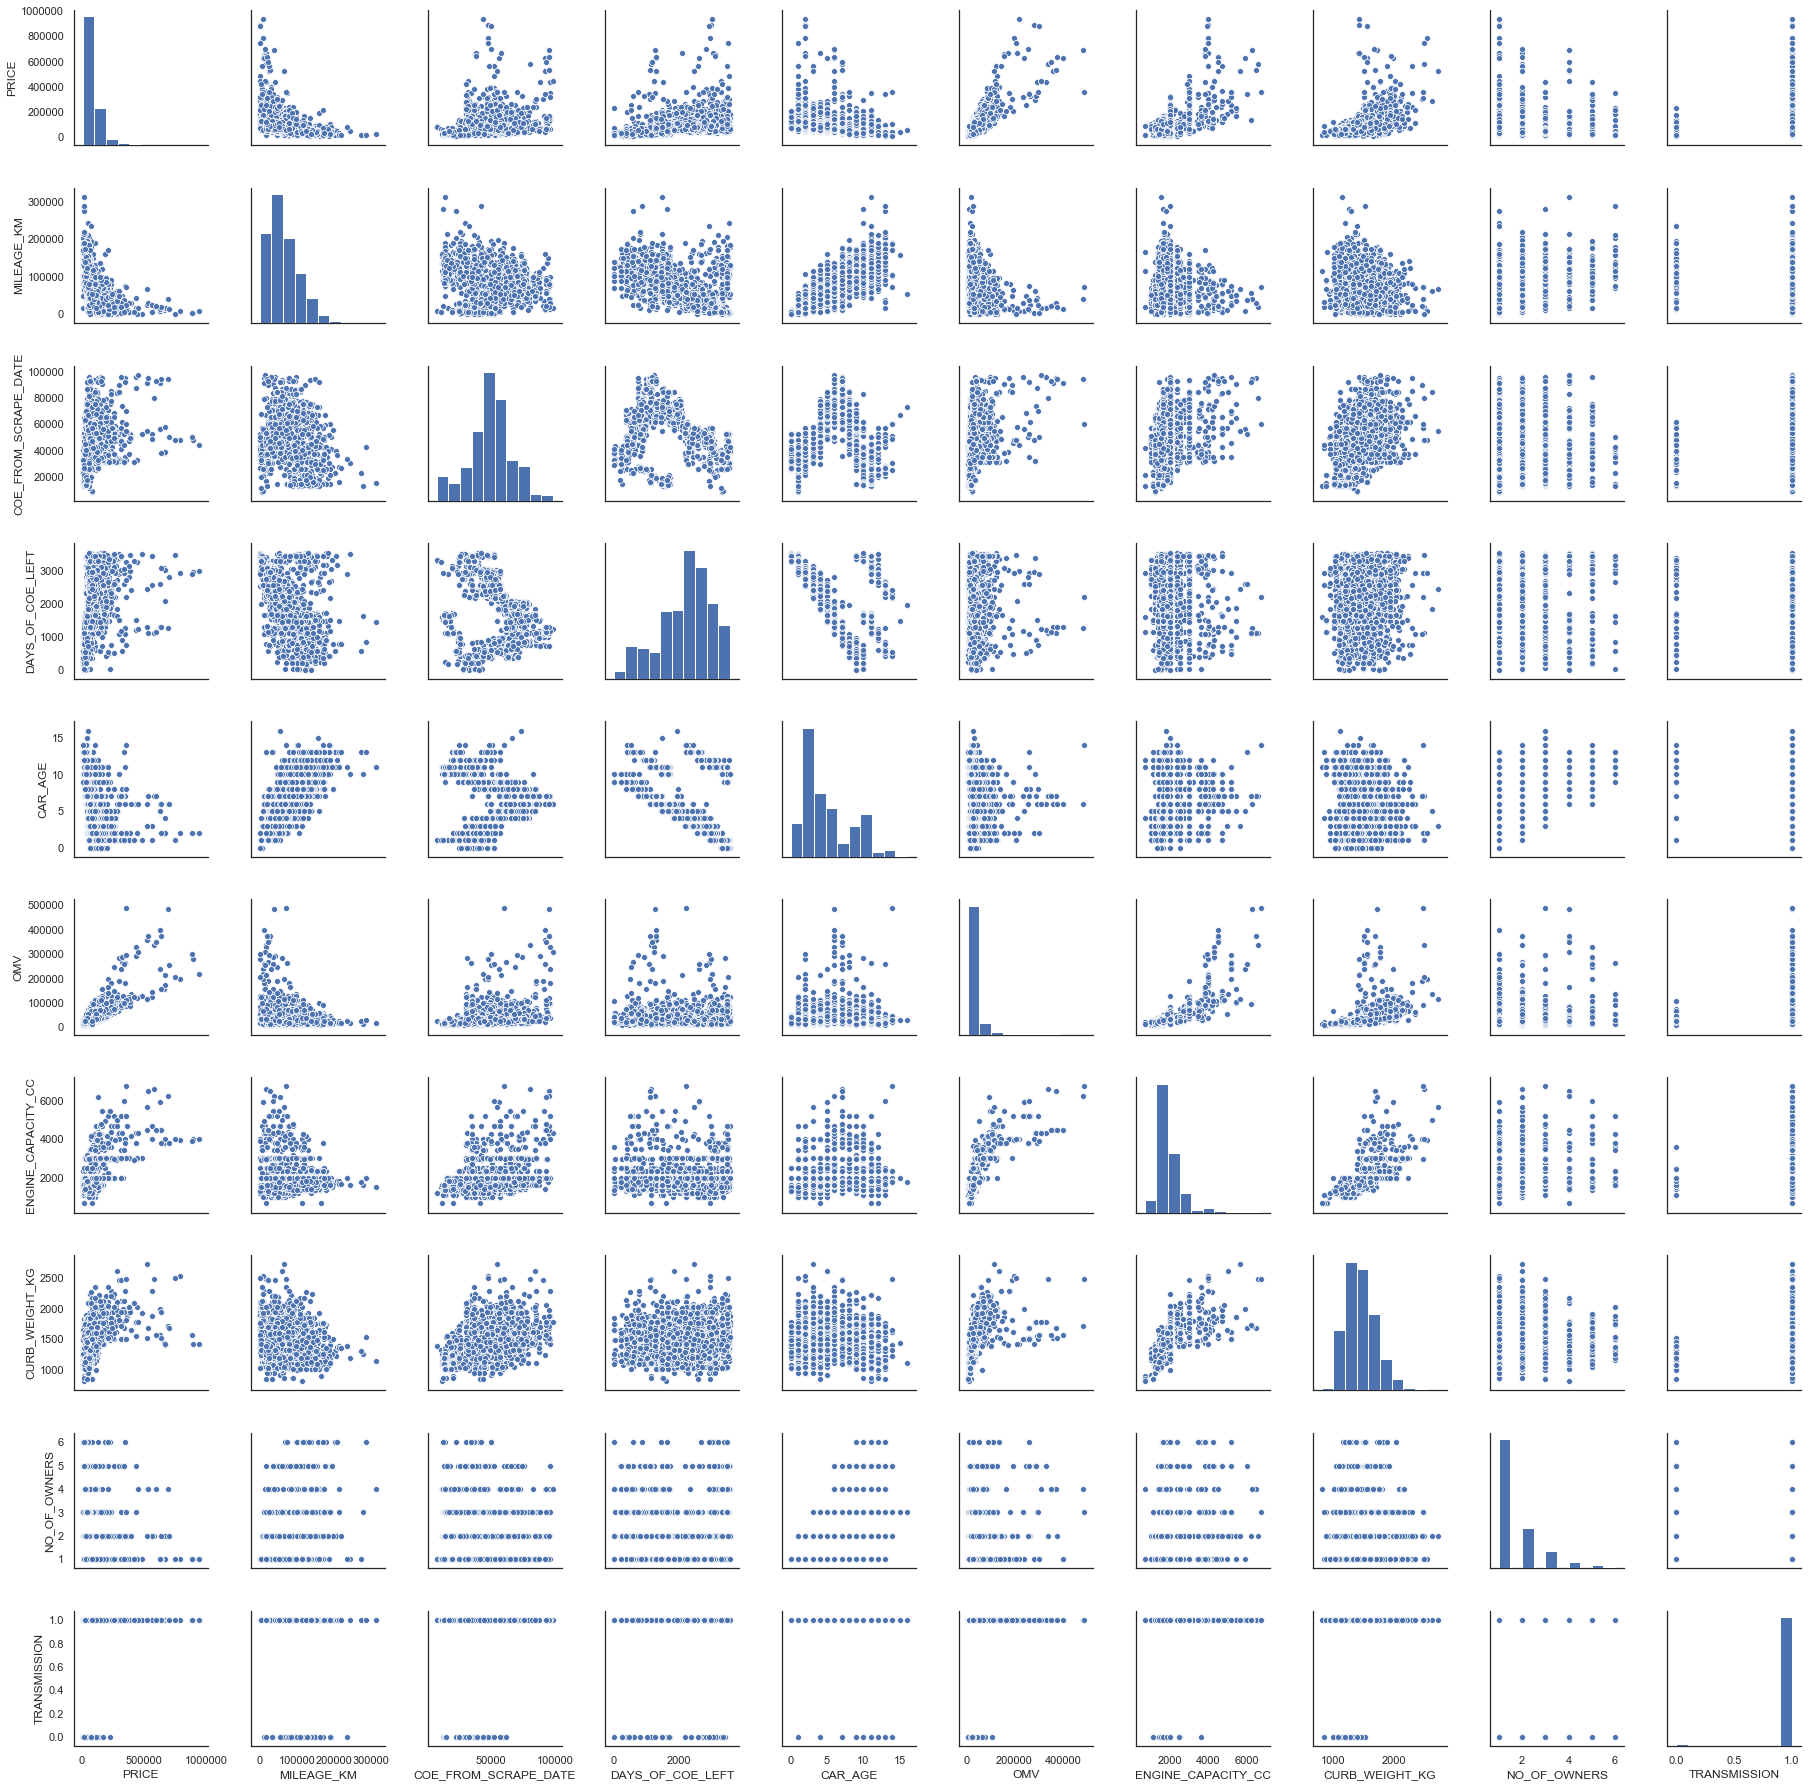

In [142]:
# Performing a pairplot to visualize the data trends of the variables

# We can see that price and mileage hold a negative linear relationship
# COE from the scrape date doesn't seem to have a very clear relatonship here
# Days of COE seems to have a slight linear r/s
# Car age doesn't seem to have a very distinct relationship here. But generally, the younger the car, the higher the price
# OMV has a clear increasing linear rs with price with price
# Engine capacity seems to also have a increasing linear r/s  with price, with a few outliers in the center
# Perhaps it's because a lot of the higher-priced cars (higher brands) are produced in that engine capacity range?
# Curb weight seems to have a linear r/s too.

sns.pairplot(df_price_no_brands);

##### Histograph of all Variables (Columns) in DataFrame

C:\Users\User\.conda\envs\metis\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D76F8A7240>,
      dtype=object)

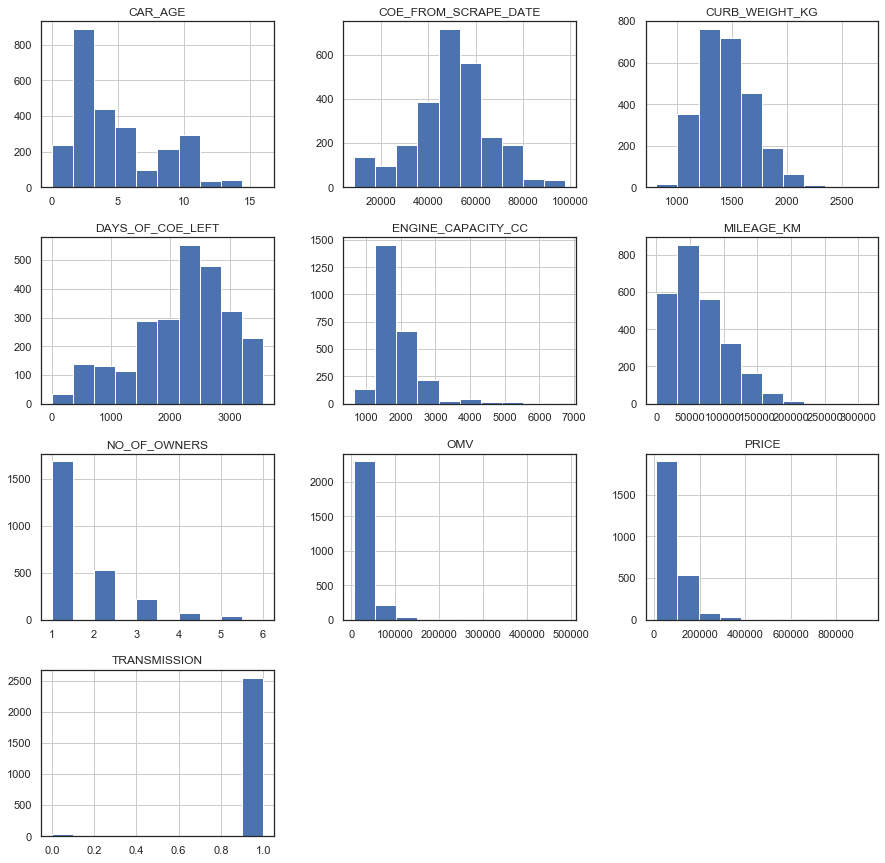

In [143]:
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(df_price_no_brands,ax=ax)

In [146]:
# From the above graphs, it would make sense to apply log transform on the following variables to make them
# more normally distributed
# Mileage
# Engine Cap
# Price
# OMV

## Distribution of Price

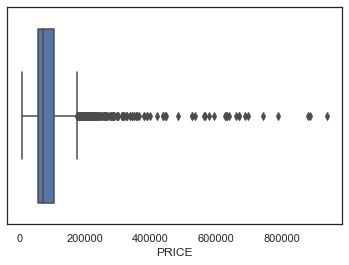

In [144]:
sns.boxplot(df_price_no_brands['PRICE'])  # 

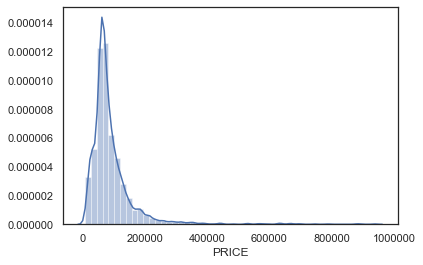

In [145]:
sns.distplot(df_price_no_brands['PRICE'])  # Your dependent variable 'must' be normally distributed

In [147]:
# We see that price is right-skewed. Therefore, we can try applying a log onto price, then visualize the data again.

### Log price vs Independent Variables

In [148]:
# Creating a copy of the dataframe to work log on
df_price_no_brands_logged = df_price_no_brands.copy()

In [149]:
# Rearranging Columns
df_price_no_brands_logged["PRICE_LOG"] = df_price_no_brands_logged['PRICE'].apply(np.log)
df_price_no_brands_logged = df_price_no_brands_logged[['PRICE' , 'PRICE_LOG', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION']]
df_price_no_brands_logged

PRICE  PRICE_LOG  MILEAGE_KM  COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT  \
3      70800.0  11.167614    140800.0               75889.0             761.0   
4      65800.0  11.094375    117000.0               39563.0            3503.0   
5      45000.0  10.714418    126000.0               41006.0               8.0   
7      70800.0  11.167614     41000.0               78810.0            1610.0   
9      89500.0  11.401994     57784.0               61103.0            2221.0   
...        ...        ...         ...                   ...               ...   
3981  103800.0  11.550221     19000.0               53694.0            2434.0   
3982  104500.0  11.556942     47638.0               84504.0            1679.0   
3983  115000.0  11.652687     51500.0               67901.0            1950.0   
3984  119800.0  11.693579     16000.0               53300.0            2769.0   
3985   81800.0  11.312033     53339.0               57501.0            2462.0   

      CAR_AGE      OMV  ENGINE_CAPACITY_CC  CURB_WEIGHT_KG  NO_OF_OWNERS  \
3         8.0  71379.0                2995          2250.0           3.0   
4        10.0  23465.0                1797          1350.0           2.0   
5         9.0  56154.0                1796          1650.0           4.0   
7         6.0  32459.0                1598          1405.0           2.0   
9         4.0  29913.0                1395          1480.0           2.0   
...       ...      ...                 ...             ...           ...   
3981      3.0  27886.0                1595          1430.0           1.0   
3982      5.0  45977.0                3456          2030.0           2.0   
3983      7.0  52051.0                1796          1600.0           2.0   
3984      2.0  33570.0                1998          1390.0           1.0   
3985      4.0  26629.0                2488          1510.0           1.0   

      TRANSMISSION  
3                1  
4                1  
5                1  
7                1  
9                1  
...            ...  
3981             1  
3982             1  
3983             1  
3984             1  
3985             1  

[2584 rows x 11 columns]

#### Visualizing Log Price vs Independent Variables (which are not logged yet)

In [150]:
df_price_no_brands_logged_price_only = df_price_no_brands_logged.drop(['PRICE'],axis=1)

##### Pairplot of Log Price vs Independent Variables

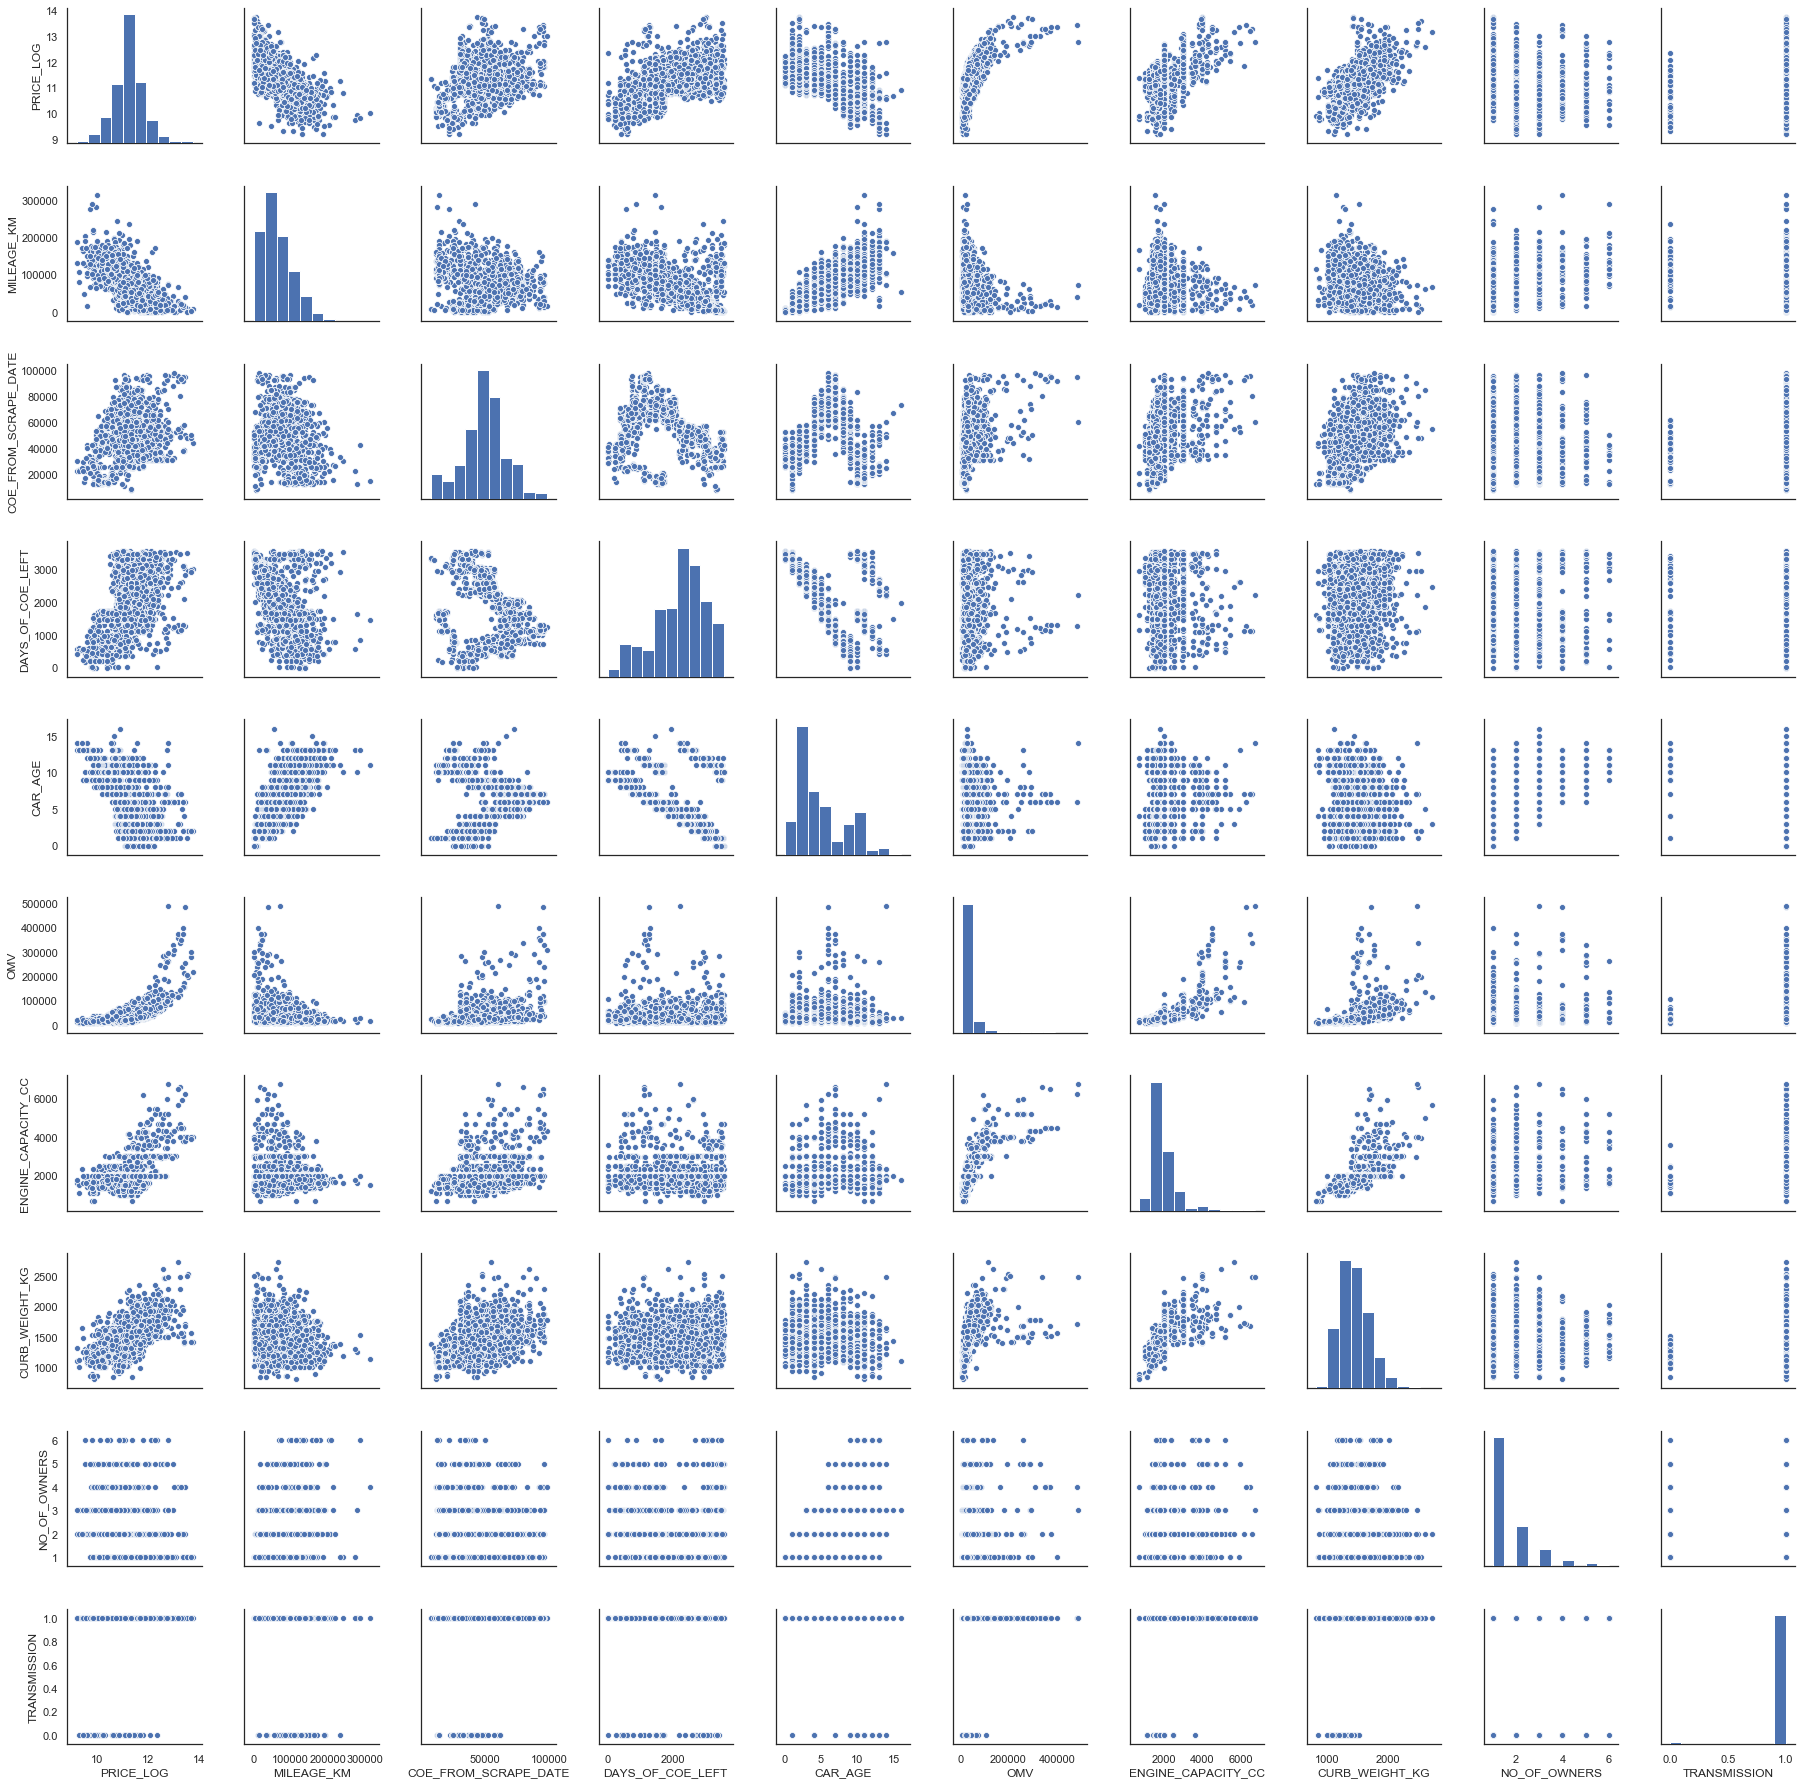

In [151]:
sns.pairplot(df_price_no_brands_logged_price_only);

# We observe that the data now follows a more normal trend that we can visualize. 
# However, OMV seems to have a expo relationship with price now

##### Correlation Heatmap: Log Price vs Independent Variables

(10.0, 0.0)

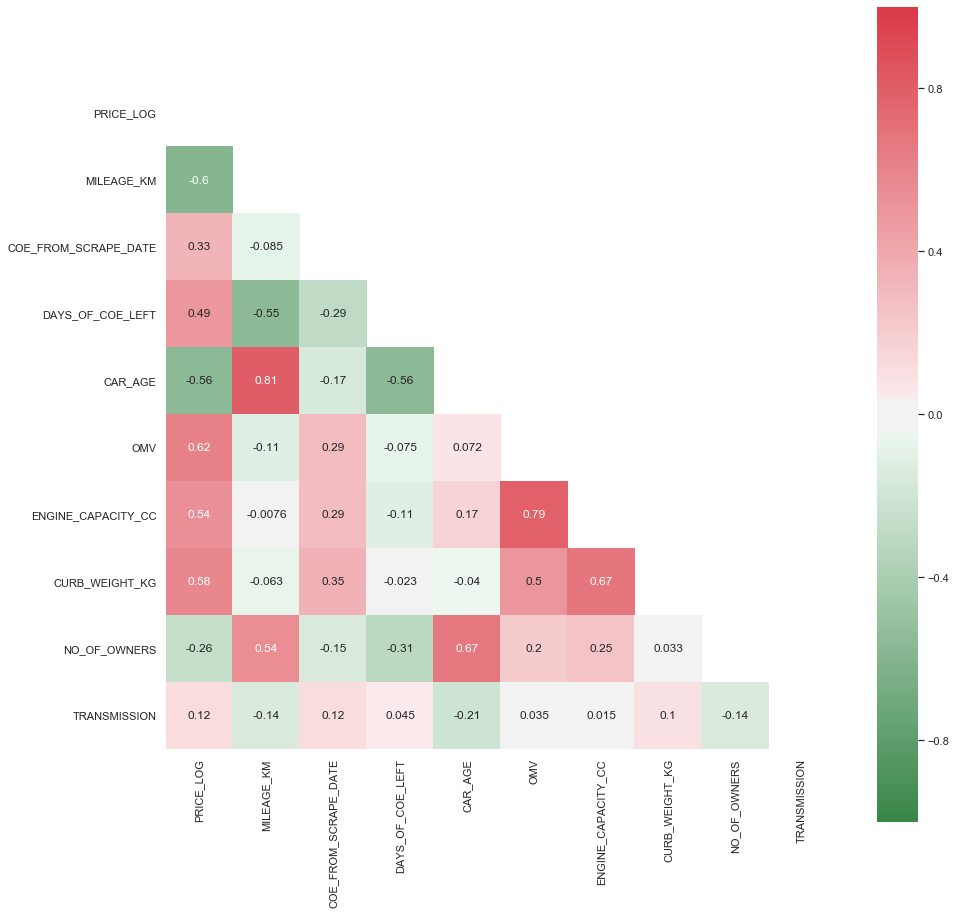

In [152]:
# Re-visualizing the correlation matrix

sns.set(style="white")
data = df_price_no_brands_logged_price_only.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(15,15))

# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
sns.heatmap(data, mask=mask, annot=True, 
            square=True, cmap=cmap , vmin=-1, vmax=1,ax=ax);

# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [155]:
df_price_no_brands_logged_price_only.corr()['PRICE_LOG'].sort_values(ascending=False)

PRICE_LOG               1.000000
OMV                     0.616616
CURB_WEIGHT_KG          0.584304
ENGINE_CAPACITY_CC      0.535995
DAYS_OF_COE_LEFT        0.492245
COE_FROM_SCRAPE_DATE    0.332006
TRANSMISSION            0.119339
NO_OF_OWNERS           -0.262690
CAR_AGE                -0.557937
MILEAGE_KM             -0.598217
Name: PRICE_LOG, dtype: float64

#### LogPrice vs Original Independent Variables Model Fitting to find out R^2

In [157]:
# Checking NEW PRICE_LOG fit with the ORIGINAL dependent variables

# model / fit / summarize
import statsmodels.api as sm

X = df_price_no_brands_logged_price_only[ ['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 'CAR_AGE',
       'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG', 'NO_OF_OWNERS',
       'TRANSMISSION'] ]
X = sm.add_constant(X)
y = df_price_no_brands_logged_price_only['PRICE_LOG']

lsm_log_price = sm.OLS(y, X)
results_log_price = lsm_log_price.fit()
results_log_price.summary()


# We see here that number of owners might be something we want to remove.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PRICE_LOG   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     2537.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:52:45   Log-Likelihood:                 592.27
No. Observations:                2584   AIC:                            -1165.
Df Residuals:                    2574   BIC:                            -1106.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.5648      0.048    199.084      0.000       9.471       9.659
MILEAGE_KM           -9.779e-07   1.69e-07     -5.787      0.000   -1.31e-06   -6.47e-07
COE_FROM_SCRAPE_DATE  5.524e-06   2.95e-07     18.745      0.000    4.95e-06     6.1e-06
DAYS_OF_COE_LEFT         0.0003   6.54e-06     42.287      0.000       0.000       0.000
CAR_AGE                 -0.0581      0.003    -22.486      0.000      -0.063      -0.053
OMV                   7.234e-06   1.77e-07     40.779      0.000    6.89e-06    7.58e-06
ENGINE_CAPACITY_CC    5.779e-05   1.14e-05      5.080      0.000    3.55e-05    8.01e-05
CURB_WEIGHT_KG           0.0006   2.16e-05     29.841      0.000       0.001       0.001
NO_OF_OWNERS            -0.0020      0.006     -0.357      0.721      -0.013       0.009
TRANSMISSION            -0.1565      0.033     -4.754      0.000      -0.221      -0.092
==============================================================================
Omnibus:                      534.178   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8891.128
Skew:                          -0.507   Prob(JB):                         0.00
Kurtosis:                      12.031   Cond. No.                     1.36e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Log Price vs Original Independent Variables:  
R^2: **0.899**  
R^2 Adjusted: **0.898**

#### Improving R^2 Score: Logging the other Independent Variables

#### Section 3.2.2: Visualizing Distributions of all Logged Variables

In [231]:
df_price_no_brands_logged_price_and_logged_independent_variables = df_price_no_brands_logged.copy()

In [232]:
df_price_no_brands_logged.columns

Index(['PRICE', 'PRICE_LOG', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'TRANSMISSION'],
      dtype='object')

In [233]:
# Applying log to all the 5 independent variables

df_price_no_brands_logged_price_and_logged_independent_variables["MILEAGE_LOG"] = df_price_no_brands_logged['MILEAGE_KM'].apply(np.log)
df_price_no_brands_logged_price_and_logged_independent_variables["COE_FROM_SCRAPE_DATE_LOG"] = df_price_no_brands_logged['COE_FROM_SCRAPE_DATE'].apply(np.log)
df_price_no_brands_logged_price_and_logged_independent_variables["OMV_LOG"] = df_price_no_brands_logged['OMV'].apply(np.log)
df_price_no_brands_logged_price_and_logged_independent_variables["ENGINE_CAPACITY_CC_LOG"] = df_price_no_brands_logged['ENGINE_CAPACITY_CC'].apply(np.log)
df_price_no_brands_logged_price_and_logged_independent_variables["CURB_WEIGHT_KG_LOG"] = df_price_no_brands_logged['CURB_WEIGHT_KG'].apply(np.log)

In [234]:
df_price_no_brands_logged_price_and_logged_independent_variables.columns

Index(['PRICE', 'PRICE_LOG', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'TRANSMISSION', 'MILEAGE_LOG',
       'COE_FROM_SCRAPE_DATE_LOG', 'OMV_LOG', 'ENGINE_CAPACITY_CC_LOG',
       'CURB_WEIGHT_KG_LOG'],
      dtype='object')

In [235]:
# Rearranging Columns
df_price_no_brands_logged_price_and_logged_independent_variables[['PRICE', 'PRICE_LOG', 
                                                                  'MILEAGE_KM', 'MILEAGE_LOG', 
                                                                  'COE_FROM_SCRAPE_DATE', 'COE_FROM_SCRAPE_DATE_LOG',
                                                                  'DAYS_OF_COE_LEFT', 'CAR_AGE',
                                                                  'OMV', 'OMV_LOG', 
                                                                  'ENGINE_CAPACITY_CC', 'ENGINE_CAPACITY_CC_LOG', 
                                                                  'CURB_WEIGHT_KG', 'CURB_WEIGHT_KG_LOG',
                                                                  'NO_OF_OWNERS', 'TRANSMISSION']]

PRICE  PRICE_LOG  MILEAGE_KM  MILEAGE_LOG  COE_FROM_SCRAPE_DATE  \
3      70800.0  11.167614    140800.0    11.855096               75889.0   
4      65800.0  11.094375    117000.0    11.669929               39563.0   
5      45000.0  10.714418    126000.0    11.744037               41006.0   
7      70800.0  11.167614     41000.0    10.621327               78810.0   
9      89500.0  11.401994     57784.0    10.964467               61103.0   
...        ...        ...         ...          ...                   ...   
3981  103800.0  11.550221     19000.0     9.852194               53694.0   
3982  104500.0  11.556942     47638.0    10.771386               84504.0   
3983  115000.0  11.652687     51500.0    10.849337               67901.0   
3984  119800.0  11.693579     16000.0     9.680344               53300.0   
3985   81800.0  11.312033     53339.0    10.884423               57501.0   

      COE_FROM_SCRAPE_DATE_LOG  DAYS_OF_COE_LEFT  CAR_AGE      OMV    OMV_LOG  \
3                    11.237027             761.0      8.0  71379.0  11.175759   
4                    10.585650            3503.0     10.0  23465.0  10.063265   
5                    10.621474               8.0      9.0  56154.0  10.935853   
7                    11.274795            1610.0      6.0  32459.0  10.387733   
9                    11.020316            2221.0      4.0  29913.0  10.306048   
...                        ...               ...      ...      ...        ...   
3981                 10.891057            2434.0      3.0  27886.0  10.235880   
3982                 11.344554            1679.0      5.0  45977.0  10.735897   
3983                 11.125806            1950.0      7.0  52051.0  10.859979   
3984                 10.883692            2769.0      2.0  33570.0  10.421388   
3985                 10.959558            2462.0      4.0  26629.0  10.189756   

      ENGINE_CAPACITY_CC  ENGINE_CAPACITY_CC_LOG  CURB_WEIGHT_KG  \
3                   2995                8.004700          2250.0   
4                   1797                7.493874          1350.0   
5                   1796                7.493317          1650.0   
7                   1598                7.376508          1405.0   
9                   1395                7.240650          1480.0   
...                  ...                     ...             ...   
3981                1595                7.374629          1430.0   
3982                3456                8.147867          2030.0   
3983                1796                7.493317          1600.0   
3984                1998                7.599902          1390.0   
3985                2488                7.819234          1510.0   

      CURB_WEIGHT_KG_LOG  NO_OF_OWNERS  TRANSMISSION  
3               7.718685           3.0             1  
4               7.207860           2.0             1  
5               7.408531           4.0             1  
7               7.247793           2.0             1  
9               7.299797           2.0             1  
...                  ...           ...           ...  
3981            7.265430           1.0             1  
3982            7.615791           2.0             1  
3983            7.377759           2.0             1  
3984            7.237059           1.0             1  
3985            7.319865           1.0             1  

[2584 rows x 16 columns]

#### Section 3.2.3: Visualizing Pairplot of all Logged Variables

In [237]:
# Drop original, non-logged independent variables
df_price_no_brands_logged_price_and_logged_independent_variables.drop(['PRICE','MILEAGE_KM', 'COE_FROM_SCRAPE_DATE',
                                                                       'OMV', 'ENGINE_CAPACITY_CC',
                                                                       'CURB_WEIGHT_KG'],1,inplace=True)

In [238]:
# Rearranging columns
df_price_no_brands_logged_price_and_logged_independent_variables = \
df_price_no_brands_logged_price_and_logged_independent_variables[['PRICE_LOG', 'MILEAGE_LOG',
       'COE_FROM_SCRAPE_DATE_LOG', 'DAYS_OF_COE_LEFT', 'CAR_AGE',
       'OMV_LOG', 'ENGINE_CAPACITY_CC_LOG', 'CURB_WEIGHT_KG_LOG', 'NO_OF_OWNERS', 'TRANSMISSION',
       ]]

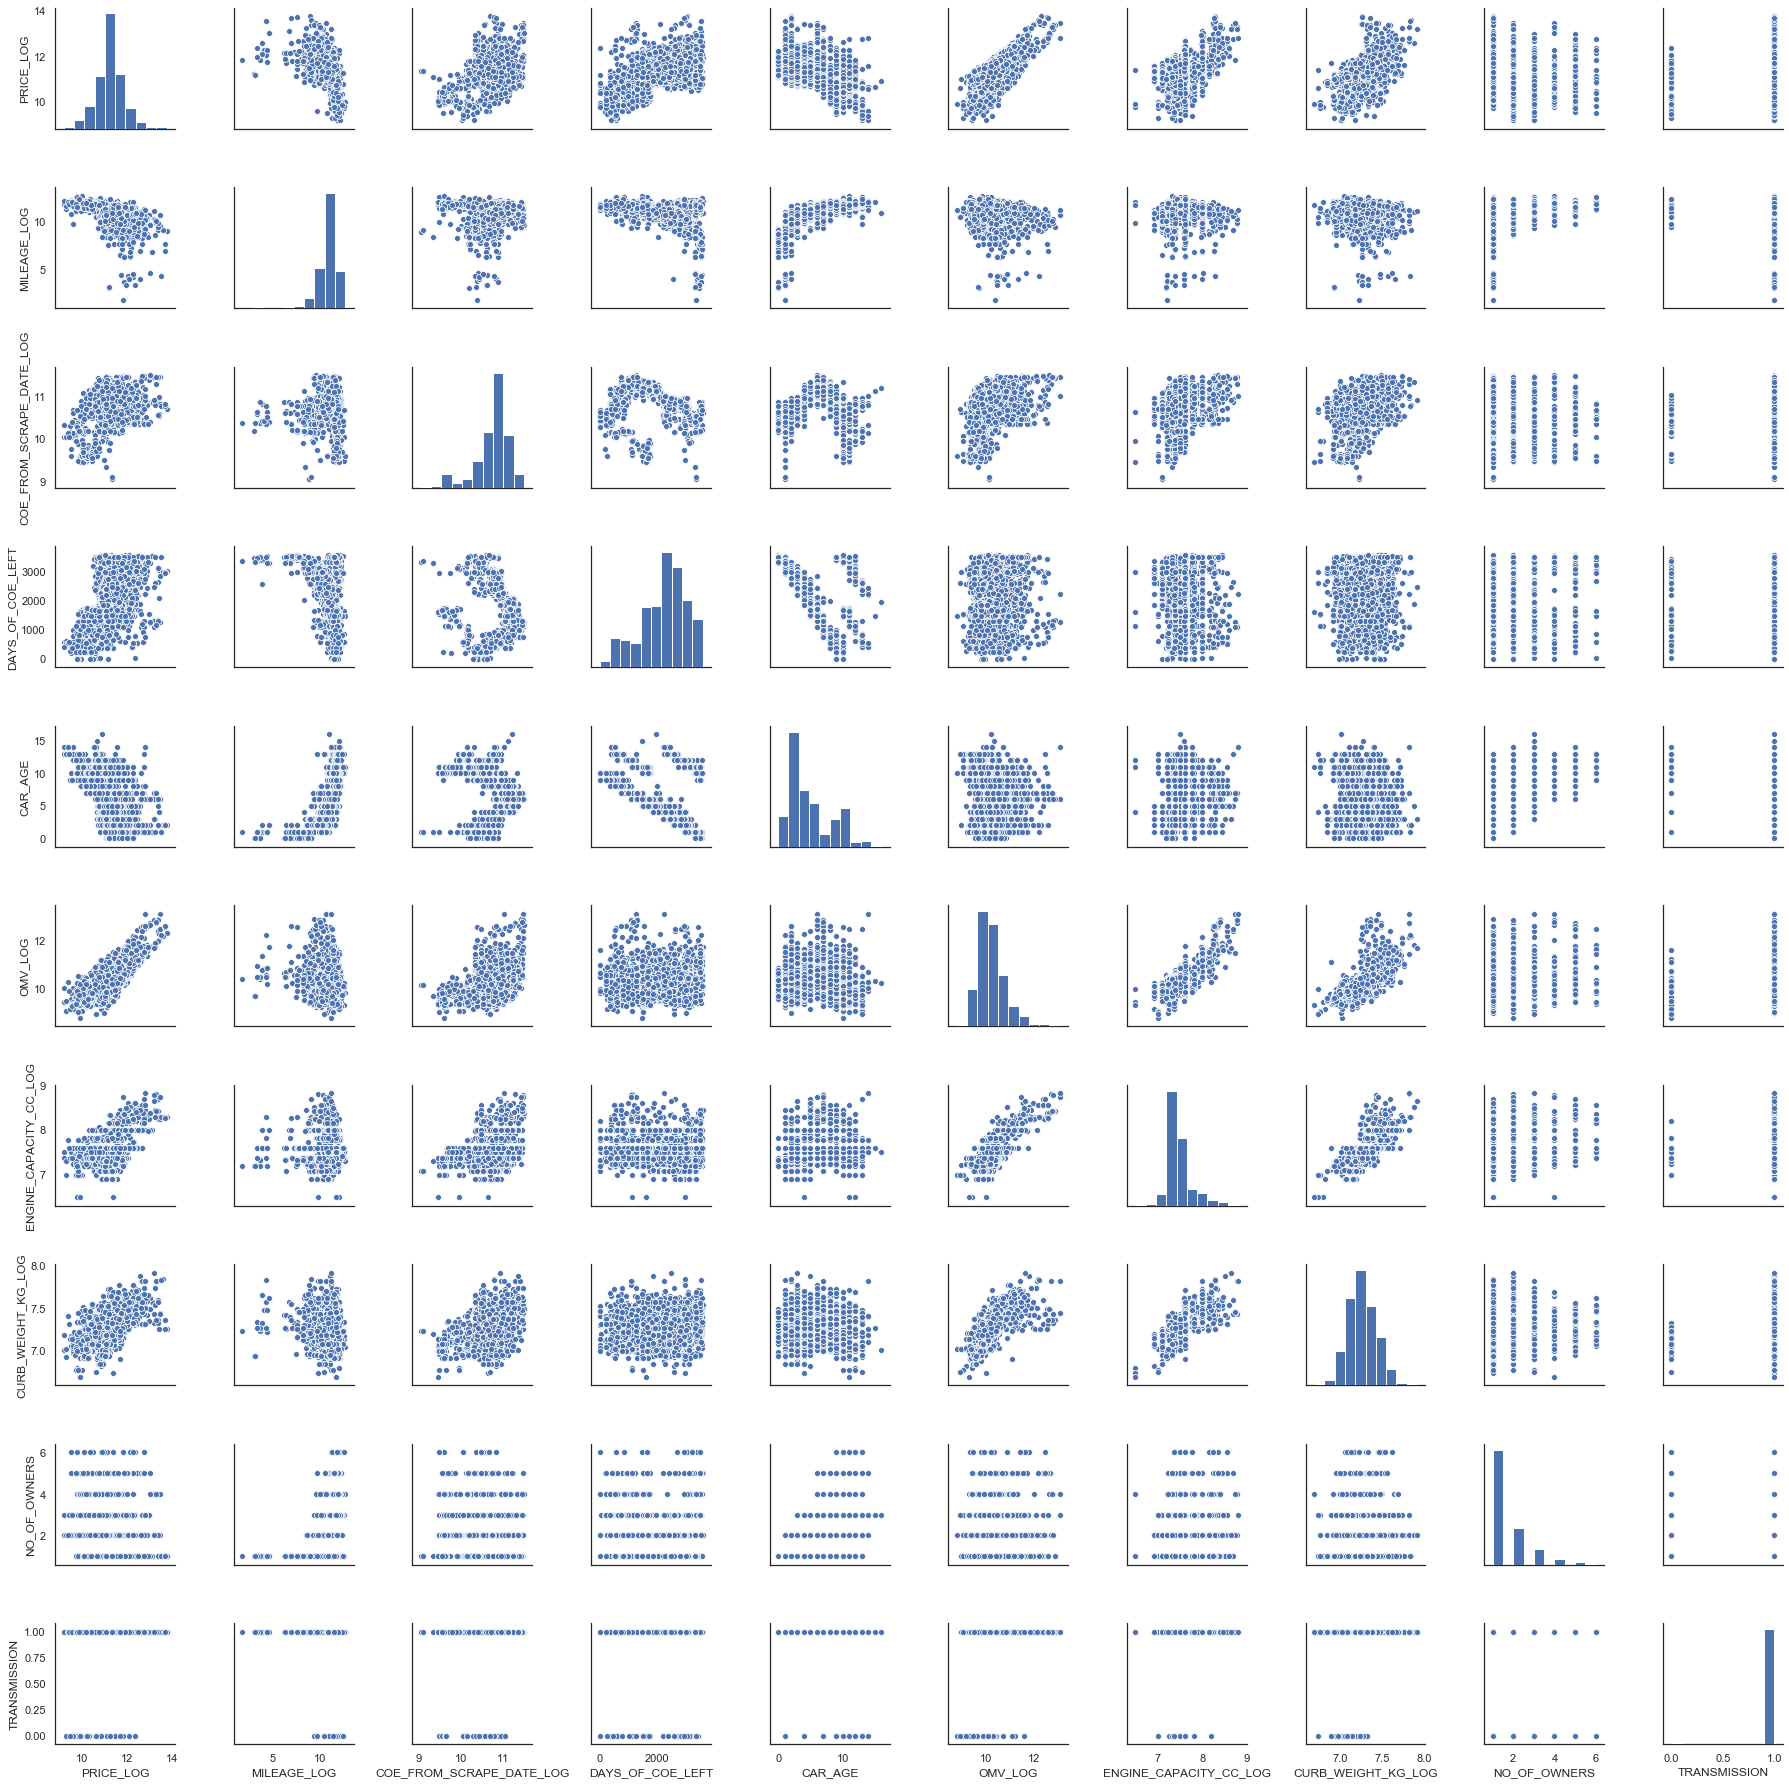

In [240]:
sns.pairplot(df_price_no_brands_logged_price_and_logged_independent_variables);

C:\Users\User\.conda\envs\metis\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


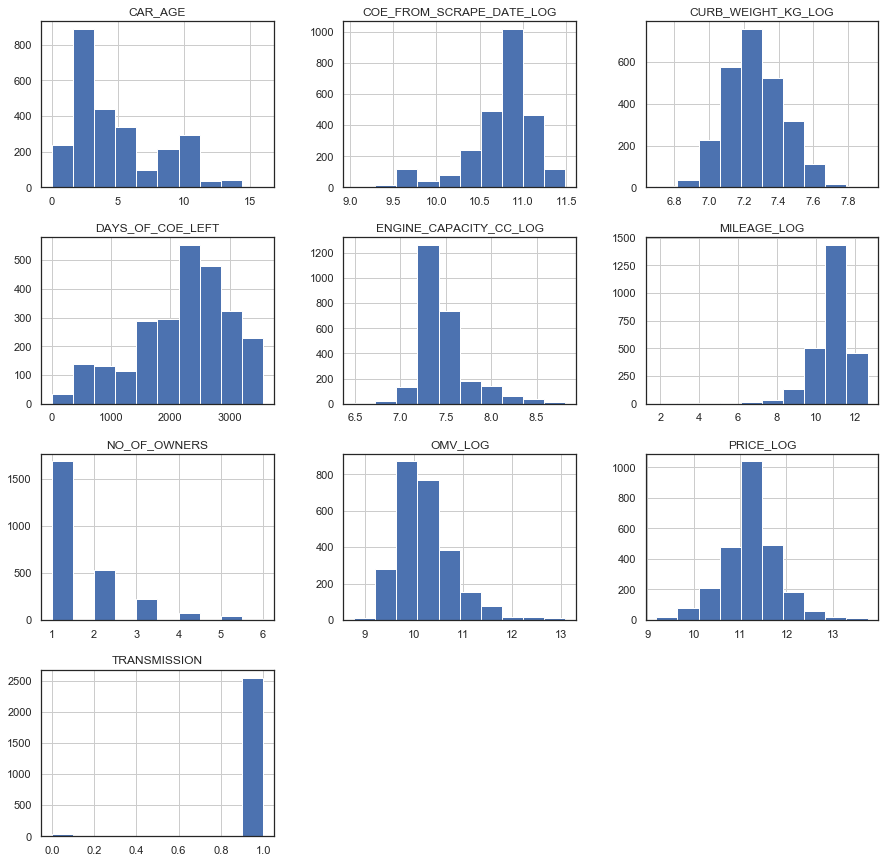

In [241]:
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(df_price_no_brands_logged_price_and_logged_independent_variables, ax=ax);

(10.0, 0.0)

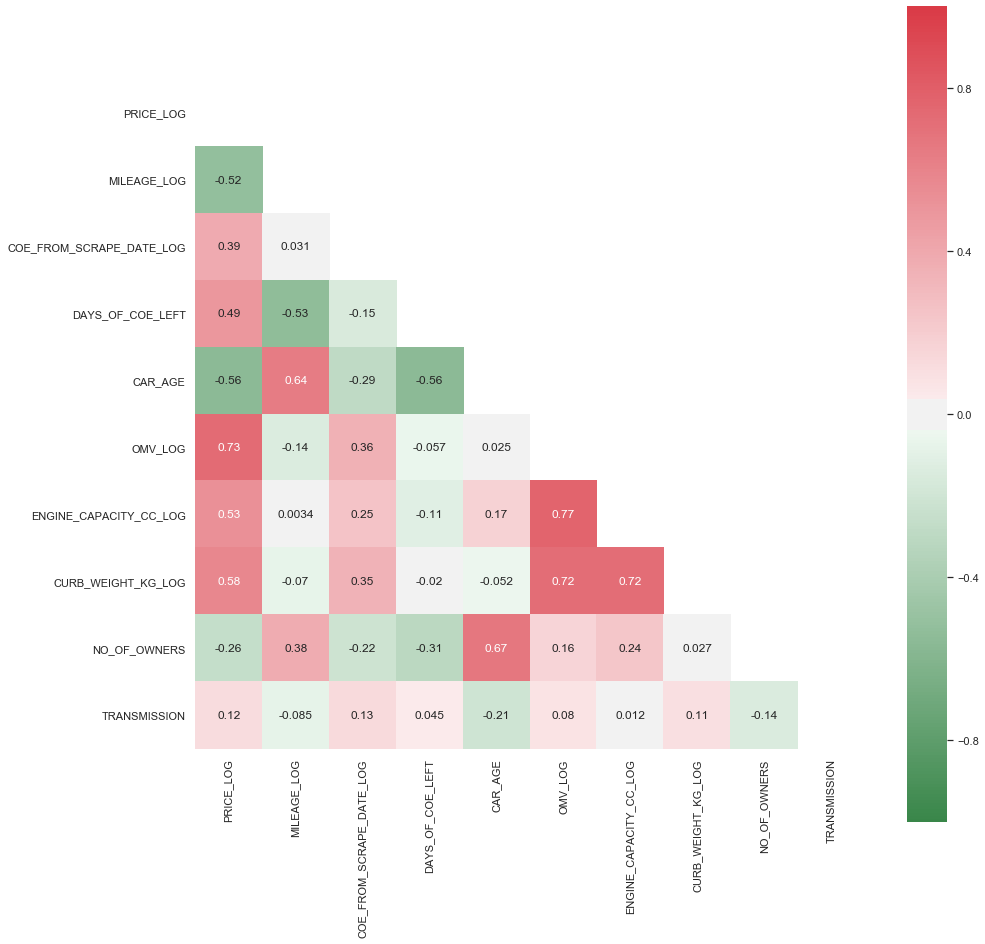

In [246]:
# Viewing Corr Matrix of Log Price vs Logged Independent Variables

sns.set(style="white")
data = df_price_no_brands_logged_price_and_logged_independent_variables.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(15,15))

# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
sns.heatmap(data, mask=mask, annot=True, 
            square=True, cmap=cmap , vmin=-1, vmax=1,ax=ax);

# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [247]:
# Finding out new R^2 from log transformations of Log Price and Log Independent Variables

# Slicing Variables
X = df_price_no_brands_logged_price_and_logged_independent_variables[['MILEAGE_LOG',
       'COE_FROM_SCRAPE_DATE_LOG', 'DAYS_OF_COE_LEFT', 'CAR_AGE',
       'OMV_LOG', 'ENGINE_CAPACITY_CC_LOG', 'CURB_WEIGHT_KG_LOG', 'NO_OF_OWNERS', 'TRANSMISSION',
       ]]
X = sm.add_constant(X)
y = df_price_no_brands_logged_price_and_logged_independent_variables['PRICE_LOG']


# model / fit / summarize
import statsmodels.api as sm

lsm = sm.OLS(y, X)
results = lsm.fit()
results.summary()


# However, curb weight here seems to be something we want to consider removing. 
# Mileage seems to be considered not correct now. Try changing mileage and curb weight back to non-log.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PRICE_LOG   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     4399.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:33:34   Log-Likelihood:                 1246.6
No. Observations:                2584   AIC:                            -2473.
Df Residuals:                    2574   BIC:                            -2415.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.4735      0.158      9.345      0.000       1.164       1.783
MILEAGE_LOG                 -0.0044      0.004     -1.023      0.306      -0.013       0.004
COE_FROM_SCRAPE_DATE_LOG     0.0993      0.010     10.183      0.000       0.080       0.118
DAYS_OF_COE_LEFT             0.0002   4.86e-06     50.649      0.000       0.000       0.000
CAR_AGE                     -0.0711      0.002    -38.882      0.000      -0.075      -0.067
OMV_LOG                      0.6732      0.009     73.480      0.000       0.655       0.691
ENGINE_CAPACITY_CC_LOG       0.2795      0.019     15.084      0.000       0.243       0.316
CURB_WEIGHT_KG_LOG          -0.0294      0.028     -1.046      0.296      -0.084       0.026
NO_OF_OWNERS                -0.0208      0.004     -4.914      0.000      -0.029      -0.013
TRANSMISSION                -0.1955      0.026     -7.634      0.000      -0.246      -0.145
==============================================================================
Omnibus:                      110.700   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.651
Skew:                          -0.058   Prob(JB):                     4.36e-77
Kurtosis:                       4.804   Cond. No.                     1.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R^2 Summary from Linear Regression Models
Log Price vs Original Independent Variables:  
R^2: **0.899**  
R^2 Adjusted: **0.898**  
  
Log Price vs Logged Independent Variables:  
R^2: **0.939**  
R^2 Adjusted: **0.939**  

#### Section 3.2.4: Returning Mileage and Curb Weight to non-log

In [276]:
df_price_no_brands_logged_price_and_logged_independent_variables_mileage_no_log = df_price_no_brands_logged.copy()

In [277]:
# Applying log to all the 4 independent variables

df_price_no_brands_logged_price_and_logged_independent_variables_mileage_no_log["COE_FROM_SCRAPE_DATE_LOG"] = df_price_no_brands_logged['COE_FROM_SCRAPE_DATE'].apply(np.log)
df_price_no_brands_logged_price_and_logged_independent_variables_mileage_no_log["OMV_LOG"] = df_price_no_brands_logged['OMV'].apply(np.log)
df_price_no_brands_logged_price_and_logged_independent_variables_mileage_no_log["ENGINE_CAPACITY_CC_LOG"] = df_price_no_brands_logged['ENGINE_CAPACITY_CC'].apply(np.log)

In [278]:
# Rearranging Columns
df_price_no_brands_logged_price_and_logged_independent_variables_mileage_no_log[['PRICE', 'PRICE_LOG', 
                                                                  'MILEAGE_KM',
                                                                  'COE_FROM_SCRAPE_DATE', 'COE_FROM_SCRAPE_DATE_LOG',
                                                                  'DAYS_OF_COE_LEFT', 'CAR_AGE',
                                                                  'OMV', 'OMV_LOG', 
                                                                  'ENGINE_CAPACITY_CC', 'ENGINE_CAPACITY_CC_LOG', 
                                                                  'CURB_WEIGHT_KG','NO_OF_OWNERS', 'TRANSMISSION']]

PRICE  PRICE_LOG  MILEAGE_KM  COE_FROM_SCRAPE_DATE  \
3      70800.0  11.167614    140800.0               75889.0   
4      65800.0  11.094375    117000.0               39563.0   
5      45000.0  10.714418    126000.0               41006.0   
7      70800.0  11.167614     41000.0               78810.0   
9      89500.0  11.401994     57784.0               61103.0   
...        ...        ...         ...                   ...   
3981  103800.0  11.550221     19000.0               53694.0   
3982  104500.0  11.556942     47638.0               84504.0   
3983  115000.0  11.652687     51500.0               67901.0   
3984  119800.0  11.693579     16000.0               53300.0   
3985   81800.0  11.312033     53339.0               57501.0   

      COE_FROM_SCRAPE_DATE_LOG  DAYS_OF_COE_LEFT  CAR_AGE      OMV    OMV_LOG  \
3                    11.237027             761.0      8.0  71379.0  11.175759   
4                    10.585650            3503.0     10.0  23465.0  10.063265   
5                    10.621474               8.0      9.0  56154.0  10.935853   
7                    11.274795            1610.0      6.0  32459.0  10.387733   
9                    11.020316            2221.0      4.0  29913.0  10.306048   
...                        ...               ...      ...      ...        ...   
3981                 10.891057            2434.0      3.0  27886.0  10.235880   
3982                 11.344554            1679.0      5.0  45977.0  10.735897   
3983                 11.125806            1950.0      7.0  52051.0  10.859979   
3984                 10.883692            2769.0      2.0  33570.0  10.421388   
3985                 10.959558            2462.0      4.0  26629.0  10.189756   

      ENGINE_CAPACITY_CC  ENGINE_CAPACITY_CC_LOG  CURB_WEIGHT_KG  \
3                   2995                8.004700          2250.0   
4                   1797                7.493874          1350.0   
5                   1796                7.493317          1650.0   
7                   1598                7.376508          1405.0   
9                   1395                7.240650          1480.0   
...                  ...                     ...             ...   
3981                1595                7.374629          1430.0   
3982                3456                8.147867          2030.0   
3983                1796                7.493317          1600.0   
3984                1998                7.599902          1390.0   
3985                2488                7.819234          1510.0   

      NO_OF_OWNERS  TRANSMISSION  
3              3.0             1  
4              2.0             1  
5              4.0             1  
7              2.0             1  
9              2.0             1  
...            ...           ...  
3981           1.0             1  
3982           2.0             1  
3983           2.0             1  
3984           1.0             1  
3985           1.0             1  

[2584 rows x 14 columns]

In [279]:
# Dropping only keeping relevant columns
df_price_no_brands_logged_price_and_logged_independent_variables_mileage_no_log =\
df_price_no_brands_logged_price_and_logged_independent_variables_mileage_no_log[['PRICE_LOG', 
                                                                  'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE_LOG',
                                                                  'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV_LOG',
                                                                  'ENGINE_CAPACITY_CC_LOG', 'CURB_WEIGHT_KG',
                                                                  'NO_OF_OWNERS', 'TRANSMISSION']]

##### Section 3.2.5: Correlation Matrix View: No Mileage log and No Curb Weight log

(10.0, 0.0)

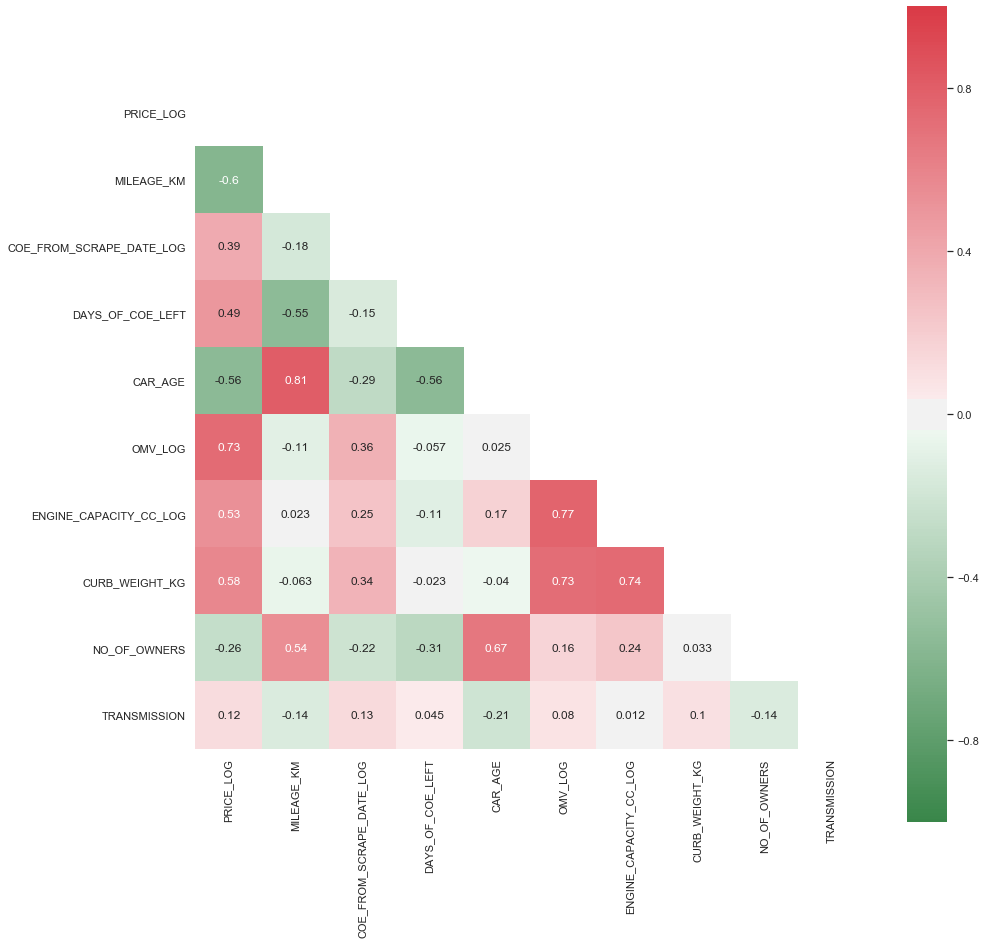

In [284]:
# Viewing Corr Matrix of Log Price vs Logged Independent Variables (Except Mileage and Curb Weight)

sns.set(style="white")
data = df_price_no_brands_logged_price_and_logged_independent_variables_mileage_no_log.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(15,15))

# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
sns.heatmap(data, mask=mask, annot=True, 
            square=True, cmap=cmap , vmin=-1, vmax=1,ax=ax);

# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

##### Section 3.2.5.1: Pairplot Visualization

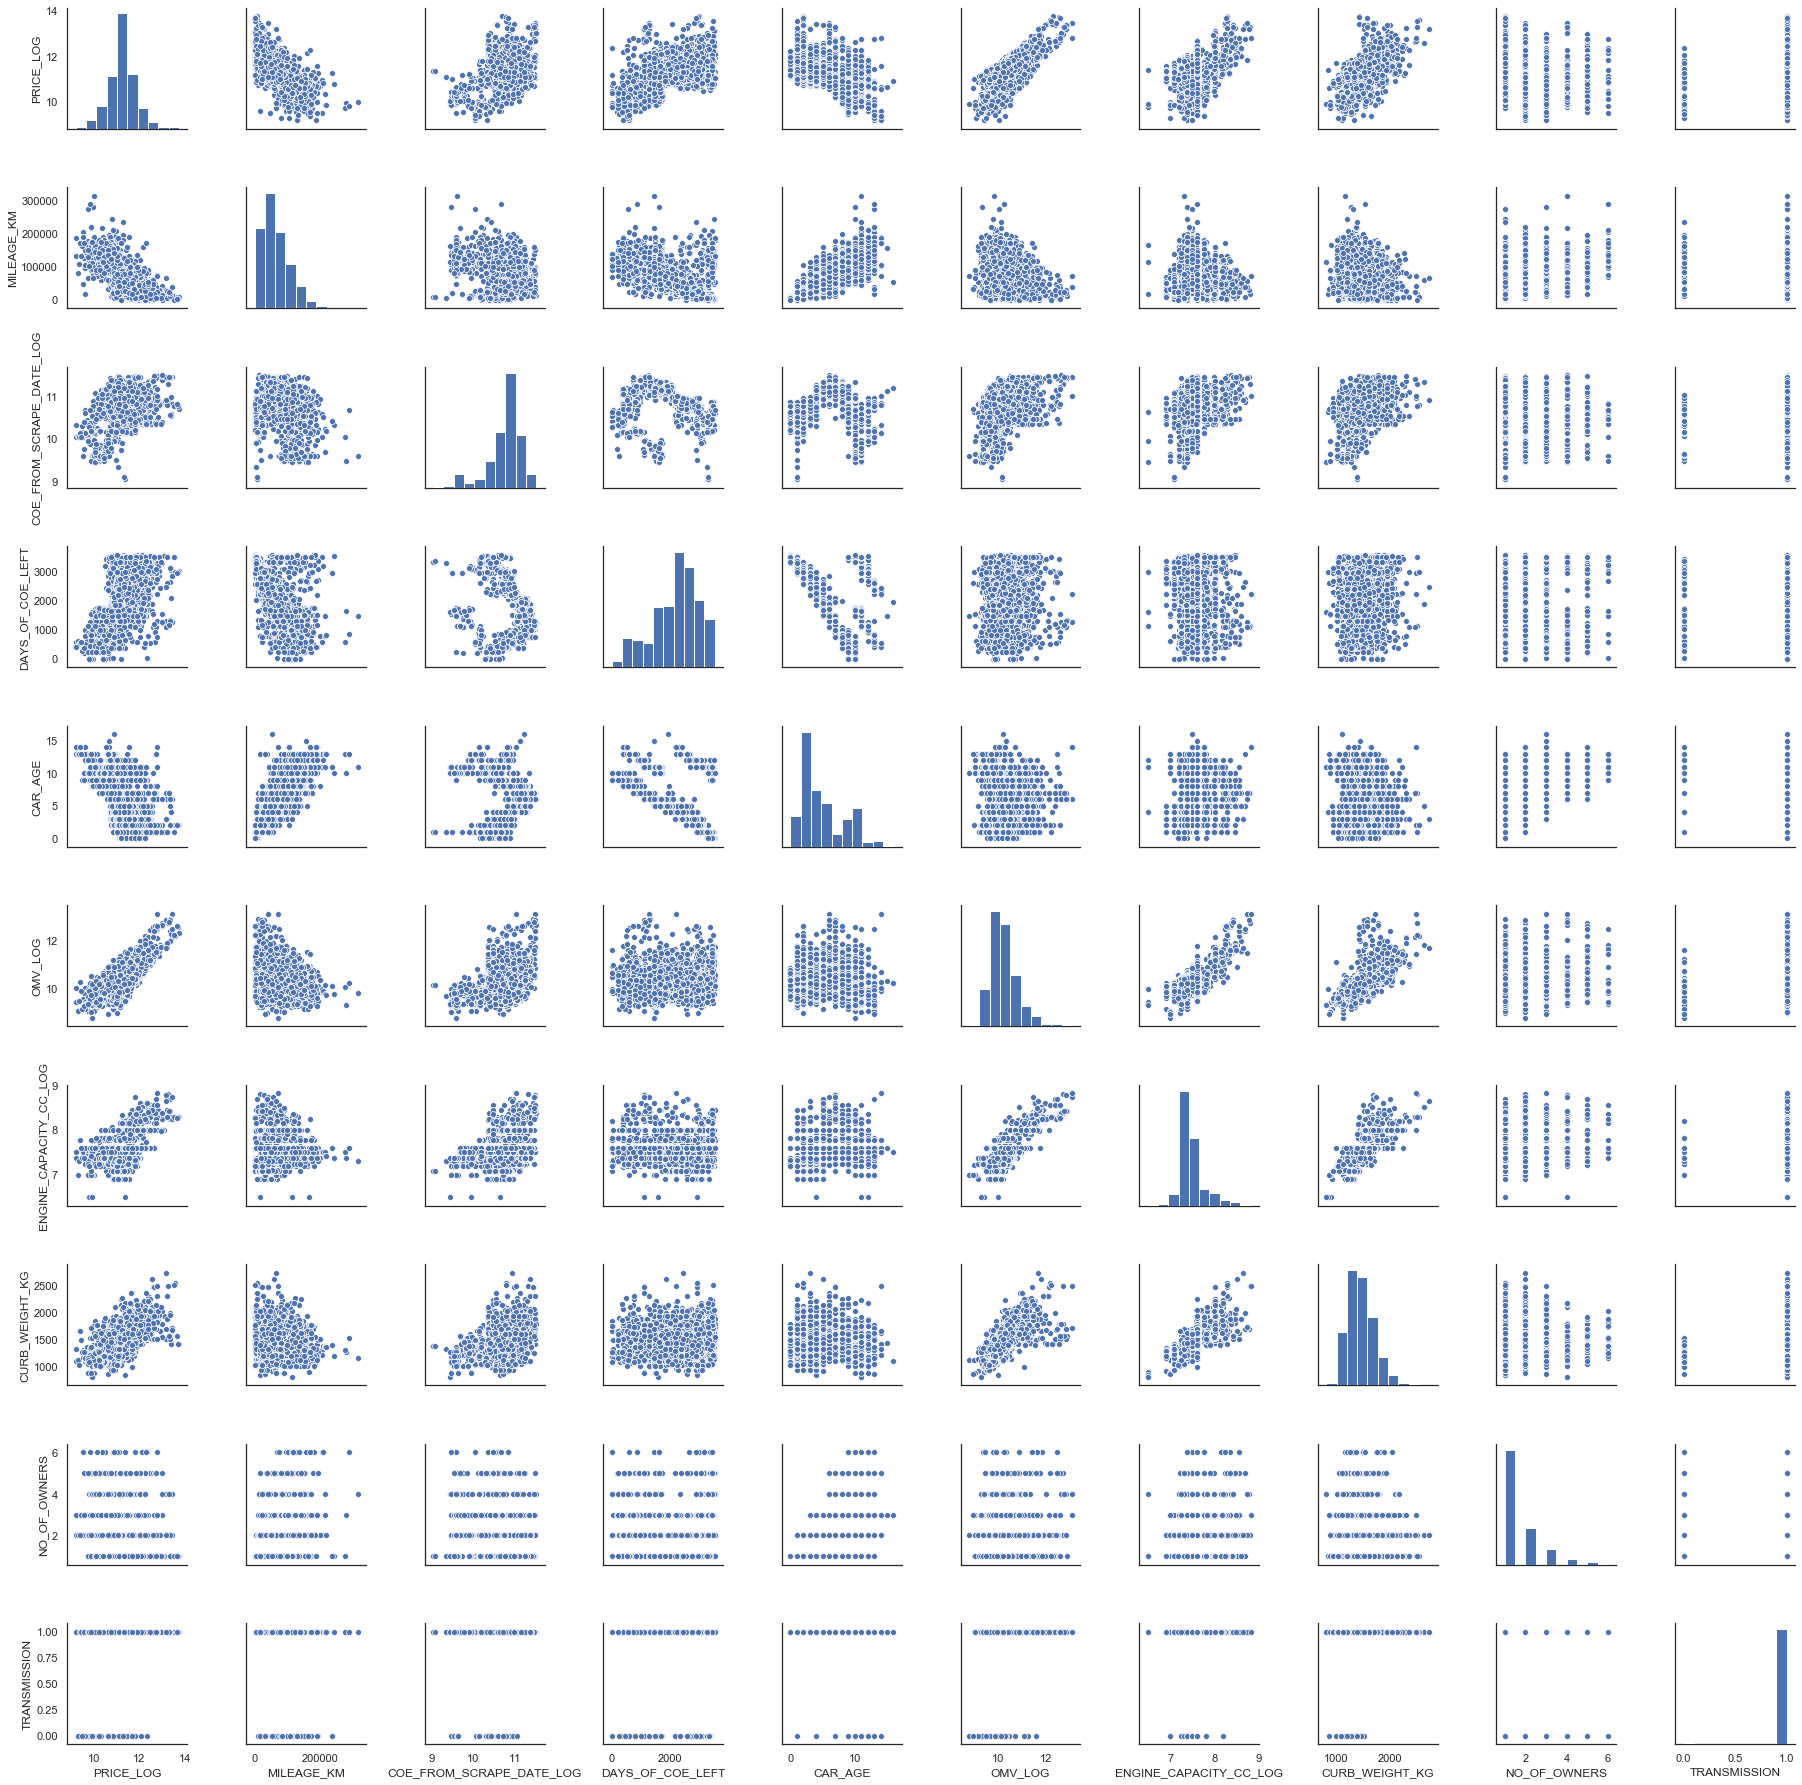

In [280]:
sns.pairplot(df_price_no_brands_logged_price_and_logged_independent_variables_mileage_no_log)

##### Section 3.2.5.2: Histogram Visualization

C:\Users\User\.conda\envs\metis\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D76B284080>,
      dtype=object)

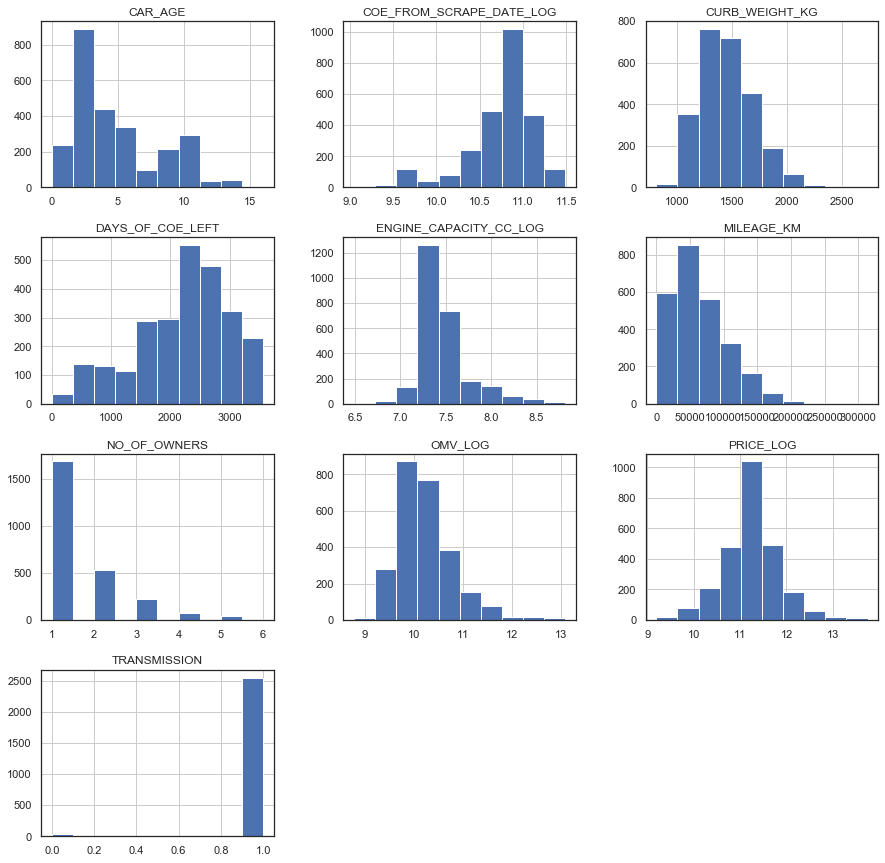

In [281]:
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(df_price_no_brands_logged_price_and_logged_independent_variables_mileage_no_log, ax=ax)

##### Section 3.2.5.3: Model Fitting and Checking R^2 and R^2 Adjusted

In [283]:
# Finding out new R^2 from log transformations of Log Price and Log Independent Variables (except Mileage)

# Slicing Variables
X = df_price_no_brands_logged_price_and_logged_independent_variables_mileage_no_log[['MILEAGE_KM',
       'COE_FROM_SCRAPE_DATE_LOG', 'DAYS_OF_COE_LEFT', 'CAR_AGE',
       'OMV_LOG', 'ENGINE_CAPACITY_CC_LOG', 'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'TRANSMISSION',
       ]]
X = sm.add_constant(X)
y = df_price_no_brands_logged_price_and_logged_independent_variables_mileage_no_log['PRICE_LOG']


# model / fit / summarize
import statsmodels.api as sm

lsm = sm.OLS(y, X)
results = lsm.fit()
results.summary()

# Regardless, curb weight seems continue to be an issue here. 
# Therefore, curbweight has to be rejected. Try dropping curbweight.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PRICE_LOG   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     4479.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:51:38   Log-Likelihood:                 1268.4
No. Observations:                2584   AIC:                            -2517.
Df Residuals:                    2574   BIC:                            -2458.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.4768      0.137     10.790      0.000       1.208       1.745
MILEAGE_KM               -8.753e-07   1.29e-07     -6.796      0.000   -1.13e-06   -6.23e-07
COE_FROM_SCRAPE_DATE_LOG     0.1029      0.009     11.163      0.000       0.085       0.121
DAYS_OF_COE_LEFT             0.0002   4.83e-06     50.004      0.000       0.000       0.000
CAR_AGE                     -0.0633      0.002    -31.225      0.000      -0.067      -0.059
OMV_LOG                      0.6602      0.009     73.601      0.000       0.643       0.678
ENGINE_CAPACITY_CC_LOG       0.2554      0.019     13.611      0.000       0.219       0.292
CURB_WEIGHT_KG            2.145e-05   1.94e-05      1.106      0.269   -1.66e-05    5.95e-05
NO_OF_OWNERS                -0.0173      0.004     -4.097      0.000      -0.026      -0.009
TRANSMISSION                -0.1922      0.025     -7.577      0.000      -0.242      -0.142
==============================================================================
Omnibus:                      111.224   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              344.045
Skew:                          -0.094   Prob(JB):                     1.96e-75
Kurtosis:                       4.778   Cond. No.                     3.63e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Section 3.2.5.4: Model Fitting and Checking R^2 and R^2 Adjusted (Dropping Curb Weight)

In [286]:
# Finding out new R^2 from log transformations of Log Price and Log Independent Variables (except Mileage)

# Slicing Variables
X = df_price_no_brands_logged_price_and_logged_independent_variables_mileage_no_log[['MILEAGE_KM',
       'COE_FROM_SCRAPE_DATE_LOG', 'DAYS_OF_COE_LEFT', 'CAR_AGE',
       'OMV_LOG', 'ENGINE_CAPACITY_CC_LOG', 'NO_OF_OWNERS', 'TRANSMISSION',
       ]]
X = sm.add_constant(X)
y = df_price_no_brands_logged_price_and_logged_independent_variables_mileage_no_log['PRICE_LOG']


# model / fit / summarize
import statsmodels.api as sm

lsm = sm.OLS(y, X)
results = lsm.fit()
results.summary()

# After removing Curb Weight, R^2 Adjusted seems to remain at the same level.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PRICE_LOG   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     5038.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:01:56   Log-Likelihood:                 1267.8
No. Observations:                2584   AIC:                            -2518.
Df Residuals:                    2575   BIC:                            -2465.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.3953      0.115     12.098      0.000       1.169       1.621
MILEAGE_KM                -8.47e-07   1.26e-07     -6.710      0.000   -1.09e-06      -6e-07
COE_FROM_SCRAPE_DATE_LOG     0.1034      0.009     11.221      0.000       0.085       0.121
DAYS_OF_COE_LEFT             0.0002   4.83e-06     50.068      0.000       0.000       0.000
CAR_AGE                     -0.0636      0.002    -31.843      0.000      -0.068      -0.060
OMV_LOG                      0.6637      0.008     79.146      0.000       0.647       0.680
ENGINE_CAPACITY_CC_LOG       0.2649      0.017     15.855      0.000       0.232       0.298
NO_OF_OWNERS                -0.0179      0.004     -4.256      0.000      -0.026      -0.010
TRANSMISSION                -0.1908      0.025     -7.531      0.000      -0.240      -0.141
==============================================================================
Omnibus:                      109.454   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              332.705
Skew:                          -0.099   Prob(JB):                     5.68e-73
Kurtosis:                       4.747   Cond. No.                     3.06e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R^2 Summary from Linear Regression Models
Log Price vs Original Independent Variables:  
R^2: **0.899**  
R^2 Adjusted: **0.898**  
  
Log Price vs Logged Independent Variables:  
R^2: **0.939**  
R^2 Adjusted: **0.939**  

Log Price vs Logged Independent Variables (except Mileage and removed Curb Weight):  
R^2: **0.940**  
R^2 Adjusted: **0.940**  

## Section 3.3: Including Car Brands and Vehicle Type into Analysis

### 3.3.1: Further breaking down dataframe into finalized features

In [297]:
df_finalized_features = df_clean2.copy()

In [310]:
# Applying log to the desired features
df_finalized_features['PRICE'] = df_clean2['PRICE'].apply(np.log)
df_finalized_features['COE_FROM_SCRAPE_DATE'] = df_clean2['COE_FROM_SCRAPE_DATE'].apply(np.log)
df_finalized_features['OMV'] = df_clean2['OMV'].apply(np.log)
df_finalized_features['ENGINE_CAPACITY_CC'] = df_clean2['ENGINE_CAPACITY_CC'].apply(np.log)

# Renaming features
df_finalized_features.rename(columns={'PRICE':'PRICE_LOG',
                                     'COE_FROM_SCRAPE_DATE':'COE_FROM_SCRAPE_DATE_LOG',
                                     "OMV":"OMV_LOG",
                                     'ENGINE_CAPACITY_CC':'ENGINE_CAPACITY_CC_LOG'},inplace=True)

In [315]:
# Rearranging Columns
df_finalized_features = df_finalized_features[['BRAND', 'PRICE_LOG', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE_LOG',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV_LOG', 'ENGINE_CAPACITY_CC_LOG', 'NO_OF_OWNERS','TRANSMISSION', 'Intercept', 'VEHICLE_TYPE[T.Luxury Sedan]',
       'VEHICLE_TYPE[T.MPV]', 'VEHICLE_TYPE[T.Mid-Sized Sedan]',
       'VEHICLE_TYPE[T.SUV]', 'VEHICLE_TYPE[T.Sports Car]',
       'VEHICLE_TYPE[T.Stationwagon]']]

In [316]:
df_finalized_features.columns

Index(['BRAND', 'PRICE_LOG', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE_LOG',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV_LOG', 'ENGINE_CAPACITY_CC_LOG',
       'NO_OF_OWNERS', 'TRANSMISSION', 'Intercept',
       'VEHICLE_TYPE[T.Luxury Sedan]', 'VEHICLE_TYPE[T.MPV]',
       'VEHICLE_TYPE[T.Mid-Sized Sedan]', 'VEHICLE_TYPE[T.SUV]',
       'VEHICLE_TYPE[T.Sports Car]', 'VEHICLE_TYPE[T.Stationwagon]'],
      dtype='object')

### 3.3.2: Joining Brand Dummy Variables into Main Dataframe

In [355]:
# Creating a new DataFrame for this Brand Categorization
df_categorized_car_brands = df_finalized_features.copy()

In [356]:
print(df_categorized_car_brands['BRAND'].value_counts())
print(len(df_categorized_car_brands['BRAND'].value_counts()))

Toyota           405
Mercedes-Benz    374
Honda            309
BMW              286
Mazda            139
Nissan           127
Audi             127
Volkswagen       107
Kia               78
Hyundai           77
Volvo             63
Mitsubishi        58
Subaru            56
Porsche           51
Lexus             49
MINI              40
Suzuki            33
Citroen           22
Jaguar            22
Renault           19
Chevrolet         19
Maserati          18
Land Rover        16
Infiniti          14
Ford              14
Peugeot           13
Ferrari           11
Bentley            6
Lamborghini        6
McLaren            5
Opel               4
Skoda              3
Jeep               3
Rolls-Royce        2
Proton             1
Hummer             1
Ssangyong          1
Lotus              1
Aston Martin       1
Daihatsu           1
Fiat               1
Alfa Romeo         1
Name: BRAND, dtype: int64
42


In [357]:
# Creating the relevant columns
df_categorized_car_brands['EXOTIC'] = 0 # Create EXOTIC column
df_categorized_car_brands["ULTRA_LUXURY"] = 0
df_categorized_car_brands["LUXURY"] = 0
df_categorized_car_brands["MID_LEVEL"] = 0
df_categorized_car_brands["ECONOMY"] = 0

In [358]:
# Labelling Car Brands into Exotic


df_categorized_car_brands.loc[(df_clean2['BRAND'] == "Aston Martin") | 
              (df_clean2['BRAND'] == "Ferrari") |
              (df_clean2['BRAND'] == "Lamborghini") |
              (df_clean2['BRAND'] == "McLaren") |
              (df_clean2['BRAND'] == "Hummer"),
              'EXOTIC'] = 1 

# Labelling Car Brands into Ultra Luxury

df_categorized_car_brands.loc[(df_clean2['BRAND'] == "Bentley") | 
              (df_clean2['BRAND'] == "Land Rover") |
              (df_clean2['BRAND'] == "Maserati") |
              (df_clean2['BRAND'] == "Porsche") |
              (df_clean2['BRAND'] == "Rolls-Royce"), 
              "ULTRA_LUXURY"] = 1 

# Labelling Car Brands into Luxury

df_categorized_car_brands.loc[(df_clean2['BRAND'] == "Audi") | 
              (df_clean2['BRAND'] == "BMW") |
              (df_clean2['BRAND'] == "Jeep") |
              (df_clean2['BRAND'] == "Lexus") |
              (df_clean2['BRAND'] == "Lotus") |
              (df_clean2['BRAND'] == "Mercedes-Benz") |
              (df_clean2['BRAND'] == "Volvo") |
              (df_clean2['BRAND'] == "Peugeot"), 
              "LUXURY"] = 1 


# Labelling Car Brands into Mid-Level

df_categorized_car_brands.loc[(df_clean2['BRAND'] == "Infiniti") |
              (df_clean2['BRAND'] == "MINI") |
              (df_clean2['BRAND'] == "Volkswagen") |
              (df_clean2['BRAND'] == "Renault") |
              (df_clean2['BRAND'] == "Volvo") |
              (df_clean2['BRAND'] == "Peugeot"), 
              "MID_LEVEL"] = 1 

# (df_clean2['BRAND'] == "Opel") & "Alfa Romeo" will be considered as "Others" because it is not a very common brand in Singapore

# Labelling Car Brands into Economy

df_categorized_car_brands.loc[(df_clean2['BRAND'] == "Chevrolet") | 
              (df_clean2['BRAND'] == "Citroen") |
              (df_clean2['BRAND'] == "Ford") |
              (df_clean2['BRAND'] == "Honda") |
              (df_clean2['BRAND'] == "Hyundai") |
              (df_clean2['BRAND'] == "Kia") |
              (df_clean2['BRAND'] == "Mazda") |
              (df_clean2['BRAND'] == "Mitsubishi") |
              (df_clean2['BRAND'] == "Nissan") |
              (df_clean2['BRAND'] == "Suzuki") |
              (df_clean2['BRAND'] == "Toyota"),
              "ECONOMY"] = 1 

# (df_clean2['BRAND'] == "Ssangyong") will be considered as "Others" because it is not a common brand in Singapore


# The rest of the car brands not in these categories will be considered Budget
df_categorized_car_brands["BUDGET"] = 0
df_categorized_car_brands.loc[(df_clean2['BRAND'] == 'Opel') |
              (df_clean2['BRAND'] == 'Ssangyong') |
              (df_clean2['BRAND'] == 'Proton') |
              (df_clean2['BRAND'] == 'Daihatsu') |
              (df_clean2['BRAND'] == 'Fiat') |
              (df_clean2['BRAND'] == 'Alfa Romeo') |
              (df_clean2['BRAND'] == 'Skoda'), 
              'BUDGET'] = 1 

# Changing Uncommon Car brands to "Others"
df_categorized_car_brands.loc[(df_clean2['BRAND'] == 'Opel') |
                  (df_clean2['BRAND'] == 'Ssangyong') |
                  (df_clean2['BRAND'] == 'Proton') |
                  (df_clean2['BRAND'] == 'Daihatsu') |
                  (df_clean2['BRAND'] == 'Fiat') |
                  (df_clean2['BRAND'] == 'Alfa Romeo') |
                  (df_clean2['BRAND'] == 'Skoda') |
                  (df_clean2['BRAND'] == 'Hummer')|
                  (df_clean2['BRAND'] == 'Aston Martin')|
                  (df_clean2['BRAND'] == 'Lotus')|
                  (df_clean2['BRAND'] == 'Ford')|
                  (df_clean2['BRAND'] == 'Jeep'), 
                  'BRAND'] = "Others"


# Group uncommon cars into "Others". There are too many brands to work with.

In [359]:
print(df_categorized_car_brands['BRAND'].value_counts())
print(len(df_categorized_car_brands['BRAND'].value_counts()))

Toyota           405
Mercedes-Benz    374
Honda            309
BMW              286
Mazda            139
Audi             127
Nissan           127
Volkswagen       107
Kia               78
Hyundai           77
Volvo             63
Mitsubishi        58
Subaru            56
Porsche           51
Lexus             49
MINI              40
Suzuki            33
Others            32
Citroen           22
Jaguar            22
Renault           19
Chevrolet         19
Maserati          18
Land Rover        16
Infiniti          14
Peugeot           13
Ferrari           11
Lamborghini        6
Bentley            6
McLaren            5
Rolls-Royce        2
Name: BRAND, dtype: int64
31


##### Brand Dummy Variables Creation

In [360]:
x_brand_dummy = patsy.dmatrix('BRAND', data=df_categorized_car_brands, return_type='dataframe')
x_brand_dummy.head()

Intercept  BRAND[T.BMW]  BRAND[T.Bentley]  BRAND[T.Chevrolet]  \
3        1.0           0.0               0.0                 0.0   
4        1.0           0.0               0.0                 0.0   
5        1.0           0.0               0.0                 0.0   
7        1.0           1.0               0.0                 0.0   
9        1.0           0.0               0.0                 0.0   

   BRAND[T.Citroen]  BRAND[T.Ferrari]  BRAND[T.Honda]  BRAND[T.Hyundai]  \
3               0.0               0.0             0.0               0.0   
4               0.0               0.0             0.0               0.0   
5               0.0               0.0             0.0               0.0   
7               0.0               0.0             0.0               0.0   
9               0.0               0.0             0.0               0.0   

   BRAND[T.Infiniti]  BRAND[T.Jaguar]  ...  BRAND[T.Others]  BRAND[T.Peugeot]  \
3                0.0              0.0  ...              0.0               0.0   
4                0.0              0.0  ...              0.0               0.0   
5                0.0              0.0  ...              0.0               0.0   
7                0.0              0.0  ...              0.0               0.0   
9                0.0              0.0  ...              0.0               0.0   

   BRAND[T.Porsche]  BRAND[T.Renault]  BRAND[T.Rolls-Royce]  BRAND[T.Subaru]  \
3               0.0               0.0                   0.0              0.0   
4               0.0               0.0                   0.0              0.0   
5               0.0               0.0                   0.0              0.0   
7               0.0               0.0                   0.0              0.0   
9               0.0               0.0                   0.0              0.0   

   BRAND[T.Suzuki]  BRAND[T.Toyota]  BRAND[T.Volkswagen]  BRAND[T.Volvo]  
3              0.0              0.0                  0.0             0.0  
4              0.0              1.0                  0.0             0.0  
5              0.0              0.0                  0.0             0.0  
7              0.0              0.0                  0.0             0.0  
9              0.0              0.0                  0.0             0.0  

[5 rows x 31 columns]

In [361]:
df_categorized_car_brands.drop('Intercept',axis=1,inplace=True)# Drop intercept because already have intercept from previous vehicle type
df_categorized_car_brands = df_categorized_car_brands.join(x_brand_dummy)
df_categorized_car_brands

BRAND  PRICE_LOG  MILEAGE_KM  COE_FROM_SCRAPE_DATE_LOG  \
3              Audi  11.167614    140800.0                 11.237027   
4            Toyota  11.094375    117000.0                 10.585650   
5     Mercedes-Benz  10.714418    126000.0                 10.621474   
7               BMW  11.167614     41000.0                 11.274795   
9              Audi  11.401994     57784.0                 11.020316   
...             ...        ...         ...                       ...   
3981  Mercedes-Benz  11.550221     19000.0                 10.891057   
3982         Toyota  11.556942     47638.0                 11.344554   
3983  Mercedes-Benz  11.652687     51500.0                 11.125806   
3984           MINI  11.693579     16000.0                 10.883692   
3985         Nissan  11.312033     53339.0                 10.959558   

      DAYS_OF_COE_LEFT  CAR_AGE    OMV_LOG  ENGINE_CAPACITY_CC_LOG  \
3                761.0      8.0  11.175759                8.004700   
4               3503.0     10.0  10.063265                7.493874   
5                  8.0      9.0  10.935853                7.493317   
7               1610.0      6.0  10.387733                7.376508   
9               2221.0      4.0  10.306048                7.240650   
...                ...      ...        ...                     ...   
3981            2434.0      3.0  10.235880                7.374629   
3982            1679.0      5.0  10.735897                8.147867   
3983            1950.0      7.0  10.859979                7.493317   
3984            2769.0      2.0  10.421388                7.599902   
3985            2462.0      4.0  10.189756                7.819234   

      NO_OF_OWNERS  TRANSMISSION  ...  BRAND[T.Others]  BRAND[T.Peugeot]  \
3              3.0             1  ...              0.0               0.0   
4              2.0             1  ...              0.0               0.0   
5              4.0             1  ...              0.0               0.0   
7              2.0             1  ...              0.0               0.0   
9              2.0             1  ...              0.0               0.0   
...            ...           ...  ...              ...               ...   
3981           1.0             1  ...              0.0               0.0   
3982           2.0             1  ...              0.0               0.0   
3983           2.0             1  ...              0.0               0.0   
3984           1.0             1  ...              0.0               0.0   
3985           1.0             1  ...              0.0               0.0   

      BRAND[T.Porsche]  BRAND[T.Renault]  BRAND[T.Rolls-Royce]  \
3                  0.0               0.0                   0.0   
4                  0.0               0.0                   0.0   
5                  0.0               0.0                   0.0   
7                  0.0               0.0                   0.0   
9                  0.0               0.0                   0.0   
...                ...               ...                   ...   
3981               0.0               0.0                   0.0   
3982               0.0               0.0                   0.0   
3983               0.0               0.0                   0.0   
3984               0.0               0.0                   0.0   
3985               0.0               0.0                   0.0   

      BRAND[T.Subaru]  BRAND[T.Suzuki]  BRAND[T.Toyota]  BRAND[T.Volkswagen]  \
3                 0.0              0.0              0.0                  0.0   
4                 0.0              0.0              1.0                  0.0   
5                 0.0              0.0              0.0                  0.0   
7                 0.0              0.0              0.0                  0.0   
9                 0.0              0.0              0.0                  0.0   
...               ...              ...              ...                  ...   
3981              0.0              0.0    

### 3.3.4: Analyzing Model R^2 Adjusted with just Vehicle Types

In [366]:
# Finding out new R^2 from log transformations of Log Price and Log Independent Variables (except Mileage)

# Slicing Variables
X = df_categorized_car_brands[['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE_LOG',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV_LOG', 'ENGINE_CAPACITY_CC_LOG',
       'NO_OF_OWNERS', 'TRANSMISSION', 'VEHICLE_TYPE[T.Luxury Sedan]',
       'VEHICLE_TYPE[T.MPV]', 'VEHICLE_TYPE[T.Mid-Sized Sedan]',
       'VEHICLE_TYPE[T.SUV]', 'VEHICLE_TYPE[T.Sports Car]']]
X = sm.add_constant(X)
y = df_categorized_car_brands['PRICE_LOG']


# model / fit / summarize
import statsmodels.api as sm

lsm = sm.OLS(y, X)
results = lsm.fit()
results.summary()

# After removing Curb Weight, R^2 Adjusted seems to remain at the same level.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PRICE_LOG   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     3163.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:44:36   Log-Likelihood:                 1294.3
No. Observations:                2584   AIC:                            -2561.
Df Residuals:                    2570   BIC:                            -2479.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               1.3819      0.129     10.754      0.000       1.130       1.634
MILEAGE_KM                      -6.525e-07   1.29e-07     -5.059      0.000   -9.05e-07      -4e-07
COE_FROM_SCRAPE_DATE_LOG            0.1078      0.009     11.535      0.000       0.090       0.126
DAYS_OF_COE_LEFT                    0.0002   4.85e-06     50.005      0.000       0.000       0.000
CAR_AGE                            -0.0648      0.002    -32.197      0.000      -0.069      -0.061
OMV_LOG                             0.6675      0.010     67.720      0.000       0.648       0.687
ENGINE_CAPACITY_CC_LOG              0.2508      0.018     14.316      0.000       0.216       0.285
NO_OF_OWNERS                       -0.0218      0.004     -5.184      0.000      -0.030      -0.014
TRANSMISSION                       -0.1692      0.025     -6.646      0.000      -0.219      -0.119
VEHICLE_TYPE[T.Luxury Sedan]       -0.0197      0.011     -1.861      0.063      -0.040       0.001
VEHICLE_TYPE[T.MPV]                -0.0087      0.012     -0.719      0.472      -0.032       0.015
VEHICLE_TYPE[T.Mid-Sized Sedan]     0.0227      0.010      2.222      0.026       0.003       0.043
VEHICLE_TYPE[T.SUV]                 0.0120      0.010      1.207      0.228      -0.007       0.031
VEHICLE_TYPE[T.Sports Car]          0.0576      0.014      4.078      0.000       0.030       0.085
==============================================================================
Omnibus:                      116.333   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              355.779
Skew:                          -0.131   Prob(JB):                     5.54e-78
Kurtosis:                       4.799   Cond. No.                     3.44e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R^2 Summary from Linear Regression Models
Log Price vs Original Independent Variables:  
R^2: **0.899**  
R^2 Adjusted: **0.898**  
  
Log Price vs Logged Independent Variables:  
R^2: **0.939**  
R^2 Adjusted: **0.939**  

Log Price vs Logged Independent Variables (except Mileage and removed Curb Weight):  
R^2: **0.940**  
R^2 Adjusted: **0.940**  

Log Price vs Logged Independent Variables (except Mileage and removed Curb Weight) with ONLY Vehicle Types:  
R^2: **0.941**  
R^2 Adjusted: **0.941**  

### 3.3.5: Analyzing Model R^2 Adjusted with just Brand

In [368]:
# Finding out new R^2 from log transformations of Log Price and Log Independent Variables (except Mileage)

# Slicing Variables
X = df_categorized_car_brands[['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE_LOG',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV_LOG', 'ENGINE_CAPACITY_CC_LOG',
       'NO_OF_OWNERS', 'TRANSMISSION', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET', 'Intercept', 'BRAND[T.BMW]',
       'BRAND[T.Bentley]', 'BRAND[T.Chevrolet]', 'BRAND[T.Citroen]',
       'BRAND[T.Ferrari]', 'BRAND[T.Honda]', 'BRAND[T.Hyundai]',
       'BRAND[T.Infiniti]', 'BRAND[T.Jaguar]', 'BRAND[T.Kia]',
       'BRAND[T.Lamborghini]', 'BRAND[T.Land Rover]', 'BRAND[T.Lexus]',
       'BRAND[T.MINI]', 'BRAND[T.Maserati]', 'BRAND[T.Mazda]',
       'BRAND[T.McLaren]', 'BRAND[T.Mercedes-Benz]', 'BRAND[T.Mitsubishi]',
       'BRAND[T.Nissan]', 'BRAND[T.Others]', 'BRAND[T.Peugeot]',
       'BRAND[T.Porsche]', 'BRAND[T.Renault]', 'BRAND[T.Rolls-Royce]',
       'BRAND[T.Subaru]', 'BRAND[T.Suzuki]', 'BRAND[T.Toyota]',
       'BRAND[T.Volkswagen]', 'BRAND[T.Volvo]']]
X = sm.add_constant(X)
y = df_categorized_car_brands['PRICE_LOG']


# model / fit / summarize
import statsmodels.api as sm

lsm = sm.OLS(y, X)
results = lsm.fit()
results.summary()

# After removing Curb Weight, R^2 Adjusted seems to remain at the same level.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PRICE_LOG   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1144.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:46:31   Log-Likelihood:                 1468.7
No. Observations:                2584   AIC:                            -2853.
Df Residuals:                    2542   BIC:                            -2607.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
MILEAGE_KM               -6.783e-07   1.21e-07     -5.584      0.000   -9.16e-07    -4.4e-07
COE_FROM_SCRAPE_DATE_LOG     0.1137      0.009     12.926      0.000       0.096       0.131
DAYS_OF_COE_LEFT             0.0002   4.61e-06     52.868      0.000       0.000       0.000
CAR_AGE                     -0.0650      0.002    -34.183      0.000      -0.069      -0.061
OMV_LOG                      0.6009      0.014     43.333      0.000       0.574       0.628
ENGINE_CAPACITY_CC_LOG       0.2461      0.021     11.935      0.000       0.206       0.287
NO_OF_OWNERS                -0.0200      0.004     -4.996      0.000      -0.028      -0.012
TRANSMISSION                -0.1779      0.024     -7.383      0.000      -0.225      -0.131
EXOTIC                       0.5397      0.102      5.296      0.000       0.340       0.740
ULTRA_LUXURY                 0.3170      0.035      9.107      0.000       0.249       0.385
LUXURY                       0.1674      0.029      5.781      0.000       0.111       0.224
MID_LEVEL                    0.0498      0.020      2.497      0.013       0.011       0.089
ECONOMY                      0.0921      0.061      1.519      0.129      -0.027       0.211
BUDGET                       0.0350      0.062      0.565      0.572      -0.087       0.157
Intercept                    1.8700      0.116     16.079      0.000       1.642       2.098
BRAND[T.BMW]                 0.0228      0.015      1.523      0.128      -0.007       0.052
BRAND[T.Bentley]             0.2626      0.051      5.142      0.000       0.162       0.363
BRAND[T.Chevrolet]           0.0475      0.087      0.549      0.583      -0.122       0.217
BRAND[T.Citroen]            -0.0907      0.085     -1.066      0.286      -0.258       0.076
BRAND[T.Ferrari]             0.0149      0.129      0.115      0.908      -0.238       0.268
BRAND[T.Honda]               0.0337      0.081      0.419      0.676      -0.124       0.192
BRAND[T.Hyundai]             0.1169      0.082      1.419      0.156      -0.045       0.278
BRAND[T.Infiniti]            0.0742      0.034      2.152      0.031       0.007       0.142
BRAND[T.Jaguar]              0.1295      0.040      3.230      0.001       0.051       0.208
BRAND[T.Kia]                 0.0718      0.082      0.874      0.382      -0.089       0.233
BRAND[T.Lamborghini]        -0.0343      0.134     -0.256      0.798      -0.298       0.229
BRAND[T.Land Rover]         -0.0895      0.036     -2.506      0.012      -0.159      -0.019
BRAND[T.Lexus]               0.0314      0.024      1.317      0.188      -0.015       0.078
BRAND[T.MINI]                0.1665      0.024      6.906      0.000       0.119       0.214
BRAND[T.Maserati]           -0.0831      0.035     -2.396      0.017      -0.151      -0.015
BRAND[T.Mazda]

### R^2 Summary from Linear Regression Models
Log Price vs Original Independent Variables:  
R^2: **0.899**  
R^2 Adjusted: **0.898**  
  
Log Price vs Logged Independent Variables:  
R^2: **0.939**  
R^2 Adjusted: **0.939**  

Log Price vs Logged Independent Variables (except Mileage and removed Curb Weight):  
R^2: **0.940**  
R^2 Adjusted: **0.940**  

Log Price vs Logged Independent Variables (except Mileage and removed Curb Weight) with ONLY Vehicle Types:  
R^2: **0.941**  
R^2 Adjusted: **0.941**  
  
Log Price vs Logged Independent Variables (except Mileage and removed Curb Weight) with ONLY Brand:  
R^2: **0.941**  
R^2 Adjusted: **0.941**  

In [367]:
df_categorized_car_brands.columns

Index(['BRAND', 'PRICE_LOG', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE_LOG',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV_LOG', 'ENGINE_CAPACITY_CC_LOG',
       'NO_OF_OWNERS', 'TRANSMISSION', 'VEHICLE_TYPE[T.Luxury Sedan]',
       'VEHICLE_TYPE[T.MPV]', 'VEHICLE_TYPE[T.Mid-Sized Sedan]',
       'VEHICLE_TYPE[T.SUV]', 'VEHICLE_TYPE[T.Sports Car]',
       'VEHICLE_TYPE[T.Stationwagon]', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET', 'Intercept', 'BRAND[T.BMW]',
       'BRAND[T.Bentley]', 'BRAND[T.Chevrolet]', 'BRAND[T.Citroen]',
       'BRAND[T.Ferrari]', 'BRAND[T.Honda]', 'BRAND[T.Hyundai]',
       'BRAND[T.Infiniti]', 'BRAND[T.Jaguar]', 'BRAND[T.Kia]',
       'BRAND[T.Lamborghini]', 'BRAND[T.Land Rover]', 'BRAND[T.Lexus]',
       'BRAND[T.MINI]', 'BRAND[T.Maserati]', 'BRAND[T.Mazda]',
       'BRAND[T.McLaren]', 'BRAND[T.Mercedes-Benz]', 'BRAND[T.Mitsubishi]',
       'BRAND[T.Nissan]', 'BRAND[T.Others]', 'BRAND[T.Peugeot]',
       'BRAND[T.Porsche]', 'BRAND[T.Rena

### 3.3.6: Analyzing Model R^2 Adjusted with both Brand and Vehicle Types

In [369]:
# Finding out new R^2 from log transformations of Log Price and Log Independent Variables (except Mileage)

# Slicing Variables
X = df_categorized_car_brands[['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE_LOG',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV_LOG', 'ENGINE_CAPACITY_CC_LOG',
       'NO_OF_OWNERS', 'TRANSMISSION', 'VEHICLE_TYPE[T.Luxury Sedan]',
       'VEHICLE_TYPE[T.MPV]', 'VEHICLE_TYPE[T.Mid-Sized Sedan]',
       'VEHICLE_TYPE[T.SUV]', 'VEHICLE_TYPE[T.Sports Car]',
       'VEHICLE_TYPE[T.Stationwagon]', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET', 'Intercept', 'BRAND[T.BMW]',
       'BRAND[T.Bentley]', 'BRAND[T.Chevrolet]', 'BRAND[T.Citroen]',
       'BRAND[T.Ferrari]', 'BRAND[T.Honda]', 'BRAND[T.Hyundai]',
       'BRAND[T.Infiniti]', 'BRAND[T.Jaguar]', 'BRAND[T.Kia]',
       'BRAND[T.Lamborghini]', 'BRAND[T.Land Rover]', 'BRAND[T.Lexus]',
       'BRAND[T.MINI]', 'BRAND[T.Maserati]', 'BRAND[T.Mazda]',
       'BRAND[T.McLaren]', 'BRAND[T.Mercedes-Benz]', 'BRAND[T.Mitsubishi]',
       'BRAND[T.Nissan]', 'BRAND[T.Others]', 'BRAND[T.Peugeot]',
       'BRAND[T.Porsche]', 'BRAND[T.Renault]', 'BRAND[T.Rolls-Royce]',
       'BRAND[T.Subaru]', 'BRAND[T.Suzuki]', 'BRAND[T.Toyota]',
       'BRAND[T.Volkswagen]', 'BRAND[T.Volvo]']]
X = sm.add_constant(X)
y = df_categorized_car_brands['PRICE_LOG']


# model / fit / summarize
import statsmodels.api as sm

lsm = sm.OLS(y, X)
results = lsm.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PRICE_LOG   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     1018.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:47:42   Log-Likelihood:                 1496.3
No. Observations:                2584   AIC:                            -2897.
Df Residuals:                    2536   BIC:                            -2615.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
MILEAGE_KM                      -6.115e-07   1.23e-07     -4.991      0.000   -8.52e-07   -3.71e-07
COE_FROM_SCRAPE_DATE_LOG            0.1123      0.009     12.657      0.000       0.095       0.130
DAYS_OF_COE_LEFT                    0.0002   4.62e-06     52.365      0.000       0.000       0.000
CAR_AGE                            -0.0656      0.002    -34.267      0.000      -0.069      -0.062
OMV_LOG                             0.5829      0.015     39.312      0.000       0.554       0.612
ENGINE_CAPACITY_CC_LOG              0.2393      0.021     11.654      0.000       0.199       0.280
NO_OF_OWNERS                       -0.0226      0.004     -5.639      0.000      -0.030      -0.015
TRANSMISSION                       -0.1683      0.024     -6.952      0.000      -0.216      -0.121
VEHICLE_TYPE[T.Luxury Sedan]       -0.0003      0.011     -0.024      0.981      -0.022       0.021
VEHICLE_TYPE[T.MPV]                 0.0526      0.013      4.008      0.000       0.027       0.078
VEHICLE_TYPE[T.Mid-Sized Sedan]     0.0350      0.011      3.246      0.001       0.014       0.056
VEHICLE_TYPE[T.SUV]                 0.0370      0.011      3.487      0.000       0.016       0.058
VEHICLE_TYPE[T.Sports Car]          0.0738      0.014      5.247      0.000       0.046       0.101
VEHICLE_TYPE[T.Stationwagon]        0.0252      0.022      1.162      0.245      -0.017       0.068
EXOTIC                              0.5719      0.101      5.642      0.000       0.373       0.771
ULTRA_LUXURY                        0.3452      0.036      9.538      0.000       0.274       0.416
LUXURY                              0.1994      0.030      6.717      0.000       0.141       0.258
MID_LEVEL                           0.0485      0.020      2.397      0.017       0.009       0.088
ECONOMY                             0.1106      0.061      1.825      0.068      -0.008       0.229
BUDGET                              0.0616      0.062      0.996      0.319      -0.060       0.183
Intercept                           2.0772      0.131     15.856      0.000       1.820       2.334
BRAND[T.BMW]                        0.0187      0.015      1.259      0.208      -0.010       0.048
BRAND[T.Bentley]                    0.2551      0.051      5.026      0.000       0.156       0.355
BRAND[T.Chevrolet]                  0.0197      0.086      0.229      0.819      -0.149       0.189
BRAND[T.Citroen]                   -0.1197      0.085     -1.411      0.158      -0.286       0.047
BRAND[T.Ferrari]                    0.0092      0.128      0.072      0.943      -0.242       0.261
BRAND[T.Honda]                      0.0196      0.080      0.245      0.807      -0.138       0.177
BRAND[T.Hyundai]                    0.0932      0.082      1.136      0.256      -0

### R^2 Summary from Linear Regression Models
Log Price vs Original Independent Variables:  
R^2: **0.899**  
R^2 Adjusted: **0.898**  
  
Log Price vs Logged Independent Variables:  
R^2: **0.939**  
R^2 Adjusted: **0.939**  

Log Price vs Logged Independent Variables (except Mileage and removed Curb Weight):  
R^2: **0.940**  
R^2 Adjusted: **0.940**  

Log Price vs Logged Independent Variables (except Mileage and removed Curb Weight) with ONLY Vehicle Types:  
R^2: **0.941**  
R^2 Adjusted: **0.941**  
  
Log Price vs Logged Independent Variables (except Mileage and removed Curb Weight) with ONLY Brand:  
R^2: **0.941**  
R^2 Adjusted: **0.941**   
  
Log Price vs Logged Independent Variables (except Mileage and removed Curb Weight) with BOTH Vehicle Type AND Brand:  
R^2: **0.941**  
R^2 Adjusted: **0.941**  

In [370]:
# Saving DataFrame
import pickle

# Saving DataFrame using Pickle
with open('dataframe_with_logged_features_and_dummy_vehicletype_and_brands.pickle', 'wb') as to_write:
    pickle.dump(df_categorized_car_brands, to_write)

# Or you can do it with this code too
# cars2.to_pickle('data/cars_dataframe.pkl')    
    
# Loading DataFrame using Pickle
# with open('dataframe_with_logged_features_and_dummy_vehicletype_and_brands.pickle','rb') as read_file:
#     new_df = pickle.load(read_file)
    
# new_df.head(5)

## Doing the Scatter Plot timer

In [ ]:
# sns.scatterplot(x = 'Depreciation', y = 'Days to Sell', s = 15, edgecolor=None,
#                      data=exotic)
# plt.xlim(0,80000)
# plt.ylim(0,80)
# plt.title('Exotic')

# sns.scatterplot(x = 'Depreciation', y = 'Days to Sell', s = 15, edgecolor=None,
#                      data=ultra_luxury)
# plt.title('Exotic + Ultra Luxury')

# sns.scatterplot(x = 'Depreciation', y = 'Days to Sell', s = 15, edgecolor=None,
#                      data=luxury)
# plt.title('(Exotic, Ultra Luxury) + Luxury')

# sns.scatterplot(x = 'Depreciation', y = 'Days to Sell', s = 15, edgecolor=None,
#                      data=mid_level)
# plt.title('(Exotic, Ultra Luxury, Luxury) + Mid Level')

# sns.scatterplot(x = 'Depreciation', y = 'Days to Sell", s = 15, edgecolor=None,
#                      data=economy)
# plt.title('(Exotic, Ultra Luxury, Luxury, Mid Level) + Economy')

# # colour of marker changed to white, default colour assigned is too difficult to spot on the plot.
# sns.scatterplot(x = 'Depreciation', y = 'Days to Sell', s = 15, color = 'white', edgecolor=None,
#                      data=budget)
# plt.title('(Exotic, Ultra Luxury, Luxury, Mid Level, Economy) + Budget')

# Section 4: Model Selection 
* Cross Validation
* Regularization - Elastic Net

## Section 4.1: Data Split

### Section 4.1.1: Train 80 / Test 20 Split

In [385]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [405]:
from sklearn.model_selection import train_test_split


X = df_categorized_car_brands[['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE_LOG',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV_LOG', 'ENGINE_CAPACITY_CC_LOG',
       'NO_OF_OWNERS', 'TRANSMISSION', 'VEHICLE_TYPE[T.Luxury Sedan]',
       'VEHICLE_TYPE[T.MPV]', 'VEHICLE_TYPE[T.Mid-Sized Sedan]',
       'VEHICLE_TYPE[T.SUV]', 'VEHICLE_TYPE[T.Sports Car]',
       'VEHICLE_TYPE[T.Stationwagon]', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET', 'Intercept', 'BRAND[T.BMW]',
       'BRAND[T.Bentley]', 'BRAND[T.Chevrolet]', 'BRAND[T.Citroen]',
       'BRAND[T.Ferrari]', 'BRAND[T.Honda]', 'BRAND[T.Hyundai]',
       'BRAND[T.Infiniti]', 'BRAND[T.Jaguar]', 'BRAND[T.Kia]',
       'BRAND[T.Lamborghini]', 'BRAND[T.Land Rover]', 'BRAND[T.Lexus]',
       'BRAND[T.MINI]', 'BRAND[T.Maserati]', 'BRAND[T.Mazda]',
       'BRAND[T.McLaren]', 'BRAND[T.Mercedes-Benz]', 'BRAND[T.Mitsubishi]',
       'BRAND[T.Nissan]', 'BRAND[T.Others]', 'BRAND[T.Peugeot]',
       'BRAND[T.Porsche]', 'BRAND[T.Renault]', 'BRAND[T.Rolls-Royce]',
       'BRAND[T.Subaru]', 'BRAND[T.Suzuki]', 'BRAND[T.Toyota]',
       'BRAND[T.Volkswagen]', 'BRAND[T.Volvo]']]
y = df_categorized_car_brands['PRICE_LOG']

# hold out 20% of the data for final testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)


#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

### (tbh screw this method because you already have LassoCV/RidgeCV) Section 4.1.2: Train 60 / Validation Split

In [384]:
# # #this helps with the way kf will generate indices below
# X_train_val = np.array(X_train_val)
# y = np.array(y_train_val)

# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25,random_state=3)


# # Mean Absolute Error (MAE) for validation
# def mae(y_true, y_pred):
#     return np.mean(np.abs(y_pred - y_true)) 

## Section 4.2 (Optional): Manual Cross-Validation

In [ ]:
# #run the CV

# kf = KFold(n_splits=5, shuffle=True, random_state = 71) 
# cv_lm_r2s, cv_lm_reg_r2s = [], [] #to collect the validation results for both models

# for train_ind, val_ind in kf.split(X,y): # len(kf.split(X.y)) should be 5 since you set n_split=5
#     # looping through each subset of kfold and running the whole training code
    
#     X_train, y_train = X[train_ind], y[train_ind]
#     X_val, y_val = X[val_ind], y[val_ind] 
    
#     #simple linear regression
#     lm = LinearRegression()
#     lm_reg = Ridge(alpha=1)

#     lm.fit(X_train, y_train)
#     cv_lm_r2s.append(lm.score(X_val, y_val))
    
#     #ridge with feature scaling
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_val_scaled = scaler.transform(X_val)
    
#     lm_reg.fit(X_train_scaled, y_train)
#     cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

# print('Simple regression scores: ', cv_lm_r2s)  # The whole list of simple Linear Regression score
# print('Ridge scores: ', cv_lm_reg_r2s, '\n')  # The whole list of Ridge Linear Regression score

# print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
# print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

## Section 4.2: Cross-Validation Using Models other than LR

### Section 4.2.1 : Using LassoCV to find best Alpha Value for L1 Regularization

In [483]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [484]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold  #Kfold will allow you to do cross validation

X = df_categorized_car_brands[['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE_LOG',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV_LOG', 'ENGINE_CAPACITY_CC_LOG',
       'NO_OF_OWNERS', 'TRANSMISSION', 'VEHICLE_TYPE[T.Luxury Sedan]',
       'VEHICLE_TYPE[T.MPV]', 'VEHICLE_TYPE[T.Mid-Sized Sedan]',
       'VEHICLE_TYPE[T.SUV]', 'VEHICLE_TYPE[T.Sports Car]',
       'VEHICLE_TYPE[T.Stationwagon]', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET', 'Intercept', 'BRAND[T.BMW]',
       'BRAND[T.Bentley]', 'BRAND[T.Chevrolet]', 'BRAND[T.Citroen]',
       'BRAND[T.Ferrari]', 'BRAND[T.Honda]', 'BRAND[T.Hyundai]',
       'BRAND[T.Infiniti]', 'BRAND[T.Jaguar]', 'BRAND[T.Kia]',
       'BRAND[T.Lamborghini]', 'BRAND[T.Land Rover]', 'BRAND[T.Lexus]',
       'BRAND[T.MINI]', 'BRAND[T.Maserati]', 'BRAND[T.Mazda]',
       'BRAND[T.McLaren]', 'BRAND[T.Mercedes-Benz]', 'BRAND[T.Mitsubishi]',
       'BRAND[T.Nissan]', 'BRAND[T.Others]', 'BRAND[T.Peugeot]',
       'BRAND[T.Porsche]', 'BRAND[T.Renault]', 'BRAND[T.Rolls-Royce]',
       'BRAND[T.Subaru]', 'BRAND[T.Suzuki]', 'BRAND[T.Toyota]',
       'BRAND[T.Volkswagen]', 'BRAND[T.Volvo]']]
y = df_categorized_car_brands['PRICE_LOG']

# hold out 20% of the data for final testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state=10)

In [485]:
## Scale the data (a MUST if you're doing regularization)
std = StandardScaler()
std.fit(X_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [486]:
## Scale the Predictors on both the train/validation (the whole 80%) and test set (the whole 20%)
X_train_scaled = std.transform(X_train.values)
X_val_scaled = std.transform(X_val.values)

# LassoCV does 2 things for you. It trains your model, and it also chooses the best lambda/alpha for you.  
# But of course, you have to feed it a list of lambdas to try.

In [487]:
# The best part about LambdaCV is that it does all 3 for you:
# Fit
# Finding best lambda
# Doing Cross-Validation

from sklearn.model_selection import KFold   #Kfold will allow you to do cross validation

# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-3,3,200) # Defining a vector of lambdas (alpha) to try from
kf = KFold(n_splits=5, shuffle=True, random_state = 1000)  # Creating a partitioned randomized-state data

lasso_model = LassoCV(alphas = alphavec, cv=kf)  # If you want to use Ridge, use RidgeCV
lasso_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([1.00000000e-03, 1.07189132e-03, 1.14895100e-03, 1.23155060e-03,
       1.32008840e-03, 1.41499130e-03, 1.51671689e-03, 1.62575567e-03,
       1.74263339e-03, 1.86791360e-03, 2.00220037e-03, 2.14614120e-03,
       2.30043012e-03, 2.46581108e-03, 2.64308149e-03, 2.83309610e-03,
       3.03677112e-03, 3.25508860e-03, 3.48910121e-03, 3.73993730e-03,
       4.00880633e-03, 4.29700470e-0...
       6.15098579e+02, 6.59318827e+02, 7.06718127e+02, 7.57525026e+02,
       8.11984499e+02, 8.70359136e+02, 9.32930403e+02, 1.00000000e+03]),
        copy_X=True, cv=KFold(n_splits=5, random_state=1000, shuffle=True),
        eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [488]:
# This is the best alpha value it found - not far from the value
# selected using simple validation
lasso_model.alpha_

0.001

In [489]:
# These are the (standardized) coefficients found when it refit using that best alpha
list(zip(X_train.columns, lasso_model.coef_))

[('MILEAGE_KM', -0.032011450340970256),
 ('COE_FROM_SCRAPE_DATE_LOG', 0.04575095023532634),
 ('DAYS_OF_COE_LEFT', 0.19161798325521512),
 ('CAR_AGE', -0.20741495142435332),
 ('OMV_LOG', 0.33620060503558286),
 ('ENGINE_CAPACITY_CC_LOG', 0.06907973980631524),
 ('NO_OF_OWNERS', -0.016924108861513028),
 ('TRANSMISSION', -0.025721536035674238),
 ('VEHICLE_TYPE[T.Luxury Sedan]', -0.004327891961768283),
 ('VEHICLE_TYPE[T.MPV]', 0.00942465535739407),
 ('VEHICLE_TYPE[T.Mid-Sized Sedan]', 0.00695690161471531),
 ('VEHICLE_TYPE[T.SUV]', 0.011442515844618813),
 ('VEHICLE_TYPE[T.Sports Car]', 0.018045416368581372),
 ('VEHICLE_TYPE[T.Stationwagon]', 0.0004827361227385847),
 ('EXOTIC', 0.03050999913247309),
 ('ULTRA_LUXURY', 0.011426089492177327),
 ('LUXURY', 0.0),
 ('MID_LEVEL', -0.006425290628674362),
 ('ECONOMY', -0.015196112794216421),
 ('BUDGET', -0.005002407381890161),
 ('Intercept', 0.0),
 ('BRAND[T.BMW]', 0.004250074159219999),
 ('BRAND[T.Bentley]', 0.0150400784078062),
 ('BRAND[T.Chevrolet]', 

In [490]:
# Make predictions on the test set using the new model 
# (the model is already using the best alpha. It is a LassoCV initialization)
val_set_pred = lasso_model.predict(X_val_scaled)

In [491]:
# Find the MAE and R^2 on the test set using this model
print(f"Best Lambda (alpha) LassoCV: {lasso_model.alpha_}")
print(f"LassoCV MAE: {mae(y_val, val_set_pred)}")
print(f"LassoCV R^2 Score: {r2_score(y_val, val_set_pred)}")

Best Lambda (alpha) LassoCV: 0.001
LassoCV MAE: 0.0930728082873645
LassoCV R^2 Score: 0.9546411724617769


### Section 4.2.1.1 (Optional for now): Using LARS Path to Study Feature Importance

In [424]:
# from sklearn.linear_model import lars_path
# ## Scale the variables
# std = StandardScaler()
# std.fit(X_train_val.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [425]:
# X_train_val_scaled = std.transform(X_train_val.values)

In [427]:
# ## Note: lars_path takes numpy matrices, not pandas dataframes
# from sklearn.linear_model import lars_path

# print("Computing regularization path using the LARS ...")
# alphas, _, coefs = lars_path(X_train_val_scaled, y_train_val.values, method='lasso')

Computing regularization path using the LARS ...


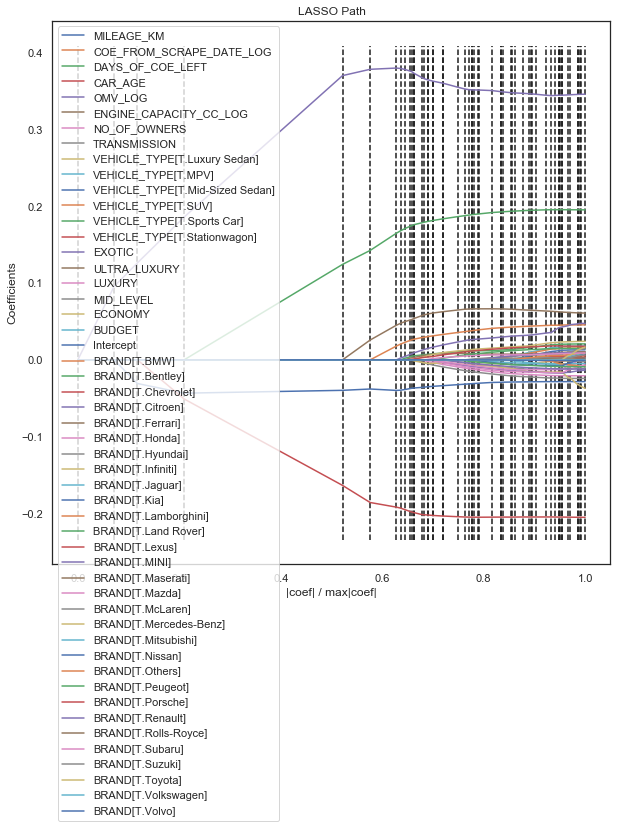

In [429]:
# # plotting the LARS path

# xx = np.sum(np.abs(coefs.T), axis=1)
# xx /= xx[-1]

# plt.figure(figsize=(10,10))
# plt.plot(xx, coefs.T)
# ymin, ymax = plt.ylim()
# plt.vlines(xx, ymin, ymax, linestyle='dashed')
# plt.xlabel('|coef| / max|coef|')
# plt.ylabel('Coefficients')
# plt.title('LASSO Path')
# plt.axis('tight')
# plt.legend(X_train_val.columns)
# plt.show()

### Section 4.2.2: Using RidgeCV to find best Alpha Value for L2 Regularization

In [492]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [493]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold  #Kfold will allow you to do cross validation

X = df_categorized_car_brands[['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE_LOG',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV_LOG', 'ENGINE_CAPACITY_CC_LOG',
       'NO_OF_OWNERS', 'TRANSMISSION', 'VEHICLE_TYPE[T.Luxury Sedan]',
       'VEHICLE_TYPE[T.MPV]', 'VEHICLE_TYPE[T.Mid-Sized Sedan]',
       'VEHICLE_TYPE[T.SUV]', 'VEHICLE_TYPE[T.Sports Car]',
       'VEHICLE_TYPE[T.Stationwagon]', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET', 'Intercept', 'BRAND[T.BMW]',
       'BRAND[T.Bentley]', 'BRAND[T.Chevrolet]', 'BRAND[T.Citroen]',
       'BRAND[T.Ferrari]', 'BRAND[T.Honda]', 'BRAND[T.Hyundai]',
       'BRAND[T.Infiniti]', 'BRAND[T.Jaguar]', 'BRAND[T.Kia]',
       'BRAND[T.Lamborghini]', 'BRAND[T.Land Rover]', 'BRAND[T.Lexus]',
       'BRAND[T.MINI]', 'BRAND[T.Maserati]', 'BRAND[T.Mazda]',
       'BRAND[T.McLaren]', 'BRAND[T.Mercedes-Benz]', 'BRAND[T.Mitsubishi]',
       'BRAND[T.Nissan]', 'BRAND[T.Others]', 'BRAND[T.Peugeot]',
       'BRAND[T.Porsche]', 'BRAND[T.Renault]', 'BRAND[T.Rolls-Royce]',
       'BRAND[T.Subaru]', 'BRAND[T.Suzuki]', 'BRAND[T.Toyota]',
       'BRAND[T.Volkswagen]', 'BRAND[T.Volvo]']]
y = df_categorized_car_brands['PRICE_LOG']

# hold out 20% of the data for final testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state=10)

In [494]:
# Use RidgeCV to find the optimal ALPHA value for L2 regularization

## Scale the data (a MUST if you're doing regularization)
std = StandardScaler()
std.fit(X_train.values)

# Scale the Predictors on both the train and validation set (for RidgeCV)
X_train_scaled = std.transform(X_train.values)
X_val_scaled = std.transform(X_val.values)

# Run the cross-validation, find the best alpha, refit the model on all the data with that alpha (RidgeCV does this for you)
alphavec = 10 ** np.linspace(-3,3,200) # alpha varies from 0.001 to 1000
kf = KFold(n_splits=5, shuffle=True, random_state=1000)

ridge_model = RidgeCV(alphas=alphavec, cv=kf)
ridge_model.fit(X_train_scaled, y_train)  # Fit your scaled train input and your y train values


# This is the best alpha value found
ridge_model.alpha_

2.5529080682395167

In [495]:
# display all coefficients in the model with optimal alpha
list(zip(X_train.columns, ridge_model.coef_))

[('MILEAGE_KM', -0.03300840629477775),
 ('COE_FROM_SCRAPE_DATE_LOG', 0.04696228909023782),
 ('DAYS_OF_COE_LEFT', 0.1918085050233663),
 ('CAR_AGE', -0.2063458210053282),
 ('OMV_LOG', 0.3341453848723921),
 ('ENGINE_CAPACITY_CC_LOG', 0.06713644138754461),
 ('NO_OF_OWNERS', -0.018316777694665068),
 ('TRANSMISSION', -0.026731297615032238),
 ('VEHICLE_TYPE[T.Luxury Sedan]', -0.0019856441969261104),
 ('VEHICLE_TYPE[T.MPV]', 0.015445034608624491),
 ('VEHICLE_TYPE[T.Mid-Sized Sedan]', 0.01228601667274234),
 ('VEHICLE_TYPE[T.SUV]', 0.016230488197249284),
 ('VEHICLE_TYPE[T.Sports Car]', 0.021541036846664988),
 ('VEHICLE_TYPE[T.Stationwagon]', 0.0027276526641671754),
 ('EXOTIC', 0.0448117140479195),
 ('ULTRA_LUXURY', 0.01571240601863962),
 ('LUXURY', 0.0055744677900481),
 ('MID_LEVEL', -0.00415000660901384),
 ('ECONOMY', -0.02066707314991139),
 ('BUDGET', -0.006385439014054026),
 ('Intercept', 0.0),
 ('BRAND[T.BMW]', 0.007355181319224209),
 ('BRAND[T.Bentley]', 0.016094912533494852),
 ('BRAND[T.Ch

In [496]:
# Make predictions on the test set using the new model and save it into a variable
val_set_pred = lasso_model.predict(X_val_scaled)


# Find the MAE and R^2 on the test set using this model
print(f"Best Lambda (alpha) RidgeCV: {ridge_model.alpha_}")
print(f"RidgeCV MAE: {mae(y_val, val_set_pred)}")
print(f"RidgeCV R^2 Score: {r2_score(y_val, val_set_pred)}")

Best Lambda (alpha) RidgeCV: 2.5529080682395167
RidgeCV MAE: 0.0930728082873645
RidgeCV R^2 Score: 0.9546411724617769


### Section 4.2.3: Using ElasticnetCV to find best Alpha Value 

In [497]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold  #Kfold will allow you to do cross validation

X = df_categorized_car_brands[['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE_LOG',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV_LOG', 'ENGINE_CAPACITY_CC_LOG',
       'NO_OF_OWNERS', 'TRANSMISSION', 'VEHICLE_TYPE[T.Luxury Sedan]',
       'VEHICLE_TYPE[T.MPV]', 'VEHICLE_TYPE[T.Mid-Sized Sedan]',
       'VEHICLE_TYPE[T.SUV]', 'VEHICLE_TYPE[T.Sports Car]',
       'VEHICLE_TYPE[T.Stationwagon]', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET', 'Intercept', 'BRAND[T.BMW]',
       'BRAND[T.Bentley]', 'BRAND[T.Chevrolet]', 'BRAND[T.Citroen]',
       'BRAND[T.Ferrari]', 'BRAND[T.Honda]', 'BRAND[T.Hyundai]',
       'BRAND[T.Infiniti]', 'BRAND[T.Jaguar]', 'BRAND[T.Kia]',
       'BRAND[T.Lamborghini]', 'BRAND[T.Land Rover]', 'BRAND[T.Lexus]',
       'BRAND[T.MINI]', 'BRAND[T.Maserati]', 'BRAND[T.Mazda]',
       'BRAND[T.McLaren]', 'BRAND[T.Mercedes-Benz]', 'BRAND[T.Mitsubishi]',
       'BRAND[T.Nissan]', 'BRAND[T.Others]', 'BRAND[T.Peugeot]',
       'BRAND[T.Porsche]', 'BRAND[T.Renault]', 'BRAND[T.Rolls-Royce]',
       'BRAND[T.Subaru]', 'BRAND[T.Suzuki]', 'BRAND[T.Toyota]',
       'BRAND[T.Volkswagen]', 'BRAND[T.Volvo]']]
y = df_categorized_car_brands['PRICE_LOG']

# hold out 20% of the data for final testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state=10)

In [499]:
# Using ElasticNetCV to find the optimal ALPHA value
# Scale the data as before (scaling is a must for regularization)
std = StandardScaler()
std.fit(X_train.values) # (60% of the data)

# Scale the Predictors on both the train and validation set
X_train_scaled = std.transform(X_train.values)
X_val_scalred = std.transform(X_val.values)

# Run the cross-validation, find the best alpha, refit the model and all the data using that alpha (ElasticNetCV does this for you)
alphavec = 10 ** np.linspace(-3,3,200)  # alpha varies from 0.001 to 1000
kf = KFold(n_splits=5, shuffle=True, random_state=1000)

elasticnet_model = ElasticNetCV(alphas = alphavec, cv=kf)
elasticnet_model.fit(X_train_scaled, y_train)  # Fitting standardscaled input and true y values into model to train it

elasticnet_model.alpha_


0.001

In [500]:
# display all coefficients in the model with optimal alpha
list(zip(X_train.columns, elasticnet_model.coef_))

[('MILEAGE_KM', -0.03233755528978147),
 ('COE_FROM_SCRAPE_DATE_LOG', 0.04630208399416842),
 ('DAYS_OF_COE_LEFT', 0.19191699686729474),
 ('CAR_AGE', -0.2068704303258379),
 ('OMV_LOG', 0.3349524529304342),
 ('ENGINE_CAPACITY_CC_LOG', 0.06839961028883336),
 ('NO_OF_OWNERS', -0.017702493146917197),
 ('TRANSMISSION', -0.02627206769843484),
 ('VEHICLE_TYPE[T.Luxury Sedan]', -0.003102143389325614),
 ('VEHICLE_TYPE[T.MPV]', 0.012515582382393394),
 ('VEHICLE_TYPE[T.Mid-Sized Sedan]', 0.00973310663250216),
 ('VEHICLE_TYPE[T.SUV]', 0.013966207900677827),
 ('VEHICLE_TYPE[T.Sports Car]', 0.019738988076676834),
 ('VEHICLE_TYPE[T.Stationwagon]', 0.0015782661044366774),
 ('EXOTIC', 0.0339582915795018),
 ('ULTRA_LUXURY', 0.012403871115510648),
 ('LUXURY', 0.0),
 ('MID_LEVEL', -0.006529546662037074),
 ('ECONOMY', -0.016402174750696115),
 ('BUDGET', -0.0058074455661480725),
 ('Intercept', 0.0),
 ('BRAND[T.BMW]', 0.005709633162699246),
 ('BRAND[T.Bentley]', 0.0155788705047593),
 ('BRAND[T.Chevrolet]', -0.

In [501]:
# Use this model to do prediction on a validation data set
val_set_pred = elasticnet_model.predict(X_val_scaled)

# Find the MAE and R^2 on the test set using this model
print(f'Best Lambda (Alpha) ElasticNetCV: {elasticnet_model.alpha_}')
print(f'ElasticNetCV MAE: {mae(y_val, val_set_pred)}')  # mae is a defined function above
print(f'ElasticNetCV R^2 Score: {r2_score(y_val, val_set_pred)}')  # r2_score is an imported module

Best Lambda (Alpha) ElasticNetCV: 0.001
ElasticNetCV MAE: 0.09296420321879265
ElasticNetCV R^2 Score: 0.9547121202618065


### Section 4.2.3: Using Cross_val_score to find best LR R^2

In [502]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [503]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold  #Kfold will allow you to do cross validation

X = df_categorized_car_brands[['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE_LOG',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV_LOG', 'ENGINE_CAPACITY_CC_LOG',
       'NO_OF_OWNERS', 'TRANSMISSION', 'VEHICLE_TYPE[T.Luxury Sedan]',
       'VEHICLE_TYPE[T.MPV]', 'VEHICLE_TYPE[T.Mid-Sized Sedan]',
       'VEHICLE_TYPE[T.SUV]', 'VEHICLE_TYPE[T.Sports Car]',
       'VEHICLE_TYPE[T.Stationwagon]', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET', 'Intercept', 'BRAND[T.BMW]',
       'BRAND[T.Bentley]', 'BRAND[T.Chevrolet]', 'BRAND[T.Citroen]',
       'BRAND[T.Ferrari]', 'BRAND[T.Honda]', 'BRAND[T.Hyundai]',
       'BRAND[T.Infiniti]', 'BRAND[T.Jaguar]', 'BRAND[T.Kia]',
       'BRAND[T.Lamborghini]', 'BRAND[T.Land Rover]', 'BRAND[T.Lexus]',
       'BRAND[T.MINI]', 'BRAND[T.Maserati]', 'BRAND[T.Mazda]',
       'BRAND[T.McLaren]', 'BRAND[T.Mercedes-Benz]', 'BRAND[T.Mitsubishi]',
       'BRAND[T.Nissan]', 'BRAND[T.Others]', 'BRAND[T.Peugeot]',
       'BRAND[T.Porsche]', 'BRAND[T.Renault]', 'BRAND[T.Rolls-Royce]',
       'BRAND[T.Subaru]', 'BRAND[T.Suzuki]', 'BRAND[T.Toyota]',
       'BRAND[T.Volkswagen]', 'BRAND[T.Volvo]']]
y = df_categorized_car_brands['PRICE_LOG']

# hold out 20% of the data for final testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state=10)

In [517]:
from sklearn.model_selection import cross_val_score

# Initializing LR Model
lm = LinearRegression()

# setting a random seed for the shuffling
kf = KFold(n_splits=5, shuffle=True, random_state = 1000)  

# Returns you the validation score for each of the 5 kfolds
cross_val_score(lm, X_train_val, y_train_val, # estimator/model, features, target
                cv=kf, # number of folds 
                scoring='r2') # scoring metric    
lm.fit(sm.add_constant(X_train), y_train)
val_set_pred = lm.predict(X_val)

print("Linear Regression MAE: {}".format(mae(y_val, val_set_pred)))
print("Linear Regression R^2 Score: {}".format(np.mean(cross_val_score(lm, X_train_val, y_train_val, cv=kf, scoring = 'r2'))))

Linear Regression MAE: 0.09301546518918193
Linear Regression R^2 Score: 0.9458506849389228


C:\Users\User\.conda\envs\metis\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Section 4.2.3: Summary from the above Train-Validation Sets

Linear Regresion MAE: 0.09301546518918193   
Linear Regression R^2 Score: **0.9458506849389228** 

  
LassoCV Best Lambda (alpha): 0.001  
LassoCV MAE: 0.0930728082873645  
LassoCV R^2 Score: **0.9546411724617769**  
  
  
RidgeCV Best Lambda (alpha): 2.5529080682395167  
RidgeCV MAE: 0.0930728082873645  
RidgeCV R^2 Score: **0.9546411724617769**  
  
  
ElasticNetCV Best Lambda (Alpha): 0.001  
ElasticNetCV MAE: 0.09296420321879265  
ElasticNetCV R^2 Score: **0.9547121202618065**

From the above, it shows that other models are better than Linear Regression. Therefore, I'll pick ElasticNet as the model to use

In [522]:
## cross validation using KFold (on the 100% dataset, without manually splitting)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Feature transform/scaling so that we can run our ridge/lasso/elasticnet model 
scaler = StandardScaler()
X_train_val_scaled = scaler.fit_transform(X_train_val.values)

#Feature transform/scaling so that we can run our poly model 
poly = PolynomialFeatures(degree=2) 
X_train_val_poly = poly.fit_transform(X_train_val.values)

kf = KFold(n_splits=5, shuffle=True, random_state = 1000)

lm = LinearRegression()
cvs_lm = cross_val_score(lm, X_train_val, y_train_val, cv=kf, scoring='r2')
print("Linear Regression Cross Val Score: {}".format(cvs_lm))
print('Linear regression cv R^2:', round(np.mean(cvs_lm),3), '+-', round(np.std(cvs_lm),3),'\n' )


lm_ridge = Ridge(alpha=2.5529080682395167)
cvs_ridge = cross_val_score(lm_ridge, X_train_val_scaled, y_train_val, cv=kf, scoring='r2')
print("Ridge Cross Val Score: {}".format(cvs_ridge))
print('Ridge regression cv R^2:', round(np.mean(cvs_ridge),3), '+-', round(np.std(cvs_ridge),3),'\n' )



lm_lasso = Lasso(alpha=0.001)
cvs_lasso = cross_val_score(lm_lasso, X_train_val_scaled, y_train_val, cv=kf, scoring='r2')
print("Lasso Cross Val Score: {}".format(cvs_lasso))
print('Lasso regression cv R^2:', round(np.mean(cvs_lasso),3), '+-', round(np.std(cvs_lasso),3),'\n' )



lm_elasticnet = ElasticNet(alpha=0.001)
cvs_elasticnet = cross_val_score(lm_elasticnet, X_train_val_scaled, y_train_val, cv=kf, scoring='r2')
print("Elastic Net Cross Val Score: {}".format(cvs_elasticnet))
print('ElasticNet regression cv R^2:', round(np.mean(cvs_elasticnet),3), '+-', round(np.std(cvs_elasticnet),3),'\n' )



lm_poly = LinearRegression()
cvs_poly = cross_val_score(lm_poly, X_train_val_poly, y_train_val, cv=kf, scoring='r2')
print("Poly Regression Cross Val Score: {}".format(cvs_poly))
print('Degree 2 polynomial Regression cv R^2:', round(np.mean(cvs_poly),3), '+-', round(np.std(cvs_poly),3) )

Linear Regression Cross Val Score: [0.9486159  0.93715322 0.95806218 0.94232121 0.94310092]
Linear regression cv R^2: 0.946 +- 0.007 

Ridge Cross Val Score: [0.94902562 0.93712432 0.95795696 0.94194567 0.94311097]
Ridge regression cv R^2: 0.946 +- 0.007 

Lasso Cross Val Score: [0.94975848 0.93716628 0.95825058 0.94251208 0.94349464]
Lasso regression cv R^2: 0.946 +- 0.007 

Elastic Net Cross Val Score: [0.94961984 0.93716941 0.95822859 0.94249821 0.94328557]
ElasticNet regression cv R^2: 0.946 +- 0.007 

Poly Regression Cross Val Score: [-8.23632682e+00 -1.05785259e+01 -2.98685616e+00 -2.22851662e+10
 -3.90420378e+10]
Degree 2 polynomial Regression cv R^2: -12265440818.949 +- 15929244550.838


## From the above, it seems like linear regression is tied for the highest amongst all. Therefore, I have chosen to use Linear Regression as my final Model

# Section 5: Model Testing (On whole DataSet)

## Section 5.1: Training Model on 80% DataSet

In [550]:
## cross validation using KFold (on the 100% dataset, without manually splitting)
from sklearn.model_selection import train_test_split

X = df_categorized_car_brands[['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE_LOG',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV_LOG', 'ENGINE_CAPACITY_CC_LOG',
       'NO_OF_OWNERS', 'TRANSMISSION', 'VEHICLE_TYPE[T.Luxury Sedan]',
       'VEHICLE_TYPE[T.MPV]', 'VEHICLE_TYPE[T.Mid-Sized Sedan]',
       'VEHICLE_TYPE[T.SUV]', 'VEHICLE_TYPE[T.Sports Car]',
       'VEHICLE_TYPE[T.Stationwagon]', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET', 'Intercept', 'BRAND[T.BMW]',
       'BRAND[T.Bentley]', 'BRAND[T.Chevrolet]', 'BRAND[T.Citroen]',
       'BRAND[T.Ferrari]', 'BRAND[T.Honda]', 'BRAND[T.Hyundai]',
       'BRAND[T.Infiniti]', 'BRAND[T.Jaguar]', 'BRAND[T.Kia]',
       'BRAND[T.Lamborghini]', 'BRAND[T.Land Rover]', 'BRAND[T.Lexus]',
       'BRAND[T.MINI]', 'BRAND[T.Maserati]', 'BRAND[T.Mazda]',
       'BRAND[T.McLaren]', 'BRAND[T.Mercedes-Benz]', 'BRAND[T.Mitsubishi]',
       'BRAND[T.Nissan]', 'BRAND[T.Others]', 'BRAND[T.Peugeot]',
       'BRAND[T.Porsche]', 'BRAND[T.Renault]', 'BRAND[T.Rolls-Royce]',
       'BRAND[T.Subaru]', 'BRAND[T.Suzuki]', 'BRAND[T.Toyota]',
       'BRAND[T.Volkswagen]', 'BRAND[T.Volvo]']]

y = df_categorized_car_brands['PRICE_LOG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=88)

In [551]:
# model / fit / summarize
import statsmodels.api as sm

lm_model = LinearRegression()
lm_model = sm.OLS(y_train, X_train)  # no need sm.add_constant because there's already an intercept
results = lm_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PRICE_LOG   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     815.7
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        22:30:04   Log-Likelihood:                 1202.5
No. Observations:                2067   AIC:                            -2309.
Df Residuals:                    2019   BIC:                            -2039.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
MILEAGE_KM                      -5.469e-07   1.37e-07     -3.978      0.000   -8.17e-07   -2.77e-07
COE_FROM_SCRAPE_DATE_LOG            0.1006      0.010     10.113      0.000       0.081       0.120
DAYS_OF_COE_LEFT                    0.0002   5.09e-06     46.864      0.000       0.000       0.000
CAR_AGE                            -0.0674      0.002    -31.405      0.000      -0.072      -0.063
OMV_LOG                             0.5793      0.016     35.323      0.000       0.547       0.611
ENGINE_CAPACITY_CC_LOG              0.2533      0.023     10.921      0.000       0.208       0.299
NO_OF_OWNERS                       -0.0225      0.004     -5.125      0.000      -0.031      -0.014
TRANSMISSION                       -0.1487      0.026     -5.682      0.000      -0.200      -0.097
VEHICLE_TYPE[T.Luxury Sedan]       -0.0009      0.012     -0.077      0.939      -0.025       0.023
VEHICLE_TYPE[T.MPV]                 0.0658      0.015      4.515      0.000       0.037       0.094
VEHICLE_TYPE[T.Mid-Sized Sedan]     0.0387      0.012      3.197      0.001       0.015       0.062
VEHICLE_TYPE[T.SUV]                 0.0424      0.012      3.604      0.000       0.019       0.065
VEHICLE_TYPE[T.Sports Car]          0.0768      0.016      4.869      0.000       0.046       0.108
VEHICLE_TYPE[T.Stationwagon]        0.0174      0.024      0.732      0.464      -0.029       0.064
EXOTIC                              0.5775      0.105      5.478      0.000       0.371       0.784
ULTRA_LUXURY                        0.3423      0.040      8.577      0.000       0.264       0.421
LUXURY                              0.2014      0.034      6.009      0.000       0.136       0.267
MID_LEVEL                           0.0478      0.023      2.099      0.036       0.003       0.092
ECONOMY                             0.1178      0.068      1.725      0.085      -0.016       0.252
BUDGET                              0.0769      0.069      1.118      0.264      -0.058       0.212
Intercept                           2.1292      0.146     14.552      0.000       1.842       2.416
BRAND[T.BMW]                        0.0133      0.017      0.799      0.424      -0.019       0.046
BRAND[T.Bentley]                    0.2531      0.051      4.950      0.000       0.153       0.353
BRAND[T.Chevrolet]                 -0.0058      0.100     -0.058      0.954      -0.201       0.190
BRAND[T.Citroen]                   -0.1293      0.097     -1.330      0.184      -0.320       0.061
BRAND[T.Ferrari]                   -0.0365      0.137     -0.267      0.789      -0.304       0.231
BRAND[T.Honda]                      0.0093      0.092      0.101      0.919      -0.171       0.190
BRAND[T.Hyundai]                    0.0811      0.094      0.859      0.391      -0

## Section 5.2: Testing Model on 20% DataSet

In [553]:
from sklearn.metrics import mean_squared_error, r2_score

# Create prediction variable for test set
model_test_pred = results.predict(X_test)

# Check accuracy of test
print("Linear Regression MAE: {}".format(mae(y_test, model_test_pred))) # MAE
print("Linear Regression MSE: {}".format(mean_squared_error(y_test, model_test_pred))) # Mean Squared Error (MSE)
print("Linear Regression R2 Score: {}".format(r2_score(y_test, model_test_pred)))# R^2 Score


Linear Regression MAE: 0.10132360208276252
Linear Regression MSE: 0.019296883835326812
Linear Regression R2 Score: 0.9470236831478307


In [543]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

# Section 6: Checking Linear Regression Assumptions
### Plot 3 Graphs
* residue
* QQ plot

In [554]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

## Section 6.1: Plotting the Residuals

Text(0, 0.5, 'Residuals')

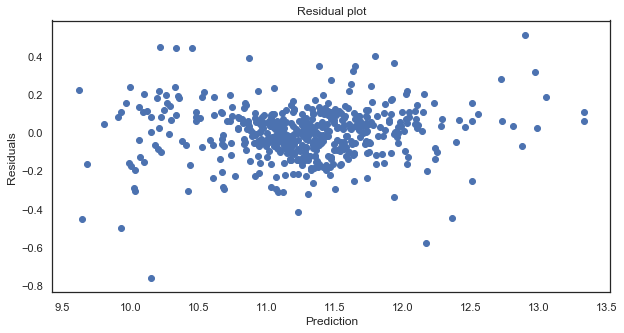

In [561]:
# Defining Graph size
plt.figure(figsize=(10,5))

# Defining the residue and model predicted results
df_categorized_car_brands['PREDICTIONS'] = results.predict(X_test)
df_categorized_car_brands['RESIDUE'] = y_test - model_test_pred

# Plot your predicted values on the x-axis, and your residuals on the y-axis on Residue Plot
plt.scatter(df_categorized_car_brands['PREDICTIONS'], df_categorized_car_brands['RESIDUE'])
plt.title("Residual plot")
plt.xlabel("Prediction")
plt.ylabel("Residuals")

## Section 6.2: QQ Plot

C:\Users\User\.conda\envs\metis\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\User\.conda\envs\metis\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\User\.conda\envs\metis\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Text(0.5, 1.0, 'Normal Q-Q plot')

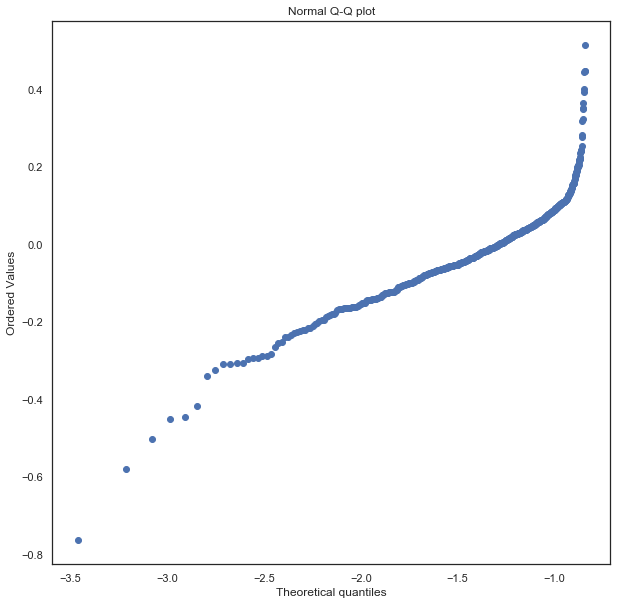

In [562]:
# Defining the residue and model predicted results
df_categorized_car_brands['PREDICTIONS'] = results.predict(X_test)
df_categorized_car_brands['RESIDUE'] = y_test - model_test_pred

# diagnose/inspect residual normality using QQplot:
plt.figure(figsize=(10,10))
stats.probplot(df_categorized_car_brands['RESIDUE'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")

## Mileage Check using Toyota Brand

In [46]:
dir()

['ElasticNet',
 'ElasticNetCV',
 'In',
 'Lasso',
 'LassoCV',
 'LinearRegression',
 'Out',
 'Ridge',
 'RidgeCV',
 '_',
 '_10',
 '_12',
 '_13',
 '_14',
 '_15',
 '_17',
 '_18',
 '_19',
 '_21',
 '_22',
 '_23',
 '_24',
 '_25',
 '_30',
 '_32',
 '_33',
 '_36',
 '_37',
 '_38',
 '_39',
 '_40',
 '_41',
 '_42',
 '_43',
 '_44',
 '_5',
 '_6',
 '_7',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_i44',
 '_i45',
 '_i46',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'ax',
 'bottom',
 'cmap',
 'date',
 'df_categorized_car_brands',
 'df_clean',
 'df_clean2'

In [47]:
df_toyota = df_categorized_car_brands[df_categorized_car_brands['BRAND'] == 'Toyota']
df_toyota_no_brands = df_toyota[['PRICE', 'DEPRE_VALUE_PER_YEAR', 'MILEAGE_KM',
       'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 'REG_DATE',
       'MANUFACTURED_YEAR', 'CAR_AGE', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV',
       'ARF', 'ENGINE_CAPACITY_CC', 'ROAD_TAX_PER_YEAR', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'VEHICLE_TYPE', 'TRANSMISSION']]
df_toyota_no_brands_correlated_independent_variables_removed = \
df_toyota_no_brands.drop(['DEPRE_VALUE_PER_YEAR','REG_DATE','MANUFACTURED_YEAR','DEREG_VALUE_FROM_SCRAPE_DATE',
                         'ARF','ROAD_TAX_PER_YEAR','VEHICLE_TYPE'],axis=1)
df_toyota_no_brands_correlated_independent_variables_removed.columns

Index(['PRICE', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION'],
      dtype='object')

Testing fit on the Toyota brand to check mileage

In [48]:
df_toyota_no_brands_correlated_independent_variables_removed

PRICE  MILEAGE_KM  COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT  CAR_AGE  \
4      65800.0    117000.0               39563.0            3503.0     10.0   
13     96800.0     26000.0               51109.0            2624.0      3.0   
16     65800.0     60500.0               47300.0            2370.0      4.0   
32     86500.0     62000.0               57414.0            2927.0      2.0   
33     34800.0    173675.0               15256.0            1735.0     10.0   
...        ...         ...                   ...               ...      ...   
3917   65800.0     57000.0               43000.0            2317.0      4.0   
3944   33800.0     82000.0               13943.0            1678.0     10.0   
3955   65800.0     63000.0               57089.0            1858.0      4.0   
3980   99800.0     40000.0               59889.0            2257.0      4.0   
3982  104500.0     47638.0               84504.0            1679.0      5.0   

          OMV  ENGINE_CAPACITY_CC  CURB_WEIGHT_KG  NO_OF_OWNERS  TRANSMISSION  
4     23465.0                1797          1350.0           2.0             1  
13    29570.0                2494          1475.0           1.0             1  
16    19589.0                1598          1205.0           1.0             1  
32    19955.0                1798          1355.0           1.0             1  
33    17853.0                1598          1195.0           1.0             1  
...       ...                 ...             ...           ...           ...  
3917  19589.0                1598          1205.0           1.0             1  
3944  17853.0                1598          1195.0           1.0             1  
3955  17804.0                1598          1205.0           1.0             1  
3980  29454.0                1986          1610.0           1.0             1  
3982  45977.0                3456          2030.0           2.0             1  

[405 rows x 10 columns]

## Visualizing Just Toyota

(10.0, 0.0)

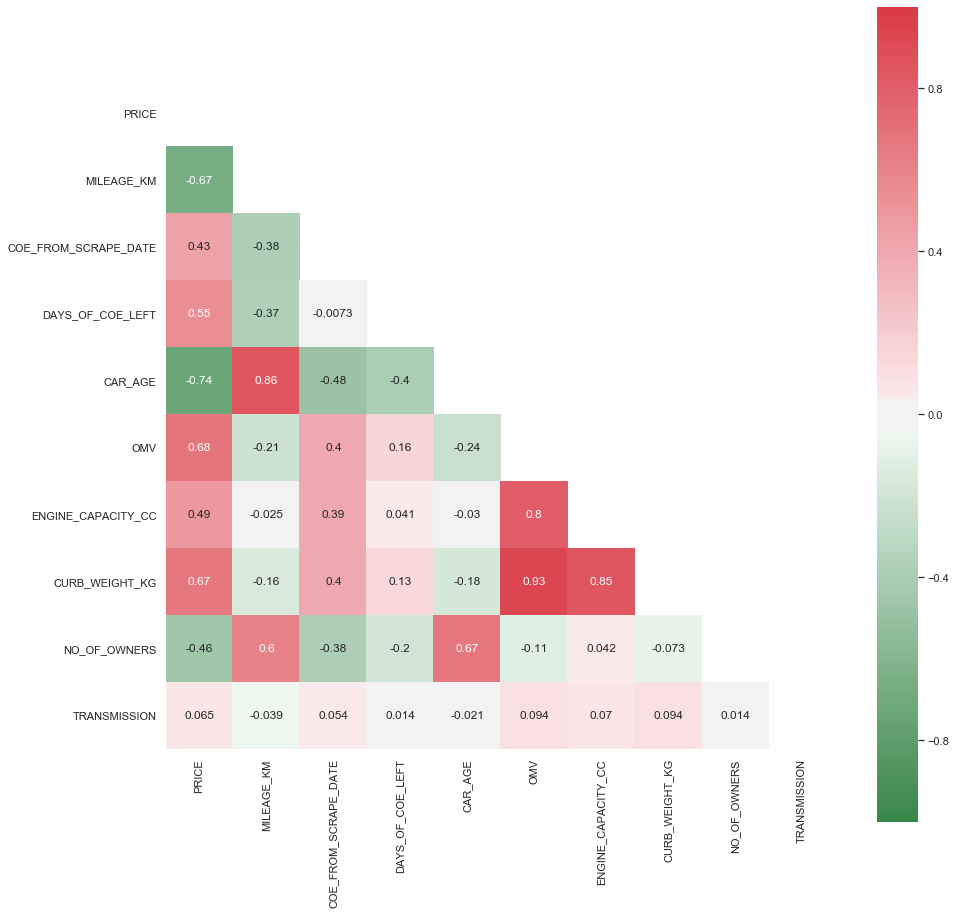

In [49]:
# Re-visualizing the correlation matrix

sns.set(style="white")
# Corr Matrix to be plotted
data=df_toyota_no_brands_correlated_independent_variables_removed.corr()
 

# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(15,15))

# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
sns.heatmap(data, mask=mask, annot=True, 
            square=True, cmap=cmap , vmin=-1, vmax=1,ax=ax);

# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Heatmap View

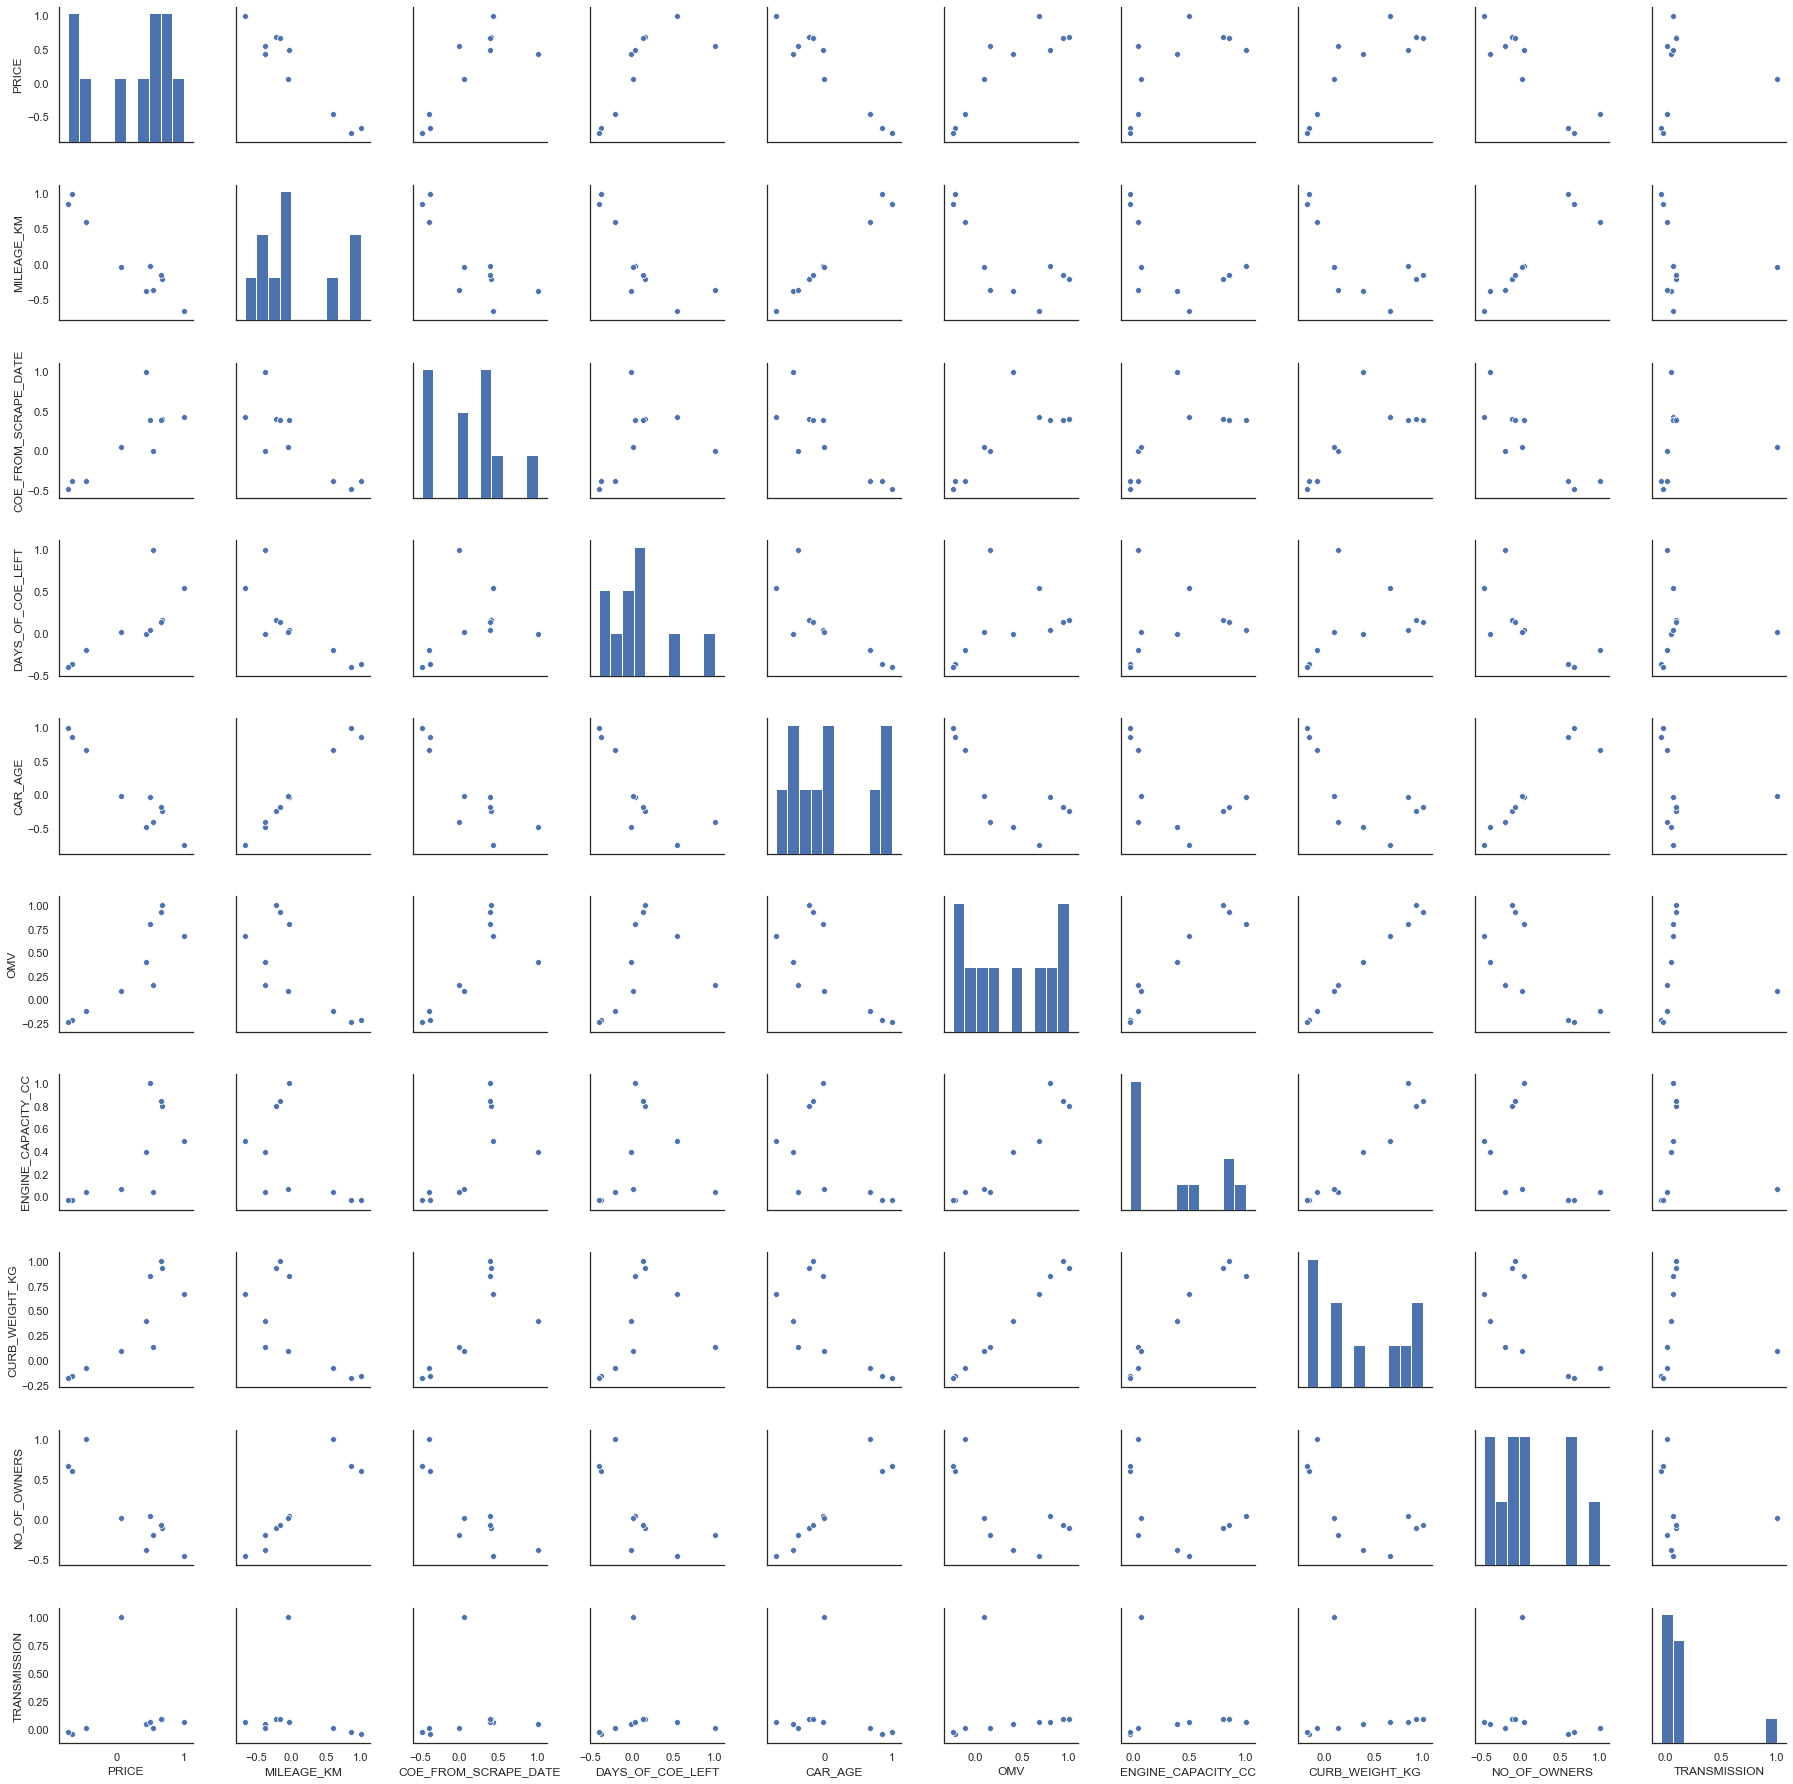

In [50]:
# Data to visualize
data = df_toyota_no_brands_correlated_independent_variables_removed.corr()

# Use this if you want to just visualize one triangle 
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.pairplot(data=data);

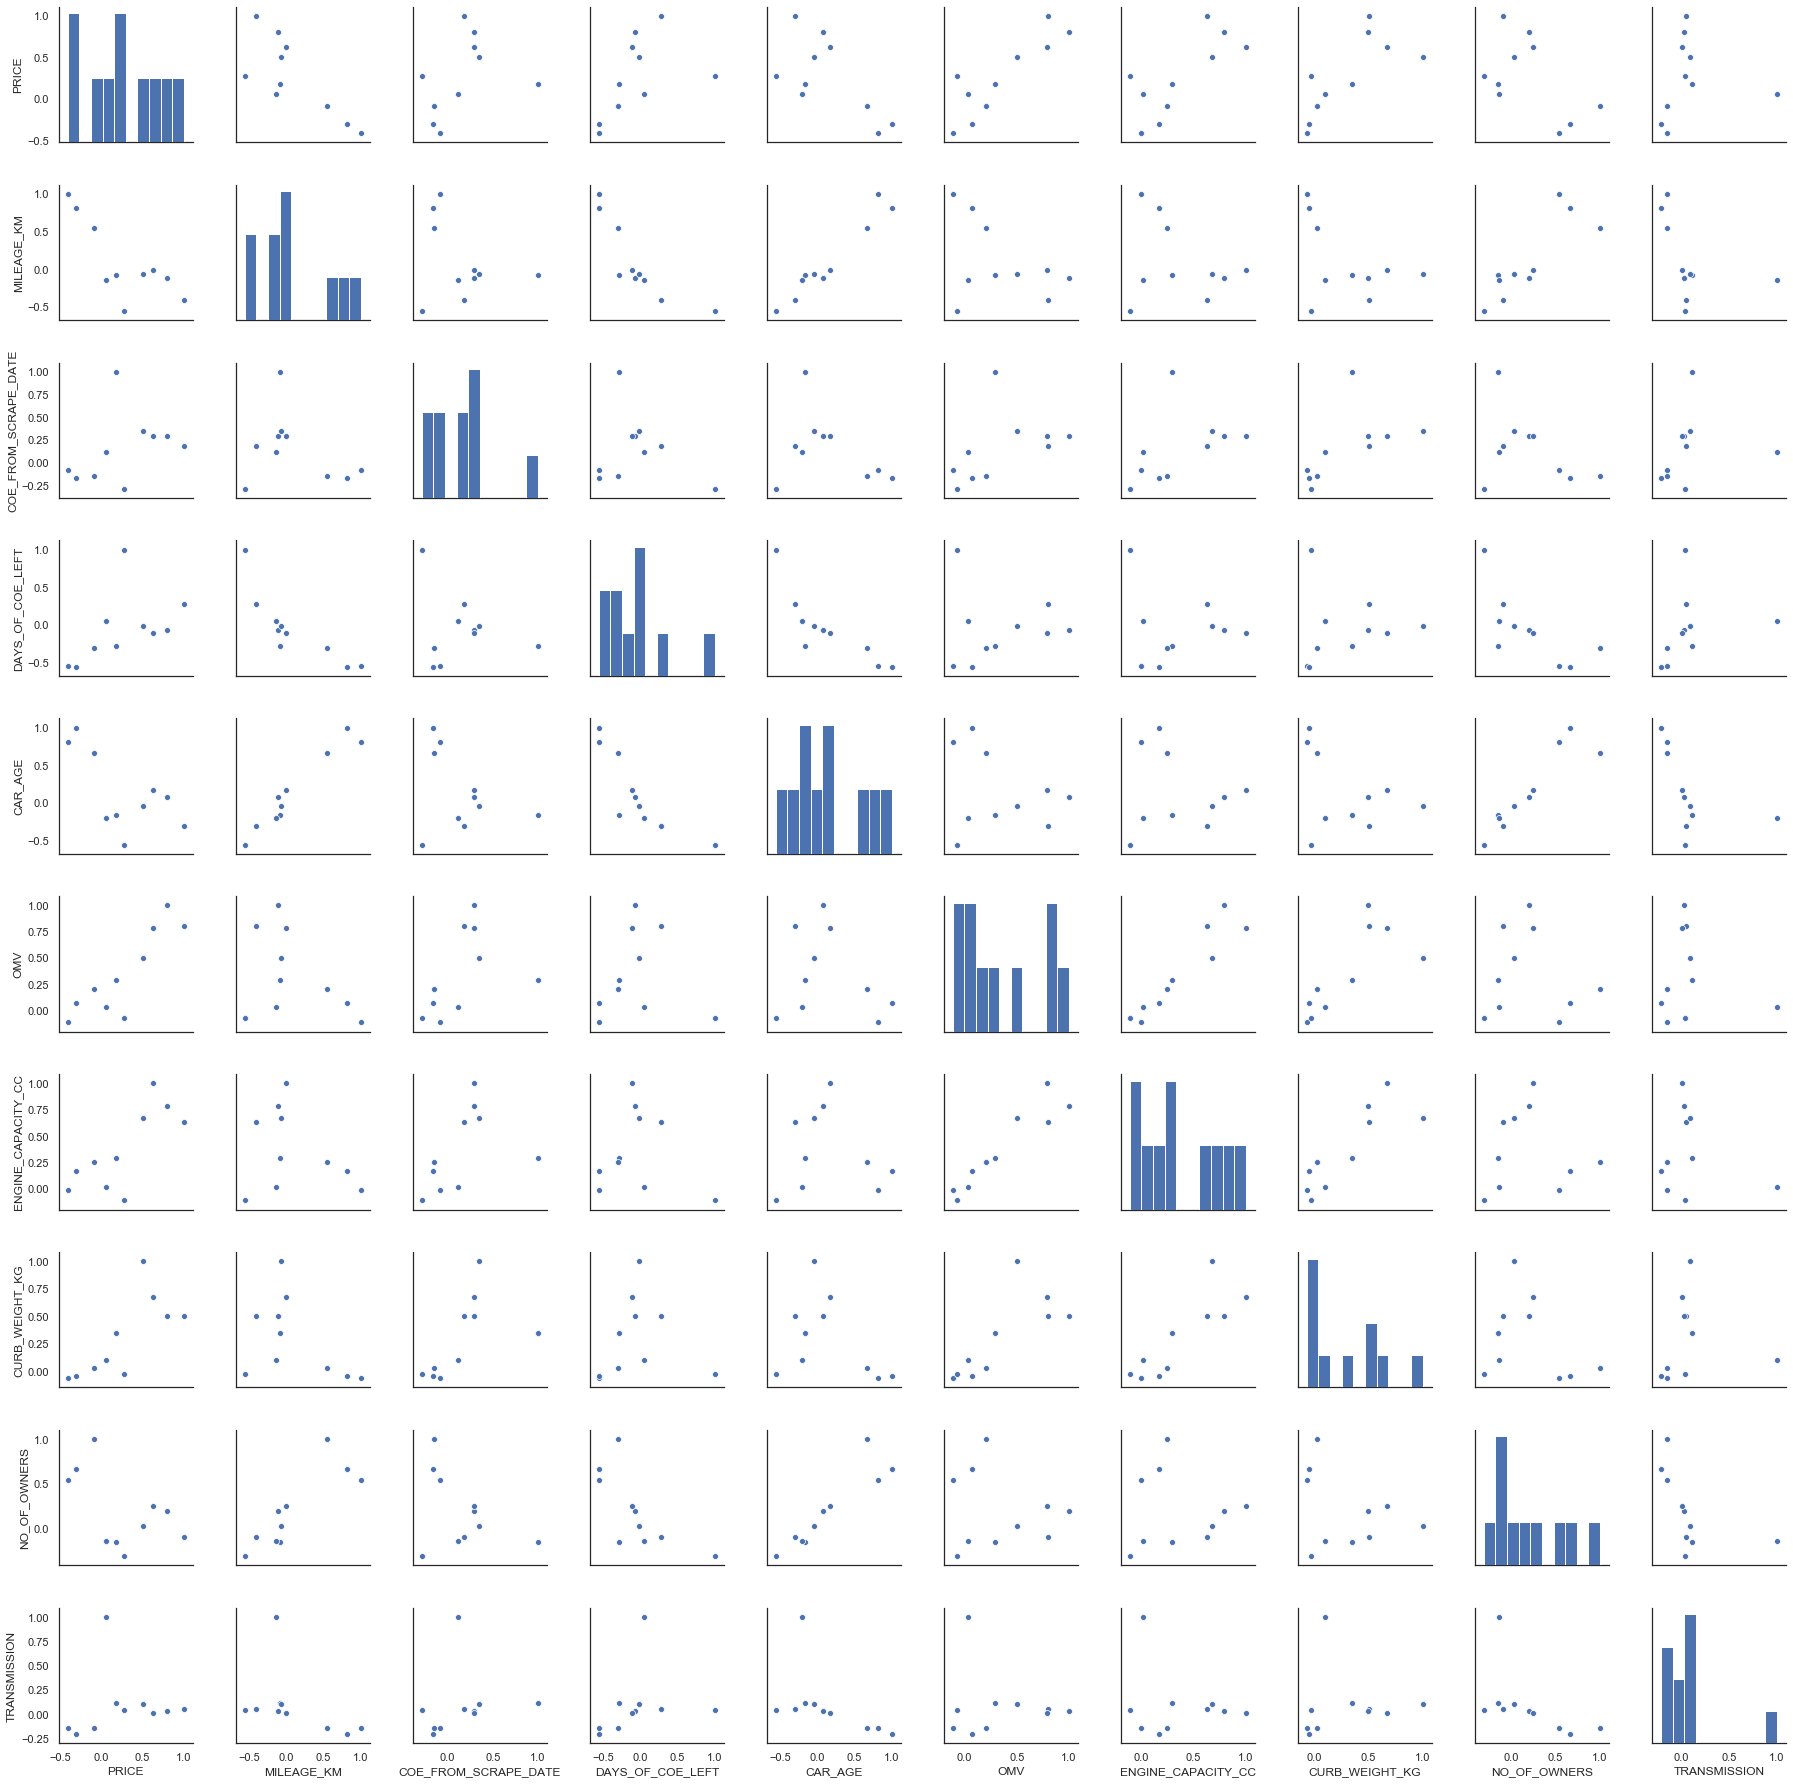

In [51]:
# Making a side-by-side comparison of all Brands vs Toyota (Toyota Pairplot is above)
data= df_price_no_brands.corr()

# Use this if you want to just visualize one triangle 
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.pairplot(data=data);

In [75]:
X_toyota = df_toyota_no_brands_correlated_independent_variables_removed[ ['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION'] ].astype(float)
X_toyota = sm.add_constant(X_toyota)
y_toyota = df_toyota_no_brands['PRICE'].astype(float)
                               
# Slicing, Fitting, Summary
                               
lsm_toyota = sm.OLS(y_toyota, X_toyota)
results_toyota = lsm_toyota.fit()
results_toyota.summary()

C:\Users\User\.conda\envs\metis\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     401.2
Date:                Mon, 28 Oct 2019   Prob (F-statistic):          1.32e-192
Time:                        09:55:07   Log-Likelihood:                -4306.3
No. Observations:                 405   AIC:                             8633.
Df Residuals:                     395   BIC:                             8673.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -7528.7231   8414.778     -0.895      0.371   -2.41e+04    9014.629
MILEAGE_KM              -0.0562      0.021     -2.723      0.007      -0.097      -0.016
COE_FROM_SCRAPE_DATE    -0.1242      0.038     -3.247      0.001      -0.199      -0.049
DAYS_OF_COE_LEFT         9.7340      0.724     13.445      0.000       8.311      11.157
CAR_AGE              -4311.7874    319.660    -13.489      0.000   -4940.235   -3683.340
OMV                      0.3663      0.178      2.055      0.041       0.016       0.717
ENGINE_CAPACITY_CC       5.2037      2.675      1.945      0.052      -0.055      10.462
CURB_WEIGHT_KG          51.6544      6.070      8.510      0.000      39.722      63.587
NO_OF_OWNERS          -761.2293    638.284     -1.193      0.234   -2016.087     493.629
TRANSMISSION          -127.8469   7253.371     -0.018      0.986   -1.44e+04    1.41e+04
==============================================================================
Omnibus:                       36.614   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.993
Skew:                           0.447   Prob(JB):                     2.87e-20
Kurtosis:                       5.129   Cond. No.                     2.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Metrics Explanation
`Road Tax Values`
* Calculated based on engine CC on a per annum basis. Intuitively, it is paying for the "right to pollute". The more you want to pollute, the more you need to pay (based on their CO2 Emissions).  

* Therefore, there might possibly be some correlation involved between `engine capacity` and `road tax values`

### Data Exploration

In [145]:
df_clean.corr()['PRICE'].sort_values(ascending=False)

PRICE                           1.000000
DEREG_VALUE_FROM_SCRAPE_DATE    0.924820
ARF                             0.879241
DEPRE_VALUE_PER_YEAR            0.816275
OMV                             0.801592
ENGINE_CAPACITY_CC              0.630484
ROAD_TAX_PER_YEAR               0.629361
CURB_WEIGHT_KG                  0.505194
DAYS_OF_COE_LEFT                0.273379
COE_FROM_SCRAPE_DATE            0.182914
TRANSMISSION                    0.054688
NO_OF_OWNERS                   -0.090614
MILEAGE_KM                     -0.409517
Name: PRICE, dtype: float64

(12.0, 0.0)

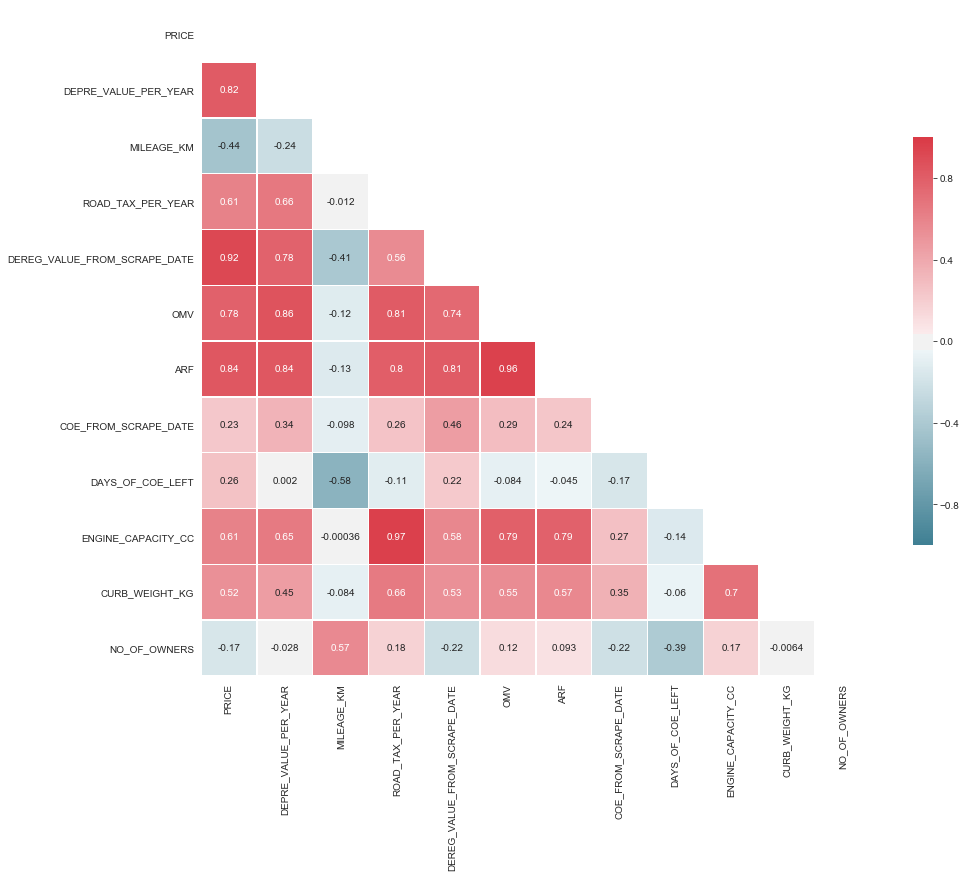

In [23]:
# Compute the correlation matrix
corr = df_clean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1.0, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

bottom, top = ax.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

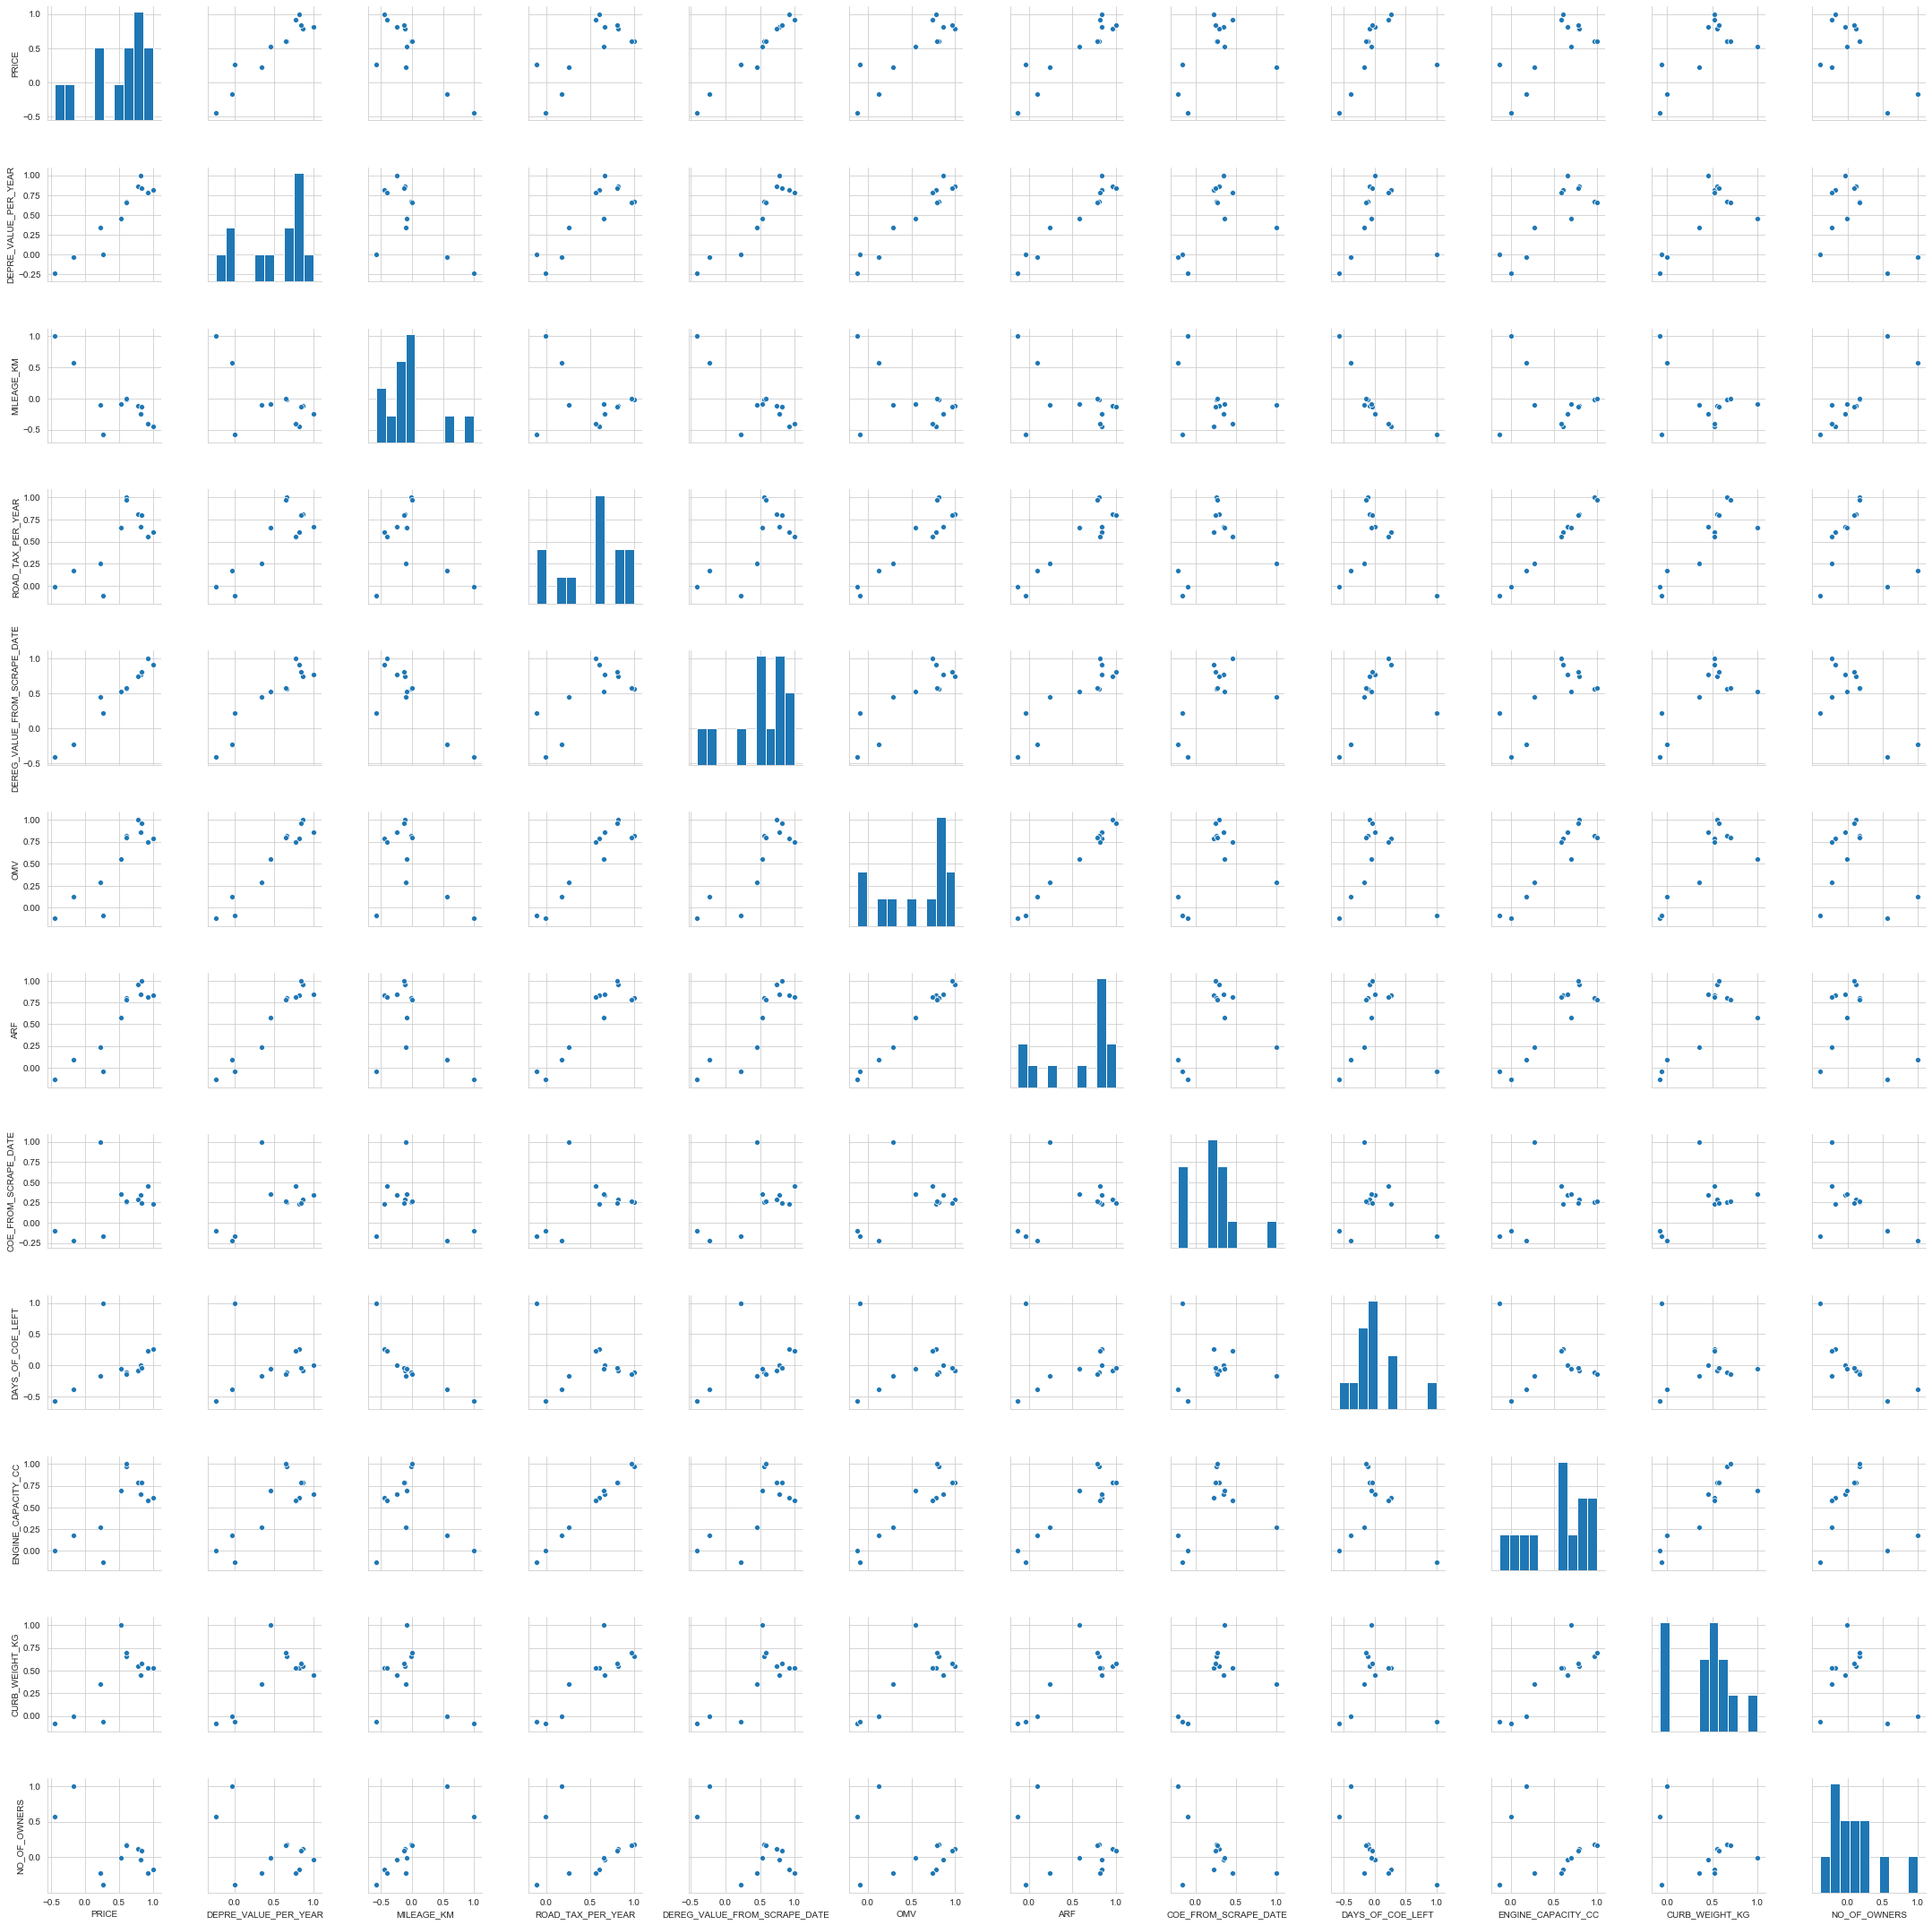

In [26]:
sns.pairplot(df_clean.corr())

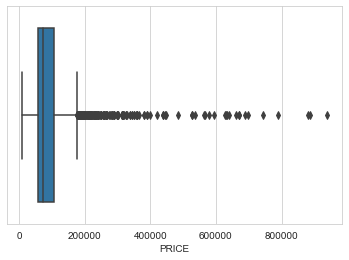

In [51]:
sns.boxplot(x=df_clean['PRICE'])  # Should do a log transformation here

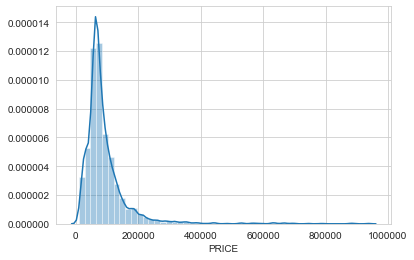

In [53]:
sns.distplot(df_clean['PRICE'])  # Your dependent variable 'must' be normally distributed

In [54]:
df_clean['PRICE_LOG'] = np.log(df_clean['PRICE'])  # This is the power of the log transform

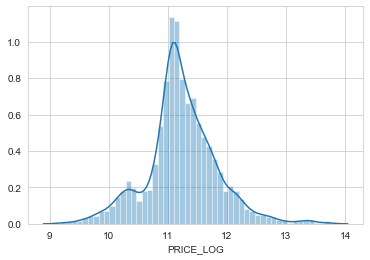

In [55]:
sns.distplot(df_clean['PRICE_LOG'])

## Methodology:
Step 1: Clean DF  
Step 2: Check if predictor variables are normally distributed  
* pd.DataFrame.hist(df, figsize=[15,15])  
  
Step 2.1: Visually check if your predictor variables have some sort of correlation (linear relatonship) with your target y

  
Step 2.1: If they are not, 

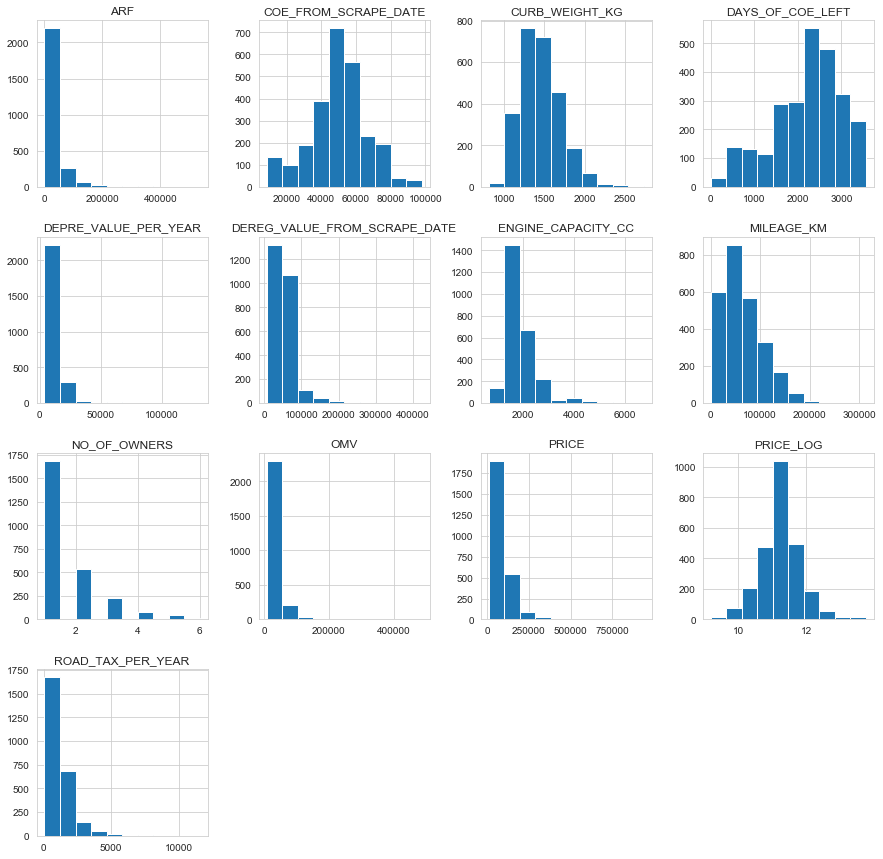

In [57]:
pd.DataFrame.hist(df_clean,figsize=[15,15]); # These are distributions of the variables itself

# y-axis = frequency. How often this occurs
# x-axis = the value of the variable itself

# We use this to check for normality of variables
# Normality = degree of which your variable is normally distributed
# Significance of it being normally distributed = otherwise violating assumptions of OLS

# Transformation is done on variables that are not normally distributed
# log if it's left/right-skewed -> check histogram again (distplot)

# eg. ARF is not reflected of majority of vehicles

In [ ]:
# DEPREciation value can be dropped because it is kind of like another metric of price
# Dereg value is also a function of your price. And this is usually factored into your car

In [ ]:
# Use boxplot to check for outliers

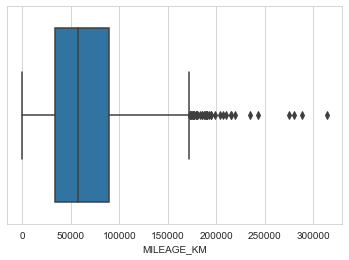

In [69]:
sns.boxplot(df_clean['MILEAGE_KM'])

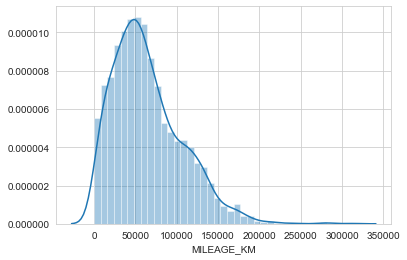

In [68]:
sns.distplot(df_clean['MILEAGE_KM'])

In [33]:
# dropping the rows with these indexes, because .drop works on index
df_clean.drop(df_clean.loc[df_clean['TRANSMISSION'] == 'Manual'].index)  

# Left with 2547 rows in dataset

BRAND     PRICE  DEPRE_VALUE_PER_YEAR     REG_DATE  MILEAGE_KM  \
3              Audi   70800.0               16580.0  05-Dec-2011    140800.0   
4            Toyota   65800.0                6850.0  26-Jun-2009    117000.0   
5     Mercedes-Benz   45000.0               18550.0  21-Sep-2010    126000.0   
7               BMW   70800.0               12680.0  23-Apr-2014     41000.0   
9              Audi   89500.0               11910.0  25-Nov-2015     57784.0   
...             ...       ...                   ...          ...         ...   
3981  Mercedes-Benz  103800.0               13470.0  18-Jul-2016     19000.0   
3982         Toyota  104500.0               16550.0  02-Jun-2014     47638.0   
3983  Mercedes-Benz  115000.0               15260.0  11-Mar-2015     51500.0   
3984           MINI  119800.0               13150.0  07-Jun-2017     16000.0   
3985         Nissan   81800.0                9900.0  05-Aug-2016     53339.0   

     MANUFACTURED_YEAR  ROAD_TAX_PER_YEAR TRANSMISSION  \
3                 2011             2380.0         Auto   
4                 2009              974.0         Auto   
5                 2010              974.0         Auto   
7                 2013              742.0         Auto   
9                 2015              624.0         Auto   
...                ...                ...          ...   
3981              2016              740.0         Auto   
3982              2014             3100.0         Auto   
3983              2012              974.0         Auto   
3984              2017             1210.0         Auto   
3985              2015             1786.0         Auto   

      DEREG_VALUE_FROM_SCRAPE_DATE      OMV      ARF  COE_FROM_SCRAPE_DATE  \
3                          58899.0  71379.0  71379.0               75889.0   
4                          38024.0  23465.0  23465.0               39563.0   
5                          31818.0  56154.0  56154.0               41006.0   
7                          54685.0  32459.0  27443.0               78810.0   
9                          62640.0  29913.0  33879.0               61103.0   
...                            ...      ...      ...                   ...   
3981                       55704.0  27886.0  26041.0               53694.0   
3982                       78422.0  45977.0  56368.0               84504.0   
3983                       85824.0  52051.0  65692.0               67901.0   
3984                       69888.0  33570.0  38998.0               53300.0   
3985                       60983.0  26629.0  29281.0               57501.0   

      DAYS_OF_COE_LEFT  ENGINE_CAPACITY_CC  CURB_WEIGHT_KG  NO_OF_OWNERS  \
3                761.0                2995          2250.0           3.0   
4               3503.0                1797          1350.0           2.0   
5                  8.0                1796          1650.0           4.0   
7               1610.0                1598          1405.0           2.0   
9               2221.0                1395          1480.0           2.0   
...                ...                 ...             ...           ...   
3981            2434.0                1595          1430.0           1.0   
3982            1679.0                3456          2030.0           2.0   
3983            1950.0                1796          1600.0           2.0   
3984            2769.0                1998          1390.0           1.0   
3985            2462.0                2488          1510.0           1.0   

      VEHICLE_TYPE  
3              SUV  
4              MPV  
5     Luxury Sedan  
7     Luxury Sedan  
9              SUV  
...            ...  
3981  Luxury Sedan  
3982           MPV  
3983    Sports Car  
3984    Sports Car  
3985  Luxury Sedan  

[2547 rows x 17 columns]

In [ ]:
# df_clean['ENGINE_CAPACITY_CC'] -> Can try categorizing it

In [60]:
df_clean['ARF'].describe()

count      2584.000000
mean      37006.611068
std       46182.599180
min        1316.000000
25%       14719.250000
50%       23706.500000
75%       40801.750000
max      536003.000000
Name: ARF, dtype: float64

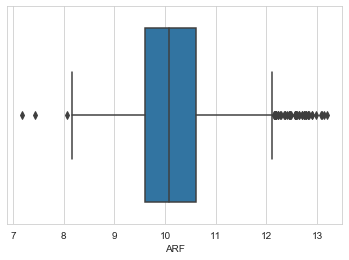

In [65]:
sns.boxplot(np.log(df_clean['ARF']))

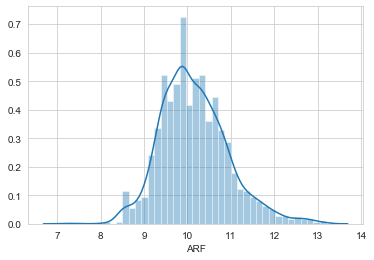

In [64]:
sns.distplot(np.log(df_clean['ARF']))

In [ ]:
sns.distplot(np.l)

In [49]:
df_clean.describe()

PRICE  DEPRE_VALUE_PER_YEAR     MILEAGE_KM  ROAD_TAX_PER_YEAR  \
count    2584.000000           2584.000000    2584.000000        2584.000000   
mean    92442.819272          12770.305728   64502.158282        1155.412926   
std     77491.457150          10462.140400   42034.963816         889.314902   
min      9800.000000           3950.000000       6.000000          50.000000   
25%     57300.000000           8360.000000   33634.000000         684.000000   
50%     72800.000000          10435.000000   57000.000000         742.000000   
75%    104800.000000          13972.500000   89000.000000        1210.000000   
max    938000.000000         131070.000000  313778.000000       11550.000000   

       DEREG_VALUE_FROM_SCRAPE_DATE            OMV            ARF  \
count                   2584.000000    2584.000000    2584.000000   
mean                   53730.590170   34751.988777   37006.611068   
std                    35010.161277   36169.097440   46182.599180   
min                     6653.000000    6510.000000    1316.000000   
25%                    38170.500000   18693.500000   14719.250000   
50%                    47876.000000   25647.000000   23706.500000   
75%                    60993.500000   36995.500000   40801.750000   
max                   423396.000000  487275.000000  536003.000000   

       COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT  ENGINE_CAPACITY_CC  \
count           2584.000000       2584.000000         2584.000000   
mean           49992.115325       2196.682276         1881.769350   
std            16215.045599        815.311996          670.018065   
min             8501.000000          0.000000          658.000000   
25%            40000.000000       1701.750000         1497.000000   
50%            50951.000000       2317.000000         1598.000000   
75%            58192.750000       2767.000000         1998.000000   
max            97889.000000       3563.000000         6749.000000   

       CURB_WEIGHT_KG  NO_OF_OWNERS  
count     2584.000000   2584.000000  
mean      1446.806502      1.570820  
std        252.064686      0.962527  
min        810.000000      1.000000  
25%       1275.000000      1.000000  
50%       1425.000000      1.000000  
75%       1610.000000      2.000000  
max       2730.000000      6.000000

In [ ]:
# df.corr() -> just use this to remove PREDICTOR VARIABLES that are highly correlated
# when do we do lasso/elastic net? (figure it out)

# plot a row in the pairplot () -> separate a df for this pairplot consideration

# Get the correlations with 'price' sorted in descending order
# cars.corr()['price'].sort_values(ascending=False)


# so only take out the target y to predictor variable

In [ ]:
# Interesting insights from data:
# Mercedes-BENZ actually second highest sold car. Highest resale? More things we can look into for this

In [56]:
# Future Ideas:
# Plot GDP against Trends of bought Mercedes